In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Questionnaire Result as DataFrame
df = pd.read_csv("Climatarian_Impact_to_Climate_Change_Form2020-12-0.csv")

# Read Column Name Replacemenet as DataFrame
dfcol = pd.read_excel("Questionnaire Column Change.xlsx")

In [3]:
# Check the first 5 (or last 5 in terms of submission time) in the DataFrame 
df.drop('Email', axis=1, inplace=True)
df.head()

,Submission Date,Jenis Kelamin / Sex,Umur / Age,Domisili / Domicile,Anda mengidentifikasikan diri anda sebagai / You identify yourself as:,Telur Ayam / Chicken egg >> Berapa kali / how many,Telur Ayam / Chicken egg >> Periode,Telur Bebek / Duck egg >> Berapa kali / how many,Telur Bebek / Duck egg >> Periode,Telur Puyuh / Quail egg >> Berapa kali / how many,...,Susu Hewani / Animal based milk >> Berapa kali / How many,Susu Hewani / Animal based milk >> Periode,Susu Nabati / Plant based milk >> Berapa kali / How many,Susu Nabati / Plant based milk >> Periode,Keju / Cheese >> Berapa kali / How many,Keju / Cheese >> Periode,Youghurt >> Berapa kali / How many,Youghurt >> Periode,"Apabila menu makanan yang Anda suka / sering makan tidak ada di atas, bisa tolong sebutkan nama menu dan frekuensinya? / If there is no menu that you like / frequently eat in above list, can you mention them and their frequency here?",Apakah anda tahu bahwa menjadi vegetarian dapat berkontribusi untuk penurunan dampak perubahan iklim? / Did you know that being vegetarian can contribute to reducing the impact of climate change?
0,2020/12/09 05:59:34,Perempuan / Female,22.0,Bali,Normal,5x,Per Minggu / Per week,0x,Per Tahun / Per year,2x,...,8x,Per Bulan / Per month,6x,Per Tahun / Per year,1x,Per Bulan / Per month,1x,Per Bulan / Per month,Olahan tahu dan tempe (5 × perminggu). Rebusan...,Ya / Yes
1,2020/12/09 01:12:28,Perempuan / Female,46.0,Bali,Vegan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1x,Per Hari / Per day,NaN,NaN,NaN,NaN,NaN,Ya / Yes
2,2020/12/09 00:17:35,Perempuan / Female,36.0,Bali,Vegan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2x,Per Hari / Per day,NaN,NaN,NaN,NaN,NaN,Ya / Yes
3,2020/12/09 00:16:27,Perempuan / Female,37.0,Bali,Vegan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2x,Per Hari / Per day,NaN,NaN,NaN,NaN,NaN,Ya / Yes
4,2020/12/09 00:15:25,Laki-laki / Male,60.0,Bali,Pescatarian,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5x,Per Minggu / Per week,9x,Per Minggu / Per week,NaN,NaN,NaN,Ya / Yes


In [4]:
# Check the column name - realized it's too complicated and too long -> we need to replace

df.columns

Index(['Submission Date', 'Jenis Kelamin / Sex', 'Umur / Age',
       'Domisili / Domicile',
       'Anda mengidentifikasikan diri anda sebagai / You identify yourself as:',
       'Telur Ayam / Chicken egg >> Berapa kali / how many',
       'Telur Ayam / Chicken egg >> Periode',
       'Telur Bebek / Duck egg >> Berapa kali / how many',
       'Telur Bebek / Duck egg >> Periode',
       'Telur Puyuh / Quail egg >> Berapa kali / how many',
       ...
       'Susu Hewani / Animal based milk >> Berapa kali / How many',
       'Susu Hewani / Animal based milk >> Periode',
       'Susu Nabati / Plant based milk >> Berapa kali / How many',
       'Susu Nabati / Plant based milk >> Periode',
       'Keju / Cheese >> Berapa kali / How many', 'Keju / Cheese >> Periode',
       'Youghurt  >> Berapa kali / How many', 'Youghurt  >> Periode',
       'Apabila menu makanan yang Anda suka / sering makan tidak ada di atas, bisa tolong sebutkan nama menu dan frekuensinya? / If there is no menu that you

In [5]:
# This is the replacement for the main DataFrame colum names

dfcol.drop('EMAIL', axis=1, inplace=True)
dfcol.columns

Index(['DATE', 'SEX', 'AGE', 'DOMICILE', 'SELF-IDENTIFY', 'TelurAyam_Freq',
       'TelurAyam_Period', 'TelurBebek_Freq', 'TelurBebek_Period',
       'TelurPuyuh_Freq',
       ...
       'SusuHewani_Freq', 'SusuHewani_Period', 'SusuNabati_Freq',
       'SusuNabati_Period', 'Keju_Freq', 'Keju_Period', 'Yoghurt_Freq',
       'Yoghurt_Period', 'MenuLain', 'ClimateChangeImpact?'],
      dtype='object', length=113)

In [6]:
# Replace the initial column names with simpler column names

df.columns = list(dfcol.columns)

In [7]:
# Recheck the head of the DataFrame 

df.head()

,DATE,SEX,AGE,DOMICILE,SELF-IDENTIFY,TelurAyam_Freq,TelurAyam_Period,TelurBebek_Freq,TelurBebek_Period,TelurPuyuh_Freq,...,SusuHewani_Freq,SusuHewani_Period,SusuNabati_Freq,SusuNabati_Period,Keju_Freq,Keju_Period,Yoghurt_Freq,Yoghurt_Period,MenuLain,ClimateChangeImpact?
0,2020/12/09 05:59:34,Perempuan / Female,22.0,Bali,Normal,5x,Per Minggu / Per week,0x,Per Tahun / Per year,2x,...,8x,Per Bulan / Per month,6x,Per Tahun / Per year,1x,Per Bulan / Per month,1x,Per Bulan / Per month,Olahan tahu dan tempe (5 × perminggu). Rebusan...,Ya / Yes
1,2020/12/09 01:12:28,Perempuan / Female,46.0,Bali,Vegan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1x,Per Hari / Per day,NaN,NaN,NaN,NaN,NaN,Ya / Yes
2,2020/12/09 00:17:35,Perempuan / Female,36.0,Bali,Vegan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2x,Per Hari / Per day,NaN,NaN,NaN,NaN,NaN,Ya / Yes
3,2020/12/09 00:16:27,Perempuan / Female,37.0,Bali,Vegan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2x,Per Hari / Per day,NaN,NaN,NaN,NaN,NaN,Ya / Yes
4,2020/12/09 00:15:25,Laki-laki / Male,60.0,Bali,Pescatarian,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5x,Per Minggu / Per week,9x,Per Minggu / Per week,NaN,NaN,NaN,Ya / Yes


In [8]:
# Check the last 10 entries of the DataFrame

df.tail(10)

,DATE,SEX,AGE,DOMICILE,SELF-IDENTIFY,TelurAyam_Freq,TelurAyam_Period,TelurBebek_Freq,TelurBebek_Period,TelurPuyuh_Freq,...,SusuHewani_Freq,SusuHewani_Period,SusuNabati_Freq,SusuNabati_Period,Keju_Freq,Keju_Period,Yoghurt_Freq,Yoghurt_Period,MenuLain,ClimateChangeImpact?
166,2020/12/02 08:10:18,Laki-laki / Male,26.0,DKI Jakarta,Normal,2x,Per Minggu / Per week,0x,Per Hari / Per day,0x,...,1x,Per Hari / Per day,0x,Per Hari / Per day,1x,Per Hari / Per day,0x,Per Hari / Per day,NaN,NaN
167,2020/12/02 06:37:05,Perempuan / Female,28.0,Bali,Normal,7x,Per Minggu / Per week,1x,Per Minggu / Per week,1x,...,1x,Per Hari / Per day,5x,Per Minggu / Per week,5x,Per Minggu / Per week,5x,Per Minggu / Per week,NaN,Ya / Yes
168,2020/12/02 04:06:39,Laki-laki / Male,26.0,DKI Jakarta,Normal,1x,Per Hari / Per day,0x,Per Hari / Per day,0x,...,2x,Per Minggu / Per week,0x,Per Hari / Per day,2x,Per Minggu / Per week,1x,Per Minggu / Per week,NaN,Tidak Peduli / I don't care
169,2020/12/02 01:21:47,Laki-laki / Male,26.0,DKI Jakarta,Normal,2x,Per Hari / Per day,4x,Per Tahun / Per year,4x,...,2x,Per Bulan / Per month,0x,NaN,2x,Per Tahun / Per year,2x,Per Tahun / Per year,NaN,NaN
170,2020/12/01 23:10:18,Laki-laki / Male,26.0,DKI Jakarta,Normal,3x,Per Minggu / Per week,0x,NaN,0x,...,1x,Per Hari / Per day,1x,Per Bulan / Per month,1x,Per Minggu / Per week,1x,Per Minggu / Per week,NaN,NaN
171,2020/12/01 22:17:57,Laki-laki / Male,27.0,DKI Jakarta,Normal,1x,Per Hari / Per day,2x,Per Hari / Per day,0x,...,1x,Per Hari / Per day,1x,Per Hari / Per day,1x,NaN,1x,NaN,NaN,NaN
172,2020/12/01 21:56:35,NaN,28.0,Bali,Normal,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,2020/12/01 21:22:30,Laki-laki,27.0,DKI Jakarta,Normal,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,2020/12/01 20:46:25,NaN,27.0,NaN,NaN,0x,1x,0x,1x,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,2020/12/01 20:24:37,NaN,28.0,NaN,NaN,0x,1x,NaN,NaN,0x,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Make a variable to store which rows we want to delete

last10 = list(df.index)[-10:]
last10

[166, 167, 168, 169, 170, 171, 172, 173, 174, 175]

In [10]:
# Drop the last 10 rows

df.drop(df.index[last10], inplace=True)

In [11]:
# Recheck the last 10 entries of the DataFrame

df.tail(10)

,DATE,SEX,AGE,DOMICILE,SELF-IDENTIFY,TelurAyam_Freq,TelurAyam_Period,TelurBebek_Freq,TelurBebek_Period,TelurPuyuh_Freq,...,SusuHewani_Freq,SusuHewani_Period,SusuNabati_Freq,SusuNabati_Period,Keju_Freq,Keju_Period,Yoghurt_Freq,Yoghurt_Period,MenuLain,ClimateChangeImpact?
156,2020/12/02 23:00:16,Perempuan / Female,20.0,Lainnya / Others,Normal,1x,Per Hari / Per day,0x,Per Tahun / Per year,0x,...,1x,Per Hari / Per day,0x,Per Hari / Per day,1x,Per Tahun / Per year,5x,Per Tahun / Per year,"saya suka makan manisan seperti kue, permen da...",Ya / Yes
157,2020/12/02 22:59:01,Perempuan / Female,26.0,Lainnya / Others,Flexitarian,1x,Per Minggu / Per week,0x,Per Tahun / Per year,0x,...,1x,Per Bulan / Per month,1x,Per Bulan / Per month,1x,Per Bulan / Per month,2x,Per Minggu / Per week,NaN,Ya / Yes
158,2020/12/02 22:51:26,Laki-laki / Male,37.0,Lainnya / Others,Normal,1x,Per Minggu / Per week,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tidak / No
159,2020/12/02 22:42:24,NaN,36.0,Lainnya / Others,Normal,1x,Per Minggu / Per week,NaN,NaN,NaN,...,3x,Per Minggu / Per week,NaN,NaN,NaN,NaN,NaN,NaN,Tidak ada,Ya / Yes
160,2020/12/02 22:28:05,Perempuan / Female,26.0,DKI Jakarta,Meat Eater,3x,Per Minggu / Per week,1x,Per Bulan / Per month,6x,...,6x,Per Bulan / Per month,3x,Per Tahun / Per year,3x,Per Bulan / Per month,2x,Per Bulan / Per month,NaN,Ya / Yes
161,2020/12/02 22:14:16,Laki-laki / Male,37.0,Lainnya / Others,Normal,4x,Per Minggu / Per week,1x,Per Bulan / Per month,0x,...,Lebih dari itu / More than,Per Tahun / Per year,NaN,NaN,NaN,NaN,NaN,NaN,Indomie (Kari dan Goreng),Tidak / No
162,2020/12/02 22:11:38,Laki-laki / Male,39.0,Bali,Normal,3x,Per Minggu / Per week,1x,Per Tahun / Per year,3x,...,1x,Per Hari / Per day,0x,Per Tahun / Per year,0x,Per Tahun / Per year,0x,Per Tahun / Per year,Indomie rebus + telor + nasi (3 kali seminggu),Tidak Peduli / I don't care
163,2020/12/02 22:04:23,Laki-laki / Male,25.0,Bali,Normal,2x,Per Minggu / Per week,1x,Per Bulan / Per month,0x,...,1x,NaN,0x,NaN,0x,NaN,0x,NaN,NaN,Tidak Peduli / I don't care
164,2020/12/02 21:54:23,NaN,26.0,Lainnya / Others,Normal,3x,Per Minggu / Per week,1x,Per Bulan / Per month,1x,...,2x,Per Minggu / Per week,0x,Per Tahun / Per year,5x,Per Minggu / Per week,5x,Per Bulan / Per month,"Pasta, spaghetti, pizza",Ya / Yes
165,2020/12/02 21:50:25,Laki-laki / Male,29.0,DKI Jakarta,Normal,1x,Per Minggu / Per week,0x,Per Bulan / Per month,0x,...,7x,Per Minggu / Per week,0x,Per Bulan / Per month,1x,Per Minggu / Per week,0x,Per Bulan / Per month,NaN,Tidak / No


# A. DATA CLEANING

## SEX DATA

In [12]:
df['SEX'].unique()

array(['Perempuan / Female', 'Laki-laki / Male', nan], dtype=object)

In [13]:
df[df['SEX'].isna()]

,DATE,SEX,AGE,DOMICILE,SELF-IDENTIFY,TelurAyam_Freq,TelurAyam_Period,TelurBebek_Freq,TelurBebek_Period,TelurPuyuh_Freq,...,SusuHewani_Freq,SusuHewani_Period,SusuNabati_Freq,SusuNabati_Period,Keju_Freq,Keju_Period,Yoghurt_Freq,Yoghurt_Period,MenuLain,ClimateChangeImpact?
11,2020/12/08 12:31:51,NaN,26.0,DKI Jakarta,Flexitarian,4x,Per Minggu / Per week,2x,Per Tahun / Per year,1x,...,2x,Per Bulan / Per month,1x,Per Minggu / Per week,3x,Per Bulan / Per month,3x,Per Bulan / Per month,NaN,Tidak Peduli / I don't care
86,2020/12/05 07:35:49,NaN,24.0,Lainnya / Others,Meat Eater,5x,Per Minggu / Per week,0x,Per Hari / Per day,0x,...,7x,Per Minggu / Per week,0x,Per Hari / Per day,6x,Per Bulan / Per month,1x,Per Bulan / Per month,NaN,Ya / Yes
99,2020/12/04 06:41:55,NaN,26.0,DKI Jakarta,Meat Eater,6x,Per Minggu / Per week,0x,Per Tahun / Per year,0x,...,1x,Per Bulan / Per month,1x,Per Tahun / Per year,3x,Per Bulan / Per month,0x,Per Tahun / Per year,Bakmi Ayam sebulan 4 x\r\nNasi goreng seminggu 2x,Tidak / No
112,2020/12/03 08:54:00,NaN,27.0,Lainnya / Others,Vegetarian,0x,NaN,0x,NaN,0x,...,1x,Per Minggu / Per week,0x,Per Hari / Per day,1x,Per Minggu / Per week,1x,Per Minggu / Per week,NaN,Ya / Yes
113,2020/12/03 08:32:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,2020/12/03 07:27:49,NaN,25.0,Lainnya / Others,Flexitarian,3x,Per Minggu / Per week,1x,Per Minggu / Per week,1x,...,1x,Per Minggu / Per week,1x,Per Minggu / Per week,1x,Per Bulan / Per month,1x,Per Bulan / Per month,"tahu, tempe",Tidak Peduli / I don't care
127,2020/12/03 05:25:25,NaN,36.0,Lainnya / Others,Normal,1x,Per Minggu / Per week,0x,Per Minggu / Per week,0x,...,1x,Per Minggu / Per week,0x,Per Tahun / Per year,0x,Per Tahun / Per year,1x,Per Bulan / Per month,NaN,Tidak / No
133,2020/12/03 04:19:39,NaN,31.0,DKI Jakarta,Normal,5x,Per Minggu / Per week,1x,Per Bulan / Per month,3x,...,0x,Per Hari / Per day,2x,Per Bulan / Per month,3x,Per Bulan / Per month,0x,Per Minggu / Per week,Plant based meat,Ya / Yes
139,2020/12/03 02:41:23,NaN,20.0,Bali,Normal,2x,Per Hari / Per day,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2x,Per Hari / Per day,NaN,Tidak / No
146,2020/12/03 00:53:43,NaN,20.0,Bali,Flexitarian,1x,Per Hari / Per day,0x,NaN,0x,...,3x,Per Minggu / Per week,0x,Per Minggu / Per week,1x,Per Minggu / Per week,2x,Per Minggu / Per week,NaN,Ya / Yes


In [14]:
# Delete the row with NaN values in all columns

df.drop(df.index[113], inplace=True)

In [15]:
female_idx = [11, 117, 146]
male_idx = [86, 99, 112, 127, 133, 139, 159, 164]

In [16]:
df.at[female_idx,'SEX'] = 'Perempuan / Female'
df.at[male_idx, 'SEX'] = 'Laki-laki / Male'

In [17]:
df[df['SEX'].isna()]

,DATE,SEX,AGE,DOMICILE,SELF-IDENTIFY,TelurAyam_Freq,TelurAyam_Period,TelurBebek_Freq,TelurBebek_Period,TelurPuyuh_Freq,...,SusuHewani_Freq,SusuHewani_Period,SusuNabati_Freq,SusuNabati_Period,Keju_Freq,Keju_Period,Yoghurt_Freq,Yoghurt_Period,MenuLain,ClimateChangeImpact?


In [18]:
df['SEX'].unique()

array(['Perempuan / Female', 'Laki-laki / Male'], dtype=object)

In [19]:
female = (df['SEX'] == 'Perempuan / Female')
male = (df['SEX'] == 'Laki-laki / Male')

In [20]:
print("Female Data :")
print(sum(female), round(sum(female)*100/df.shape[0],2), "%")
print("Male Data :")
print(sum(male), round(sum(male)*100/df.shape[0],2), "%")

Female Data :
102 61.82 %
Male Data :
63 38.18 %


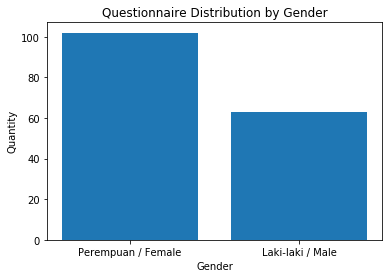

In [21]:
plt.bar(df['SEX'].unique(), [sum(female), sum(male)])
plt.title('Questionnaire Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Quantity')
plt.show()

## AGE DATA

In [22]:
sum(df['AGE'].isna())

0

In [23]:
df['AGE'].describe()

count    165.000000
mean      26.684848
std        6.747905
min       17.000000
25%       22.000000
50%       26.000000
75%       29.000000
max       60.000000
Name: AGE, dtype: float64

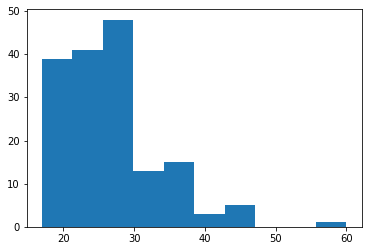

In [24]:
plt.hist(df['AGE'])
plt.show()

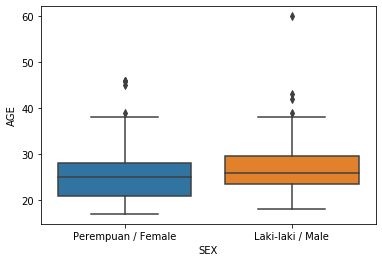

In [25]:
sns.boxplot(y='AGE', x='SEX', data=df)

## SELF IDENTIFICATION DATA

In [26]:
sum(df['SELF-IDENTIFY'].isna())

0

In [27]:
df['SELF-IDENTIFY'].unique()

array(['Normal', 'Vegan', 'Pescatarian', 'Lacto-ovo', 'Flexitarian',
       'Vegetarian', 'Meat Eater'], dtype=object)

In [28]:
normal = (df['SELF-IDENTIFY'] == 'Normal')
vegan = (df['SELF-IDENTIFY'] == 'Vegan')
pescatarian = (df['SELF-IDENTIFY'] == 'Pescatarian')
lactoovo = (df['SELF-IDENTIFY'] == 'Lacto-ovo')
flexitarian = (df['SELF-IDENTIFY'] == 'Flexitarian')
vegetarian = (df['SELF-IDENTIFY'] == 'Vegetarian')
meateater = (df['SELF-IDENTIFY'] == 'Meat Eater')

In [29]:
print("Normal Data :")
print(sum(normal), round(sum(normal)*100/df.shape[0],2), "%")

print("Vegan Data :")
print(sum(vegan), round(sum(vegan)*100/df.shape[0],2), "%")

print("Pescatarian Data :")
print(sum(pescatarian), round(sum(pescatarian)*100/df.shape[0],2), "%")

print("Lacto-Ovo Data :")
print(sum(lactoovo), round(sum(lactoovo)*100/df.shape[0],2), "%")

print("Flexitarian Data :")
print(sum(flexitarian), round(sum(flexitarian)*100/df.shape[0],2), "%")

print("Vegetarian Data :")
print(sum(vegetarian), round(sum(vegetarian)*100/df.shape[0],2), "%")

print("Meat Eater Data :")
print(sum(meateater), round(sum(meateater)*100/df.shape[0],2), "%")

Normal Data :
91 55.15 %
Vegan Data :
7 4.24 %
Pescatarian Data :
2 1.21 %
Lacto-Ovo Data :
1 0.61 %
Flexitarian Data :
33 20.0 %
Vegetarian Data :
8 4.85 %
Meat Eater Data :
23 13.94 %


In [30]:
selfidentification = ['Normal', 'Vegan', 'Pescatarian', 'Lacto-ovo', 'Flexitarian', 'Vegetarian', 'Meat Eater']
selfidentificationcount = [sum(normal), sum(vegan), sum(pescatarian), sum(lactoovo), sum(flexitarian), sum(vegetarian), sum(meateater)]

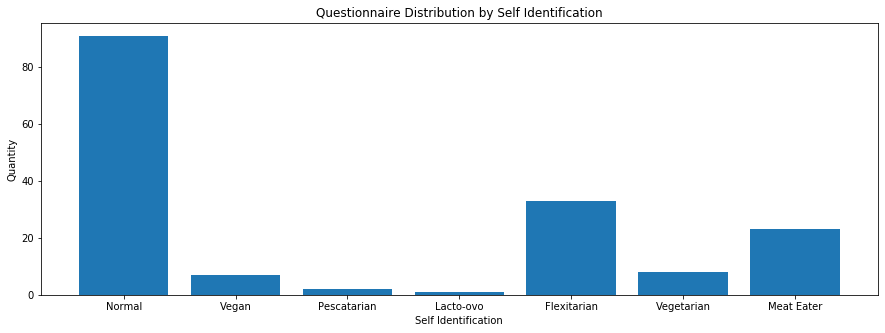

In [31]:
plt.figure(figsize=(15,5))
plt.bar(selfidentification, selfidentificationcount)
plt.title('Questionnaire Distribution by Self Identification')
plt.xlabel('Self Identification')
plt.ylabel('Quantity')
plt.show()

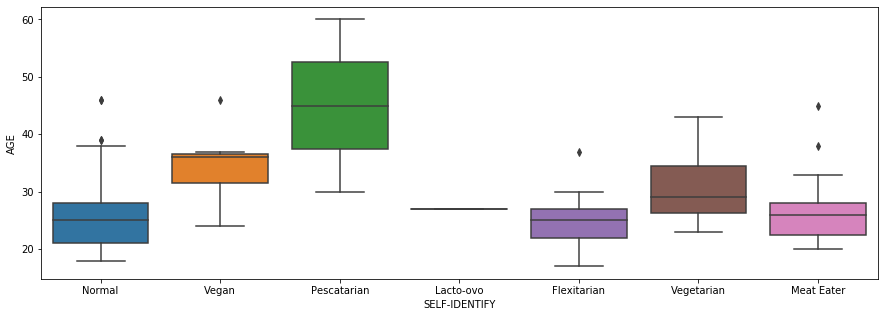

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(y='AGE', x='SELF-IDENTIFY', data=df)

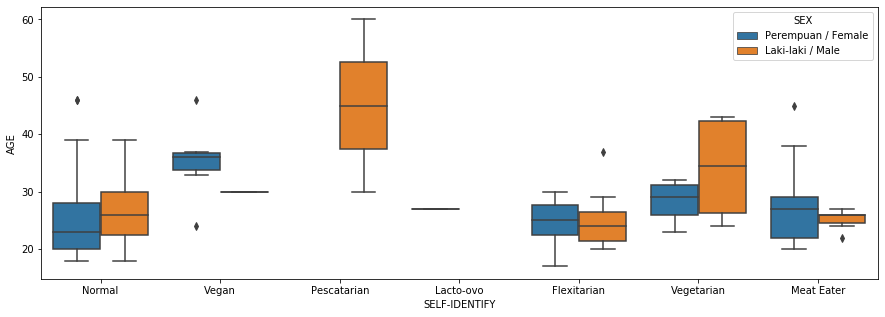

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot(y='AGE', x='SELF-IDENTIFY', hue='SEX', data=df)

## RECATEGORIZE to 2 CATEGORY
### Will be mentioned as Category-Alpha

In [34]:
def category_alpha(row):
    if (row['SELF-IDENTIFY'] == 'Vegan') or (row['SELF-IDENTIFY'] == 'Vegetarian'):
        cat = 'Vegetarian'
    else:
        cat = 'Non-Vegetarian'
    return cat

In [35]:
df['CategoryAlpha'] = df.apply(lambda row: category_alpha(row), axis=1)

In [36]:
nonvege = (df['CategoryAlpha'] == 'Non-Vegetarian')
vegetarian = (df['CategoryAlpha'] == 'Vegetarian')

In [37]:
print("Non-Vegetarian Data :")
print(sum(nonvege), round(sum(nonvege)*100/df.shape[0],2), "%")

print("Vegetarian Data :")
print(sum(vegetarian), round(sum(vegetarian)*100/df.shape[0],2), "%")

Non-Vegetarian Data :
150 90.91 %
Vegetarian Data :
15 9.09 %


In [38]:
categoryalpha = ['Non-Vegetarian', 'Vegetarian']
categoryalphacount = [sum(nonvege), sum(vegetarian)]

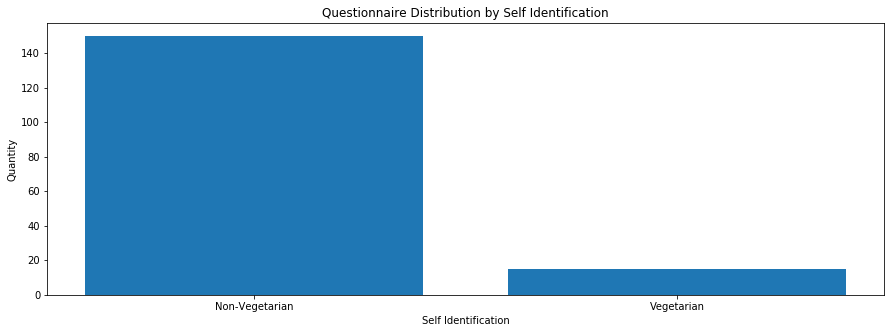

In [39]:
plt.figure(figsize=(15,5))
plt.bar(categoryalpha, categoryalphacount)
plt.title('Questionnaire Distribution by Self Identification')
plt.xlabel('Self Identification')
plt.ylabel('Quantity')
plt.show()

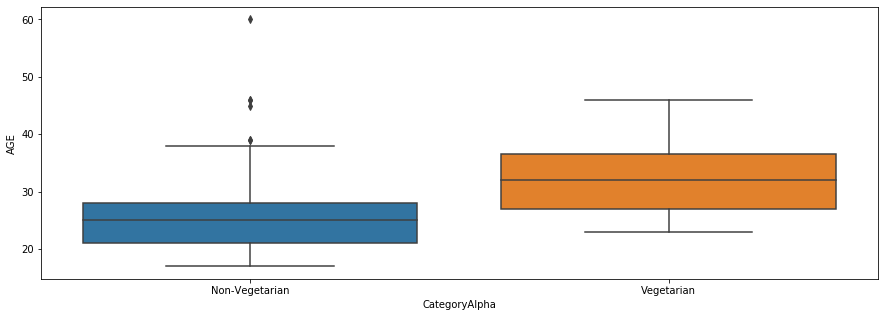

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(y='AGE', x='CategoryAlpha', data=df)

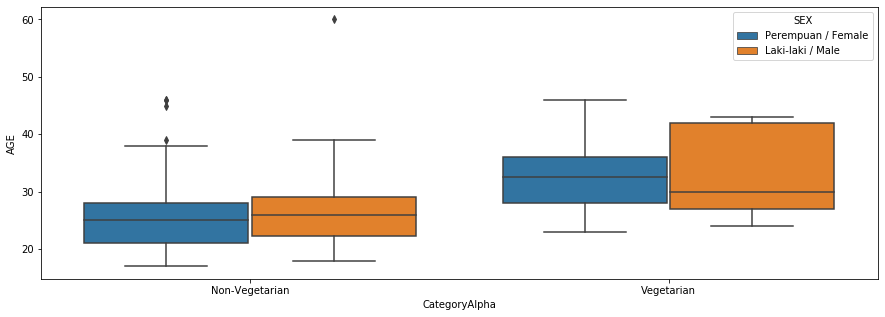

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(y='AGE', x='CategoryAlpha', hue='SEX', data=df)

## RECATEGORIZE to 3 CATEGORY
### Will be mentioned as Category-Beta

In [42]:
def category_beta(row):
    if (row['SELF-IDENTIFY'] == 'Vegan') or (row['SELF-IDENTIFY'] == 'Vegetarian'):
        cat = 'Vegetarian'
    elif (row['SELF-IDENTIFY'] == 'Flexitarian') or (row['SELF-IDENTIFY'] == 'Lacto-ovo'):
        cat = 'Flexitarian / Lacto-ovo'
    else:
        cat = 'Non-Vegetarian'
    return cat

In [43]:
df['CategoryBeta'] = df.apply(lambda row: category_beta(row), axis=1)

In [44]:
nonvege = (df['CategoryBeta'] == 'Non-Vegetarian')
flexi = (df['CategoryBeta'] == 'Flexitarian / Lacto-ovo')
vegetarian = (df['CategoryBeta'] == 'Vegetarian')


print("Non-Vegetarian Data :")
print(sum(nonvege), round(sum(nonvege)*100/df.shape[0],2), "%")

print("Flexitarian / Lacto-ovo Data :")
print(sum(flexi), round(sum(flexi)*100/df.shape[0],2), "%")

print("Vegetarian Data :")
print(sum(vegetarian), round(sum(vegetarian)*100/df.shape[0],2), "%")

Non-Vegetarian Data :
116 70.3 %
Flexitarian / Lacto-ovo Data :
34 20.61 %
Vegetarian Data :
15 9.09 %


In [45]:
categorybeta = ['Non-Vegetarian', 'Flexitarian / Lacto-ovo', 'Vegetarian']
categorybetacount = [sum(nonvege), sum(flexi), sum(vegetarian)]

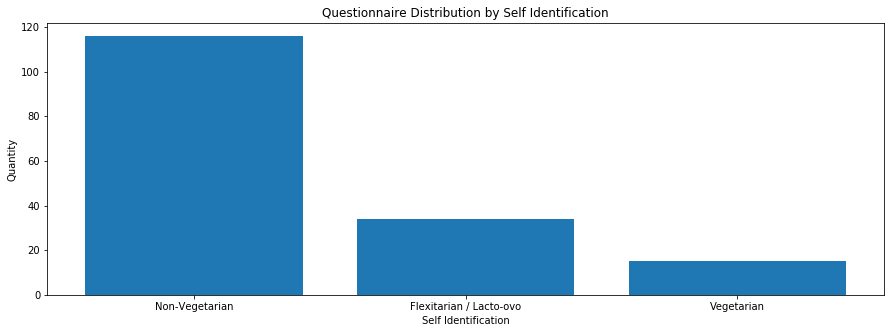

In [46]:
plt.figure(figsize=(15,5))
plt.bar(categorybeta, categorybetacount)
plt.title('Questionnaire Distribution by Self Identification')
plt.xlabel('Self Identification')
plt.ylabel('Quantity')
plt.show()

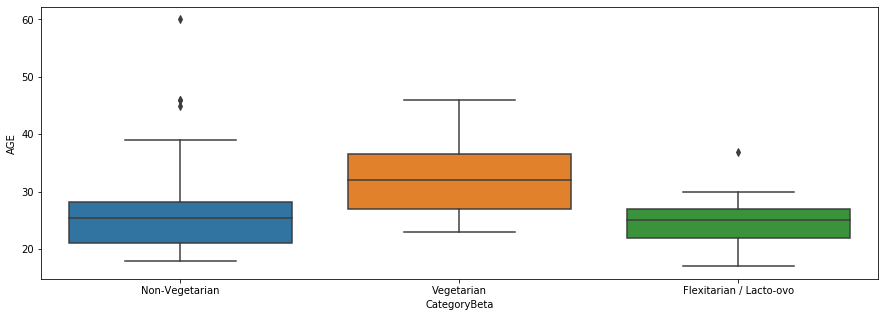

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(y='AGE', x='CategoryBeta', data=df)

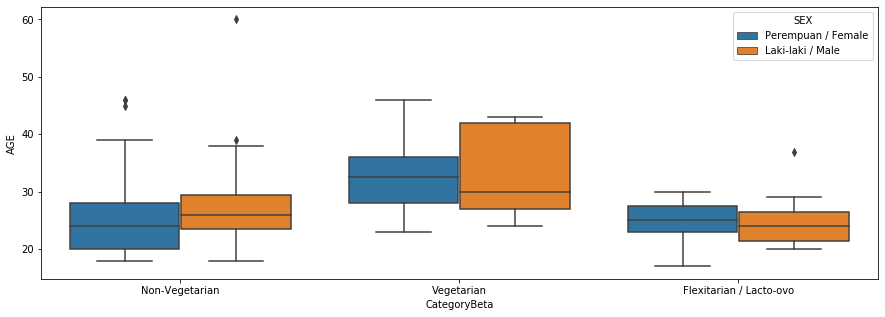

In [48]:
plt.figure(figsize=(15,5))
sns.boxplot(y='AGE', x='CategoryBeta', hue='SEX', data=df)

## FOOD CONSUMPTION DATA

In [49]:
df['TelurAyam_Freq'].unique()

array(['5x', nan, '9x ', '1x', '0x', '4x', '2x', '3x', '6x',
       'Lebih dari itu / More than', '7x'], dtype=object)

In [50]:
df['TelurAyam_Period'].unique()

array(['Per Minggu / Per week', nan, 'Per Tahun / Per year',
       'Per Bulan / Per month', 'Per Hari / Per day'], dtype=object)

In [51]:
original = ['0x', '1x', '2x', '3x', '4x', '5x', '6x', '7x', '8x', '9x', '9x ', 'Lebih dari itu / More than', np.nan]
numeric = [0,1,2,3,4,5,6,7,8,9,9,10,0]

In [52]:
df.replace(to_replace=original, value=numeric, inplace=True)

In [53]:
df

,DATE,SEX,AGE,DOMICILE,SELF-IDENTIFY,TelurAyam_Freq,TelurAyam_Period,TelurBebek_Freq,TelurBebek_Period,TelurPuyuh_Freq,...,SusuNabati_Freq,SusuNabati_Period,Keju_Freq,Keju_Period,Yoghurt_Freq,Yoghurt_Period,MenuLain,ClimateChangeImpact?,CategoryAlpha,CategoryBeta
0,2020/12/09 05:59:34,Perempuan / Female,22.0,Bali,Normal,5,Per Minggu / Per week,0,Per Tahun / Per year,2,...,6,Per Tahun / Per year,1,Per Bulan / Per month,1,Per Bulan / Per month,Olahan tahu dan tempe (5 × perminggu). Rebusan...,Ya / Yes,Non-Vegetarian,Non-Vegetarian
1,2020/12/09 01:12:28,Perempuan / Female,46.0,Bali,Vegan,0,0,0,0,0,...,1,Per Hari / Per day,0,0,0,0,0,Ya / Yes,Vegetarian,Vegetarian
2,2020/12/09 00:17:35,Perempuan / Female,36.0,Bali,Vegan,0,0,0,0,0,...,2,Per Hari / Per day,0,0,0,0,0,Ya / Yes,Vegetarian,Vegetarian
3,2020/12/09 00:16:27,Perempuan / Female,37.0,Bali,Vegan,0,0,0,0,0,...,2,Per Hari / Per day,0,0,0,0,0,Ya / Yes,Vegetarian,Vegetarian
4,2020/12/09 00:15:25,Laki-laki / Male,60.0,Bali,Pescatarian,0,0,0,0,0,...,5,Per Minggu / Per week,9,Per Minggu / Per week,0,0,0,Ya / Yes,Non-Vegetarian,Non-Vegetarian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2020/12/02 22:14:16,Laki-laki / Male,37.0,Lainnya / Others,Normal,4,Per Minggu / Per week,1,Per Bulan / Per month,0,...,0,0,0,0,0,0,Indomie (Kari dan Goreng),Tidak / No,Non-Vegetarian,Non-Vegetarian
162,2020/12/02 22:11:38,Laki-laki / Male,39.0,Bali,Normal,3,Per Minggu / Per week,1,Per Tahun / Per year,3,...,0,Per Tahun / Per year,0,Per Tahun / Per year,0,Per Tahun / Per year,Indomie rebus + telor + nasi (3 kali seminggu),Tidak Peduli / I don't care,Non-Vegetarian,Non-Vegetarian
163,2020/12/02 22:04:23,Laki-laki / Male,25.0,Bali,Normal,2,Per Minggu / Per week,1,Per Bulan / Per month,0,...,0,0,0,0,0,0,0,Tidak Peduli / I don't care,Non-Vegetarian,Non-Vegetarian
164,2020/12/02 21:54:23,Laki-laki / Male,26.0,Lainnya / Others,Normal,3,Per Minggu / Per week,1,Per Bulan / Per month,1,...,0,Per Tahun / Per year,5,Per Minggu / Per week,5,Per Bulan / Per month,"Pasta, spaghetti, pizza",Ya / Yes,Non-Vegetarian,Non-Vegetarian


In [54]:
df[(df['TelurAyam_Period'] == 0) & (df['TelurAyam_Freq'] != 0)]

,DATE,SEX,AGE,DOMICILE,SELF-IDENTIFY,TelurAyam_Freq,TelurAyam_Period,TelurBebek_Freq,TelurBebek_Period,TelurPuyuh_Freq,...,SusuNabati_Freq,SusuNabati_Period,Keju_Freq,Keju_Period,Yoghurt_Freq,Yoghurt_Period,MenuLain,ClimateChangeImpact?,CategoryAlpha,CategoryBeta


In [55]:
df[(df['TelurBebek_Period'] == 0) & (df['TelurBebek_Freq'] != 0)]

,DATE,SEX,AGE,DOMICILE,SELF-IDENTIFY,TelurAyam_Freq,TelurAyam_Period,TelurBebek_Freq,TelurBebek_Period,TelurPuyuh_Freq,...,SusuNabati_Freq,SusuNabati_Period,Keju_Freq,Keju_Period,Yoghurt_Freq,Yoghurt_Period,MenuLain,ClimateChangeImpact?,CategoryAlpha,CategoryBeta
30,2020/12/07 21:16:15,Perempuan / Female,28.0,Lainnya / Others,Meat Eater,0,Per Hari / Per day,1,0,0,...,0,Per Minggu / Per week,0,0,0,Per Minggu / Per week,-,Ya / Yes,Non-Vegetarian,Non-Vegetarian


In [56]:
print("Irregular Time Period Data\n")

print("TelurAyam:", sum((df['TelurAyam_Period'] == 0) & (df['TelurAyam_Freq'] != 0)))
print("TelurBebek:", sum((df['TelurBebek_Period'] == 0) & (df['TelurBebek_Freq'] != 0)))
print("TelurPuyuh:", sum((df['TelurPuyuh_Period'] == 0) & (df['TelurPuyuh_Freq'] != 0)))
print("BuburAyam:", sum((df['BuburAyam_Period'] == 0) & (df['BuburAyam_Freq'] != 0)))
print("SotoAyam:", sum((df['SotoAyam_Period'] == 0) & (df['SotoAyam_Freq'] != 0)))
print("SateAyam:", sum((df['SateAyam_Period'] == 0) & (df['SateAyam_Freq'] != 0)))
print("AyamFast:", sum((df['AyamFast_Period'] == 0) & (df['AyamFast_Freq'] != 0)))
print("PecelAyam:", sum((df['PecelAyam_Period'] == 0) & (df['PecelAyam_Freq'] != 0)))
print("AyamGorengBakar:", sum((df['AyamGorengBakar_Period'] == 0) & (df['AyamGorengBakar_Freq'] != 0)))
print("OporAyam:", sum((df['OporAyam_Period'] == 0) & (df['OporAyam_Freq'] != 0)))
print("Rendang:", sum((df['Rendang_Period'] == 0) & (df['Rendang_Freq'] != 0)))
print("SotoDaging:", sum((df['SotoDaging_Period'] == 0) & (df['SotoDaging_Freq'] != 0)))
print("Dendeng:", sum((df['Dendeng_Period'] == 0) & (df['Dendeng_Freq'] != 0)))
print("Steak:", sum((df['Steak_Period'] == 0) & (df['Steak_Freq'] != 0)))
print("SateDaging:", sum((df['SateDaging_Period'] == 0) & (df['SateDaging_Freq'] != 0)))
print("SeiSapi:", sum((df['SeiSapi_Period'] == 0) & (df['SeiSapi_Freq'] != 0)))
print("SopSapi:", sum((df['SopSapi_Period'] == 0) & (df['SopSapi_Freq'] != 0)))
print("SopBuntut:", sum((df['SopBuntut_Period'] == 0) & (df['SopBuntut_Freq'] != 0)))
print("OsengSapi:", sum((df['OsengSapi_Period'] == 0) & (df['OsengSapi_Freq'] != 0)))
print("BaksoSapi:", sum((df['BaksoSapi_Period'] == 0) & (df['BaksoSapi_Freq'] != 0)))
print("SosisSapi:", sum((df['SosisSapi_Period'] == 0) & (df['SosisSapi_Freq'] != 0)))
print("KornetSapi:", sum((df['KornetSapi_Period'] == 0) & (df['KornetSapi_Freq'] != 0)))
print("Hamburger:", sum((df['Hamburger_Period'] == 0) & (df['Hamburger_Freq'] != 0)))
print("SopKambing:", sum((df['SopKambing_Period'] == 0) & (df['SopKambing_Freq'] != 0)))
print("TongsengKambing:", sum((df['TongsengKambing_Period'] == 0) & (df['TongsengKambing_Freq'] != 0)))
print("SateKambing:", sum((df['SateKambing_Period'] == 0) & (df['SateKambing_Freq'] != 0)))
print("GulaiKambing:", sum((df['GulaiKambing_Period'] == 0) & (df['GulaiKambing_Freq'] != 0)))
print("BabiPanggang:", sum((df['BabiPanggang_Period'] == 0) & (df['BabiPanggang_Freq'] != 0)))
print("BabiKecap:", sum((df['BabiKecap_Period'] == 0) & (df['BabiKecap_Freq'] != 0)))
print("SateBabi:", sum((df['SateBabi_Period'] == 0) & (df['SateBabi_Freq'] != 0)))
print("SeiBabi:", sum((df['SeiBabi_Period'] == 0) & (df['SeiBabi_Freq'] != 0)))
print("SotoBabi:", sum((df['SotoBabi_Period'] == 0) & (df['SotoBabi_Freq'] != 0)))
print("BabiGuling:", sum((df['BabiGuling_Period'] == 0) & (df['BabiGuling_Freq'] != 0)))
print("IgaBabi:", sum((df['IgaBabi_Period'] == 0) & (df['IgaBabi_Freq'] != 0)))
print("Cumi:", sum((df['Cumi_Period'] == 0) & (df['Cumi_Freq'] != 0)))
print("Udang:", sum((df['Udang_Period'] == 0) & (df['Udang_Freq'] != 0)))
print("Kepiting:", sum((df['Kepiting_Period'] == 0) & (df['Kepiting_Freq'] != 0)))
print("Kerang:", sum((df['Kerang_Period'] == 0) & (df['Kerang_Freq'] != 0)))
print("Ikan:", sum((df['Ikan_Period'] == 0) & (df['Ikan_Freq'] != 0)))
print("Gadogado:", sum((df['Gadogado_Period'] == 0) & (df['Gadogado_Freq'] != 0)))
print("SayurAsem:", sum((df['SayurAsem_Period'] == 0) & (df['SayurAsem_Freq'] != 0)))
print("SayurLodeh:", sum((df['SayurLodeh_Period'] == 0) & (df['SayurLodeh_Freq'] != 0)))
print("PecelSayur:", sum((df['PecelSayur_Period'] == 0) & (df['PecelSayur_Freq'] != 0)))
print("CahKangkung:", sum((df['CahKangkung_Period'] == 0) & (df['CahKangkung_Freq'] != 0)))
print("Urap:", sum((df['Urap_Period'] == 0) & (df['Urap_Freq'] != 0)))
print("Salad:", sum((df['Salad_Period'] == 0) & (df['Salad_Freq'] != 0)))
print("GudegNangka:", sum((df['GudegNangka_Period'] == 0) & (df['GudegNangka_Freq'] != 0)))
print("SayurLain:", sum((df['SayurLain_Period'] == 0) & (df['SayurLain_Freq'] != 0)))
print("Buah:", sum((df['Buah_Period'] == 0) & (df['Buah_Freq'] != 0)))
print("SusuHewani:", sum((df['SusuHewani_Period'] == 0) & (df['SusuHewani_Freq'] != 0)))
print("SusuNabati:", sum((df['SusuNabati_Period'] == 0) & (df['SusuNabati_Freq'] != 0)))
print("Keju:", sum((df['Keju_Period'] == 0) & (df['Keju_Freq'] != 0)))
print("Yoghurt:", sum((df['Yoghurt_Period'] == 0) & (df['Yoghurt_Freq'] != 0)))


Irregular Time Period Data

TelurAyam: 0
TelurBebek: 1
TelurPuyuh: 0
BuburAyam: 1
SotoAyam: 0
SateAyam: 0
AyamFast: 0
PecelAyam: 0
AyamGorengBakar: 0
OporAyam: 0
Rendang: 1
SotoDaging: 0
Dendeng: 0
Steak: 0
SateDaging: 0
SeiSapi: 1
SopSapi: 0
SopBuntut: 0
OsengSapi: 0
BaksoSapi: 0
SosisSapi: 0
KornetSapi: 0
Hamburger: 0
SopKambing: 0
TongsengKambing: 0
SateKambing: 0
GulaiKambing: 0
BabiPanggang: 0
BabiKecap: 0
SateBabi: 0
SeiBabi: 0
SotoBabi: 0
BabiGuling: 0
IgaBabi: 0
Cumi: 0
Udang: 0
Kepiting: 0
Kerang: 0
Ikan: 0
Gadogado: 1
SayurAsem: 0
SayurLodeh: 0
PecelSayur: 0
CahKangkung: 0
Urap: 1
Salad: 0
GudegNangka: 0
SayurLain: 1
Buah: 0
SusuHewani: 1
SusuNabati: 1
Keju: 0
Yoghurt: 1


In [57]:
df[(df['TelurBebek_Period'] == 0) & (df['TelurBebek_Freq'] != 0)][['TelurBebek_Freq','TelurBebek_Period']]

,TelurBebek_Freq,TelurBebek_Period
30,1,0


In [58]:
df[(df['BuburAyam_Period'] == 0) & (df['BuburAyam_Freq'] != 0)][['BuburAyam_Freq','BuburAyam_Period']]

,BuburAyam_Freq,BuburAyam_Period
30,3,0


In [59]:
df[(df['Rendang_Period'] == 0) & (df['Rendang_Freq'] != 0)][['Rendang_Freq','Rendang_Period']]

,Rendang_Freq,Rendang_Period
30,4,0


In [60]:
df[(df['SeiSapi_Period'] == 0) & (df['SeiSapi_Freq'] != 0)][['SeiSapi_Freq','SeiSapi_Period']]

,SeiSapi_Freq,SeiSapi_Period
30,3,0


In [61]:
df[(df['Gadogado_Period'] == 0) & (df['Gadogado_Freq'] != 0)][['Gadogado_Freq','Gadogado_Period']]

,Gadogado_Freq,Gadogado_Period
59,1,0


In [62]:
df[(df['Urap_Period'] == 0) & (df['Urap_Freq'] != 0)][['Urap_Freq','Urap_Period']]

,Urap_Freq,Urap_Period
99,2,0


In [63]:
df[(df['SayurLain_Period'] == 0) & (df['SayurLain_Freq'] != 0)][['SayurLain_Freq','SayurLain_Period']]

,SayurLain_Freq,SayurLain_Period
93,3,0


In [64]:
df[(df['SusuHewani_Period'] == 0) & (df['SusuHewani_Freq'] != 0)][['SusuHewani_Freq','SusuHewani_Period']]

,SusuHewani_Freq,SusuHewani_Period
163,1,0


In [65]:
df[(df['SusuNabati_Period'] == 0) & (df['SusuNabati_Freq'] != 0)][['SusuNabati_Freq','SusuNabati_Period']]

,SusuNabati_Freq,SusuNabati_Period
120,2,0


In [66]:
df[(df['Yoghurt_Period'] == 0) & (df['Yoghurt_Freq'] != 0)][['Yoghurt_Freq','Yoghurt_Period']]

,Yoghurt_Freq,Yoghurt_Period
81,2,0


In [67]:
df.at[30,'TelurBebek_Period'] = 'Per Hari / Per day'
df.at[30,'BuburAyam_Period'] = 'Per Hari / Per day'
df.at[30,'Rendang_Period'] = 'Per Hari / Per day'
df.at[30,'SeiSapi_Period'] = 'Per Hari / Per day'
df.at[59,'Gadogado_Period'] = 'Per Hari / Per day'
df.at[99,'Urap_Period'] = 'Per Hari / Per day'
df.at[93,'SayurLain_Period'] = 'Per Hari / Per day'
df.at[163,'SusuHewani_Period'] = 'Per Hari / Per day'
df.at[120,'SusuNabati_Period'] = 'Per Hari / Per day'
df.at[81,'Yoghurt_Period'] = 'Per Hari / Per day'

In [68]:
print("Irregular Time Period Data\n")

print("TelurAyam:", sum((df['TelurAyam_Period'] == 0) & (df['TelurAyam_Freq'] != 0)))
print("TelurBebek:", sum((df['TelurBebek_Period'] == 0) & (df['TelurBebek_Freq'] != 0)))
print("TelurPuyuh:", sum((df['TelurPuyuh_Period'] == 0) & (df['TelurPuyuh_Freq'] != 0)))
print("BuburAyam:", sum((df['BuburAyam_Period'] == 0) & (df['BuburAyam_Freq'] != 0)))
print("SotoAyam:", sum((df['SotoAyam_Period'] == 0) & (df['SotoAyam_Freq'] != 0)))
print("SateAyam:", sum((df['SateAyam_Period'] == 0) & (df['SateAyam_Freq'] != 0)))
print("AyamFast:", sum((df['AyamFast_Period'] == 0) & (df['AyamFast_Freq'] != 0)))
print("PecelAyam:", sum((df['PecelAyam_Period'] == 0) & (df['PecelAyam_Freq'] != 0)))
print("AyamGorengBakar:", sum((df['AyamGorengBakar_Period'] == 0) & (df['AyamGorengBakar_Freq'] != 0)))
print("OporAyam:", sum((df['OporAyam_Period'] == 0) & (df['OporAyam_Freq'] != 0)))
print("Rendang:", sum((df['Rendang_Period'] == 0) & (df['Rendang_Freq'] != 0)))
print("SotoDaging:", sum((df['SotoDaging_Period'] == 0) & (df['SotoDaging_Freq'] != 0)))
print("Dendeng:", sum((df['Dendeng_Period'] == 0) & (df['Dendeng_Freq'] != 0)))
print("Steak:", sum((df['Steak_Period'] == 0) & (df['Steak_Freq'] != 0)))
print("SateDaging:", sum((df['SateDaging_Period'] == 0) & (df['SateDaging_Freq'] != 0)))
print("SeiSapi:", sum((df['SeiSapi_Period'] == 0) & (df['SeiSapi_Freq'] != 0)))
print("SopSapi:", sum((df['SopSapi_Period'] == 0) & (df['SopSapi_Freq'] != 0)))
print("SopBuntut:", sum((df['SopBuntut_Period'] == 0) & (df['SopBuntut_Freq'] != 0)))
print("OsengSapi:", sum((df['OsengSapi_Period'] == 0) & (df['OsengSapi_Freq'] != 0)))
print("BaksoSapi:", sum((df['BaksoSapi_Period'] == 0) & (df['BaksoSapi_Freq'] != 0)))
print("SosisSapi:", sum((df['SosisSapi_Period'] == 0) & (df['SosisSapi_Freq'] != 0)))
print("KornetSapi:", sum((df['KornetSapi_Period'] == 0) & (df['KornetSapi_Freq'] != 0)))
print("Hamburger:", sum((df['Hamburger_Period'] == 0) & (df['Hamburger_Freq'] != 0)))
print("SopKambing:", sum((df['SopKambing_Period'] == 0) & (df['SopKambing_Freq'] != 0)))
print("TongsengKambing:", sum((df['TongsengKambing_Period'] == 0) & (df['TongsengKambing_Freq'] != 0)))
print("SateKambing:", sum((df['SateKambing_Period'] == 0) & (df['SateKambing_Freq'] != 0)))
print("GulaiKambing:", sum((df['GulaiKambing_Period'] == 0) & (df['GulaiKambing_Freq'] != 0)))
print("BabiPanggang:", sum((df['BabiPanggang_Period'] == 0) & (df['BabiPanggang_Freq'] != 0)))
print("BabiKecap:", sum((df['BabiKecap_Period'] == 0) & (df['BabiKecap_Freq'] != 0)))
print("SateBabi:", sum((df['SateBabi_Period'] == 0) & (df['SateBabi_Freq'] != 0)))
print("SeiBabi:", sum((df['SeiBabi_Period'] == 0) & (df['SeiBabi_Freq'] != 0)))
print("SotoBabi:", sum((df['SotoBabi_Period'] == 0) & (df['SotoBabi_Freq'] != 0)))
print("BabiGuling:", sum((df['BabiGuling_Period'] == 0) & (df['BabiGuling_Freq'] != 0)))
print("IgaBabi:", sum((df['IgaBabi_Period'] == 0) & (df['IgaBabi_Freq'] != 0)))
print("Cumi:", sum((df['Cumi_Period'] == 0) & (df['Cumi_Freq'] != 0)))
print("Udang:", sum((df['Udang_Period'] == 0) & (df['Udang_Freq'] != 0)))
print("Kepiting:", sum((df['Kepiting_Period'] == 0) & (df['Kepiting_Freq'] != 0)))
print("Kerang:", sum((df['Kerang_Period'] == 0) & (df['Kerang_Freq'] != 0)))
print("Ikan:", sum((df['Ikan_Period'] == 0) & (df['Ikan_Freq'] != 0)))
print("Gadogado:", sum((df['Gadogado_Period'] == 0) & (df['Gadogado_Freq'] != 0)))
print("SayurAsem:", sum((df['SayurAsem_Period'] == 0) & (df['SayurAsem_Freq'] != 0)))
print("SayurLodeh:", sum((df['SayurLodeh_Period'] == 0) & (df['SayurLodeh_Freq'] != 0)))
print("PecelSayur:", sum((df['PecelSayur_Period'] == 0) & (df['PecelSayur_Freq'] != 0)))
print("CahKangkung:", sum((df['CahKangkung_Period'] == 0) & (df['CahKangkung_Freq'] != 0)))
print("Urap:", sum((df['Urap_Period'] == 0) & (df['Urap_Freq'] != 0)))
print("Salad:", sum((df['Salad_Period'] == 0) & (df['Salad_Freq'] != 0)))
print("GudegNangka:", sum((df['GudegNangka_Period'] == 0) & (df['GudegNangka_Freq'] != 0)))
print("SayurLain:", sum((df['SayurLain_Period'] == 0) & (df['SayurLain_Freq'] != 0)))
print("Buah:", sum((df['Buah_Period'] == 0) & (df['Buah_Freq'] != 0)))
print("SusuHewani:", sum((df['SusuHewani_Period'] == 0) & (df['SusuHewani_Freq'] != 0)))
print("SusuNabati:", sum((df['SusuNabati_Period'] == 0) & (df['SusuNabati_Freq'] != 0)))
print("Keju:", sum((df['Keju_Period'] == 0) & (df['Keju_Freq'] != 0)))
print("Yoghurt:", sum((df['Yoghurt_Period'] == 0) & (df['Yoghurt_Freq'] != 0)))


Irregular Time Period Data

TelurAyam: 0
TelurBebek: 0
TelurPuyuh: 0
BuburAyam: 0
SotoAyam: 0
SateAyam: 0
AyamFast: 0
PecelAyam: 0
AyamGorengBakar: 0
OporAyam: 0
Rendang: 0
SotoDaging: 0
Dendeng: 0
Steak: 0
SateDaging: 0
SeiSapi: 0
SopSapi: 0
SopBuntut: 0
OsengSapi: 0
BaksoSapi: 0
SosisSapi: 0
KornetSapi: 0
Hamburger: 0
SopKambing: 0
TongsengKambing: 0
SateKambing: 0
GulaiKambing: 0
BabiPanggang: 0
BabiKecap: 0
SateBabi: 0
SeiBabi: 0
SotoBabi: 0
BabiGuling: 0
IgaBabi: 0
Cumi: 0
Udang: 0
Kepiting: 0
Kerang: 0
Ikan: 0
Gadogado: 0
SayurAsem: 0
SayurLodeh: 0
PecelSayur: 0
CahKangkung: 0
Urap: 0
Salad: 0
GudegNangka: 0
SayurLain: 0
Buah: 0
SusuHewani: 0
SusuNabati: 0
Keju: 0
Yoghurt: 0


# CONSUMPTION FREQUENCY BEHAVIOR ANALYSIS

In [69]:
def anfq_egg(row):
    telurayam = row['TelurAyam_Freq']
    telurbebek = row['TelurBebek_Freq']
    telurpuyuh = row['TelurPuyuh_Freq']

    prd_telurayam = row['TelurAyam_Period']
    prd_telurbebek = row['TelurBebek_Period']
    prd_telurpuyuh = row['TelurPuyuh_Period']

    if prd_telurayam == 'Per Hari / Per day':
        a = telurayam*365
    elif prd_telurayam == 'Per Minggu / Per week':
        a = telurayam*52
    elif prd_telurayam == 'Per Bulan / Per month':
        a = telurayam*12
    else:
        a = telurayam

    if prd_telurbebek == 'Per Hari / Per day':
        b = telurbebek*365
    elif prd_telurbebek == 'Per Minggu / Per week':
        b = telurbebek*52
    elif prd_telurbebek == 'Per Bulan / Per month':
        b = telurbebek*12
    else:
        b = telurbebek

    if prd_telurpuyuh == 'Per Hari / Per day':
        c = telurpuyuh*365
    elif prd_telurpuyuh == 'Per Minggu / Per week':
        c = telurpuyuh*52
    elif prd_telurpuyuh == 'Per Bulan / Per month':
        c = telurpuyuh*12
    else:
        c = telurpuyuh
    
    return a+b+c

In [70]:
def anfq_chicken(row):
    buburayam = row['BuburAyam_Freq']
    sotoayam = row['SotoAyam_Freq']
    sateayam = row['SateAyam_Freq']
    ayamfast = row['AyamFast_Freq']
    pecelayam = row['PecelAyam_Freq']
    ayamgrgbkr = row['AyamGorengBakar_Freq']
    oporayam = row['OporAyam_Freq']

    prd_buburayam = row['BuburAyam_Period']
    prd_sotoayam = row['SotoAyam_Period']
    prd_sateayam = row['SateAyam_Period']
    prd_ayamfast = row['AyamFast_Period']
    prd_pecelayam = row['PecelAyam_Period']
    prd_ayamgrgbkr = row['AyamGorengBakar_Period']
    prd_oporayam = row['OporAyam_Period']

    if prd_buburayam == 'Per Hari / Per day':
        a = buburayam*365
    elif prd_buburayam == 'Per Minggu / Per week':
        a = buburayam*52
    elif prd_buburayam == 'Per Bulan / Per month':
        a = buburayam*12
    else:
        a = buburayam

    if prd_sotoayam == 'Per Hari / Per day':
        b = sotoayam*365
    elif prd_sotoayam == 'Per Minggu / Per week':
        b = sotoayam*52
    elif prd_sotoayam == 'Per Bulan / Per month':
        b = sotoayam*12
    else:
        b = sotoayam

    if prd_sateayam == 'Per Hari / Per day':
        c = sateayam*365
    elif prd_sateayam == 'Per Minggu / Per week':
        c = sateayam*52
    elif prd_sateayam == 'Per Bulan / Per month':
        c = sateayam*12
    else:
        c = sateayam
    
    if prd_ayamfast == 'Per Hari / Per day':
        d = ayamfast*365
    elif prd_ayamfast == 'Per Minggu / Per week':
        d = ayamfast*52
    elif prd_ayamfast == 'Per Bulan / Per month':
        d = ayamfast*12
    else:
        d = ayamfast

    if prd_pecelayam == 'Per Hari / Per day':
        e = pecelayam*365
    elif prd_pecelayam == 'Per Minggu / Per week':
        e = pecelayam*52
    elif prd_pecelayam == 'Per Bulan / Per month':
        e = pecelayam*12
    else:
        e = pecelayam

    if prd_ayamgrgbkr == 'Per Hari / Per day':
        f = ayamgrgbkr*365
    elif prd_ayamgrgbkr == 'Per Minggu / Per week':
        f = ayamgrgbkr*52
    elif prd_ayamgrgbkr == 'Per Bulan / Per month':
        f = ayamgrgbkr*12
    else:
        f = ayamgrgbkr

    if prd_oporayam == 'Per Hari / Per day':
        g = oporayam*365
    elif prd_oporayam == 'Per Minggu / Per week':
        g = oporayam*52
    elif prd_oporayam == 'Per Bulan / Per month':
        g = oporayam*12
    else:
        g = oporayam
    
    return a+b+c+d+e+f+g

In [71]:
def anfq_beef(row):
    rendang = row['Rendang_Freq']
    sotodaging = row['SotoDaging_Freq']
    dendeng = row['Dendeng_Freq']
    steak = row['Steak_Freq']
    satedaging = row['SateDaging_Freq']
    seisapi = row['SeiSapi_Freq']
    sopsapi = row['SopSapi_Freq']
    sopbuntut = row['SopBuntut_Freq']
    osengsapi = row['OsengSapi_Freq']
    baksosapi = row['BaksoSapi_Freq']
    sosissapi = row['SosisSapi_Freq']
    kornetsapi = row['KornetSapi_Freq']
    hamburger = row['Hamburger_Freq']

    prd_rendang = row['Rendang_Period']
    prd_sotodaging = row['SotoDaging_Period']
    prd_dendeng = row['Dendeng_Period']
    prd_steak = row['Steak_Period']
    prd_satedaging = row['SateDaging_Period']
    prd_seisapi = row['SeiSapi_Period']
    prd_sopsapi = row['SopSapi_Period']
    prd_sopbuntut = row['SopBuntut_Period']
    prd_osengsapi = row['OsengSapi_Period']
    prd_baksosapi = row['BaksoSapi_Period']
    prd_sosissapi = row['SosisSapi_Period']
    prd_kornetsapi = row['KornetSapi_Period']
    prd_hamburger = row['Hamburger_Period']

    if prd_rendang == 'Per Hari / Per day':
        a = rendang*365
    elif prd_rendang == 'Per Minggu / Per week':
        a = rendang*52
    elif prd_rendang == 'Per Bulan / Per month':
        a = rendang*12
    else:
        a = rendang

    if prd_sotodaging == 'Per Hari / Per day':
        b = sotodaging*365
    elif prd_sotodaging == 'Per Minggu / Per week':
        b = sotodaging*52
    elif prd_sotodaging == 'Per Bulan / Per month':
        b = sotodaging*12
    else:
        b = sotodaging

    if prd_dendeng == 'Per Hari / Per day':
        c = dendeng*365
    elif prd_dendeng == 'Per Minggu / Per week':
        c = dendeng*52
    elif prd_dendeng == 'Per Bulan / Per month':
        c = dendeng*12
    else:
        c = dendeng
    
    if prd_steak == 'Per Hari / Per day':
        d = steak*365
    elif prd_steak == 'Per Minggu / Per week':
        d = steak*52
    elif prd_steak == 'Per Bulan / Per month':
        d = steak*12
    else:
        d = steak

    if prd_satedaging == 'Per Hari / Per day':
        e = satedaging*365
    elif prd_satedaging == 'Per Minggu / Per week':
        e = satedaging*52
    elif prd_satedaging == 'Per Bulan / Per month':
        e = satedaging*12
    else:
        e = satedaging

    if prd_seisapi == 'Per Hari / Per day':
        f = seisapi*365
    elif prd_seisapi == 'Per Minggu / Per week':
        f = seisapi*52
    elif prd_seisapi == 'Per Bulan / Per month':
        f = seisapi*12
    else:
        f = seisapi

    if prd_sopsapi == 'Per Hari / Per day':
        g = sopsapi*365
    elif prd_sopsapi == 'Per Minggu / Per week':
        g = sopsapi*52
    elif prd_sopsapi == 'Per Bulan / Per month':
        g = sopsapi*12
    else:
        g = sopsapi
    
    if prd_sopbuntut == 'Per Hari / Per day':
        h = sopbuntut*365
    elif prd_sopbuntut == 'Per Minggu / Per week':
        h = sopbuntut*52
    elif prd_sopbuntut == 'Per Bulan / Per month':
        h = sopbuntut*12
    else:
        h = sopbuntut

    if prd_osengsapi == 'Per Hari / Per day':
        i = osengsapi*365
    elif prd_osengsapi == 'Per Minggu / Per week':
        i = osengsapi*52
    elif prd_osengsapi == 'Per Bulan / Per month':
        i = osengsapi*12
    else:
        i = osengsapi

    if prd_baksosapi == 'Per Hari / Per day':
        j = baksosapi*365
    elif prd_baksosapi == 'Per Minggu / Per week':
        j = baksosapi*52
    elif prd_baksosapi == 'Per Bulan / Per month':
        j = baksosapi*12
    else:
        j = baksosapi

    if prd_sosissapi == 'Per Hari / Per day':
        k = sosissapi*365
    elif prd_sosissapi == 'Per Minggu / Per week':
        k = sosissapi*52
    elif prd_sosissapi == 'Per Bulan / Per month':
        k = sosissapi*12
    else:
        k = sosissapi

    if prd_kornetsapi == 'Per Hari / Per day':
        l = kornetsapi*365
    elif prd_kornetsapi == 'Per Minggu / Per week':
        l = kornetsapi*52
    elif prd_kornetsapi == 'Per Bulan / Per month':
        l = kornetsapi*12
    else:
        l = kornetsapi

    if prd_hamburger == 'Per Hari / Per day':
        m = hamburger*365
    elif prd_hamburger == 'Per Minggu / Per week':
        m = hamburger*52
    elif prd_hamburger == 'Per Bulan / Per month':
        m = hamburger*12
    else:
        m = hamburger


    
    return a+b+c+d+e+f+g+h+i+j+k+l+m

In [72]:
def anfq_lamb(row):
    sopkambing = row['SopKambing_Freq']
    tongsengkambing = row['TongsengKambing_Freq']
    satekambing = row['SateKambing_Freq']
    gulaikambing = row['GulaiKambing_Freq']

    prd_sopkambing = row['SopKambing_Period']
    prd_tongsengkambing = row['TongsengKambing_Period']
    prd_satekambing = row['SateKambing_Period']
    prd_gulaikambing = row['GulaiKambing_Period']

    if prd_sopkambing == 'Per Hari / Per day':
        a = sopkambing*365
    elif prd_sopkambing == 'Per Minggu / Per week':
        a = sopkambing*52
    elif prd_sopkambing == 'Per Bulan / Per month':
        a = sopkambing*12
    else:
        a = sopkambing

    if prd_tongsengkambing == 'Per Hari / Per day':
        b = tongsengkambing*365
    elif prd_tongsengkambing == 'Per Minggu / Per week':
        b = tongsengkambing*52
    elif prd_tongsengkambing == 'Per Bulan / Per month':
        b = tongsengkambing*12
    else:
        b = tongsengkambing

    if prd_satekambing == 'Per Hari / Per day':
        c = satekambing*365
    elif prd_satekambing == 'Per Minggu / Per week':
        c = satekambing*52
    elif prd_satekambing == 'Per Bulan / Per month':
        c = satekambing*12
    else:
        c = satekambing
    
    if prd_gulaikambing == 'Per Hari / Per day':
        d = gulaikambing*365
    elif prd_gulaikambing == 'Per Minggu / Per week':
        d = gulaikambing*52
    elif prd_gulaikambing == 'Per Bulan / Per month':
        d = gulaikambing*12
    else:
        d = gulaikambing
    
    return a+b+c+d

In [73]:
def anfq_pork(row):
    babipanggang = row['BabiPanggang_Freq']
    babikecap = row['BabiKecap_Freq']
    satebabi = row['SateBabi_Freq']
    seibabi = row['SeiBabi_Freq']
    sotobabi = row['SotoBabi_Freq']
    babiguling = row['BabiGuling_Freq']
    igababi = row['IgaBabi_Freq']

    prd_babipanggang = row['BabiPanggang_Period']
    prd_babikecap = row['BabiKecap_Period']
    prd_satebabi = row['SateBabi_Period']
    prd_seibabi = row['SeiBabi_Period']
    prd_sotobabi = row['SotoBabi_Period']
    prd_babiguling = row['BabiGuling_Period']
    prd_igababi = row['IgaBabi_Period']

    if prd_babipanggang == 'Per Hari / Per day':
        a = babipanggang*365
    elif prd_babipanggang == 'Per Minggu / Per week':
        a = babipanggang*52
    elif prd_babipanggang == 'Per Bulan / Per month':
        a = babipanggang*12
    else:
        a = babipanggang

    if prd_babikecap == 'Per Hari / Per day':
        b = babikecap*365
    elif prd_babikecap == 'Per Minggu / Per week':
        b = babikecap*52
    elif prd_babikecap == 'Per Bulan / Per month':
        b = babikecap*12
    else:
        b = babikecap

    if prd_satebabi == 'Per Hari / Per day':
        c = satebabi*365
    elif prd_satebabi == 'Per Minggu / Per week':
        c = satebabi*52
    elif prd_satebabi == 'Per Bulan / Per month':
        c = satebabi*12
    else:
        c = satebabi
    
    if prd_seibabi == 'Per Hari / Per day':
        d = seibabi*365
    elif prd_seibabi == 'Per Minggu / Per week':
        d = seibabi*52
    elif prd_seibabi == 'Per Bulan / Per month':
        d = seibabi*12
    else:
        d = seibabi

    if prd_sotobabi == 'Per Hari / Per day':
        e = sotobabi*365
    elif prd_sotobabi == 'Per Minggu / Per week':
        e = sotobabi*52
    elif prd_sotobabi == 'Per Bulan / Per month':
        e = sotobabi*12
    else:
        e = sotobabi

    if prd_babiguling == 'Per Hari / Per day':
        f = babiguling*365
    elif prd_babiguling == 'Per Minggu / Per week':
        f = babiguling*52
    elif prd_babiguling == 'Per Bulan / Per month':
        f = babiguling*12
    else:
        f = babiguling

    if prd_igababi == 'Per Hari / Per day':
        g = igababi*365
    elif prd_igababi == 'Per Minggu / Per week':
        g = igababi*52
    elif prd_igababi == 'Per Bulan / Per month':
        g = igababi*12
    else:
        g = igababi
    
    return a+b+c+d+e+f+g

In [74]:
def anfq_seafood(row):
    cumi = row['Cumi_Freq']
    udang = row['Udang_Freq']
    kepiting = row['Kepiting_Freq']
    kerang = row['Kerang_Freq']
    ikan = row['Ikan_Freq']

    prd_cumi = row['Cumi_Period']
    prd_udang = row['Udang_Period']
    prd_kepiting = row['Kepiting_Period']
    prd_kerang = row['Kerang_Period']
    prd_ikan = row['Ikan_Period']

    if prd_cumi == 'Per Hari / Per day':
        a = cumi*365
    elif prd_cumi == 'Per Minggu / Per week':
        a = cumi*52
    elif prd_cumi == 'Per Bulan / Per month':
        a = cumi*12
    else:
        a = cumi

    if prd_udang == 'Per Hari / Per day':
        b = udang*365
    elif prd_udang == 'Per Minggu / Per week':
        b = udang*52
    elif prd_udang == 'Per Bulan / Per month':
        b = udang*12
    else:
        b = udang

    if prd_kepiting == 'Per Hari / Per day':
        c = kepiting*365
    elif prd_kepiting == 'Per Minggu / Per week':
        c = kepiting*52
    elif prd_kepiting == 'Per Bulan / Per month':
        c = kepiting*12
    else:
        c = kepiting
    
    if prd_kerang == 'Per Hari / Per day':
        d = kerang*365
    elif prd_kerang == 'Per Minggu / Per week':
        d = kerang*52
    elif prd_kerang == 'Per Bulan / Per month':
        d = kerang*12
    else:
        d = kerang

    if prd_ikan == 'Per Hari / Per day':
        e = ikan*365
    elif prd_ikan == 'Per Minggu / Per week':
        e = ikan*52
    elif prd_ikan == 'Per Bulan / Per month':
        e = ikan*12
    else:
        e = ikan
    
    return a+b+c+d+e

In [75]:
def anfq_animilk(row):
    susuhewani = row['SusuHewani_Freq']
    keju = row['Keju_Freq']

    prd_susuhewani = row['SusuHewani_Period']
    prd_keju = row['Keju_Period']

    if prd_susuhewani == 'Per Hari / Per day':
        a = susuhewani*365
    elif prd_susuhewani == 'Per Minggu / Per week':
        a = susuhewani*52
    elif prd_susuhewani == 'Per Bulan / Per month':
        a = susuhewani*12
    else:
        a = susuhewani

    if prd_keju == 'Per Hari / Per day':
        b = keju*365
    elif prd_keju == 'Per Minggu / Per week':
        b = keju*52
    elif prd_keju == 'Per Bulan / Per month':
        b = keju*12
    else:
        b = keju
    
    return a+b

In [76]:
def anfq_veggiemilk(row):
    susunabati = row['SusuNabati_Freq']
    yoghurt = row['Yoghurt_Freq']

    prd_susunabati = row['SusuNabati_Period']
    prd_yoghurt = row['Yoghurt_Period']

    if prd_susunabati == 'Per Hari / Per day':
        a = susunabati*365
    elif prd_susunabati == 'Per Minggu / Per week':
        a = susunabati*52
    elif prd_susunabati == 'Per Bulan / Per month':
        a = susunabati*12
    else:
        a = susunabati
    
    if prd_yoghurt == 'Per Hari / Per day':
        b = yoghurt*365
    elif prd_yoghurt == 'Per Minggu / Per week':
        b = yoghurt*52
    elif prd_yoghurt == 'Per Bulan / Per month':
        b = yoghurt*12
    else:
        b = yoghurt
    
    return a+b

In [77]:
def anfq_veggie(row):
    gadogado = row['Gadogado_Freq']
    sayurasem = row['SayurAsem_Freq']
    sayurlodeh = row['SayurLodeh_Freq']
    pecelsayur = row['PecelSayur_Freq']
    cahkangkung = row['CahKangkung_Freq']
    urap = row['Urap_Freq']
    salad = row['Salad_Freq']
    gudegnangka = row['GudegNangka_Freq']
    sayurlain = row['SayurLain_Freq']
    buah = row['Buah_Freq']

    prd_gadogado = row['Gadogado_Period']
    prd_sayurasem = row['SayurAsem_Period']
    prd_sayurlodeh = row['SayurLodeh_Period']
    prd_pecelsayur = row['PecelSayur_Period']
    prd_cahkangkung = row['CahKangkung_Period']
    prd_urap = row['Urap_Period']
    prd_salad = row['Salad_Period']
    prd_gudegnangka = row['GudegNangka_Period']
    prd_sayurlain = row['SayurLain_Period']
    prd_buah = row['Buah_Period']

    if prd_gadogado == 'Per Hari / Per day':
        a = gadogado*365
    elif prd_gadogado == 'Per Minggu / Per week':
        a = gadogado*52
    elif prd_gadogado == 'Per Bulan / Per month':
        a = gadogado*12
    else:
        a = gadogado

    if prd_sayurasem == 'Per Hari / Per day':
        b = sayurasem*365
    elif prd_sayurasem == 'Per Minggu / Per week':
        b = sayurasem*52
    elif prd_sayurasem == 'Per Bulan / Per month':
        b = sayurasem*12
    else:
        b = sayurasem

    if prd_sayurlodeh == 'Per Hari / Per day':
        c = sayurlodeh*365
    elif prd_sayurlodeh == 'Per Minggu / Per week':
        c = sayurlodeh*52
    elif prd_sayurlodeh == 'Per Bulan / Per month':
        c = sayurlodeh*12
    else:
        c = sayurlodeh
    
    if prd_pecelsayur == 'Per Hari / Per day':
        d = pecelsayur*365
    elif prd_pecelsayur == 'Per Minggu / Per week':
        d = pecelsayur*52
    elif prd_pecelsayur == 'Per Bulan / Per month':
        d = pecelsayur*12
    else:
        d = pecelsayur

    if prd_cahkangkung == 'Per Hari / Per day':
        e = cahkangkung*365
    elif prd_cahkangkung == 'Per Minggu / Per week':
        e = cahkangkung*52
    elif prd_cahkangkung == 'Per Bulan / Per month':
        e = cahkangkung*12
    else:
        e = cahkangkung

    if prd_urap == 'Per Hari / Per day':
        f = urap*365
    elif prd_urap == 'Per Minggu / Per week':
        f = urap*52
    elif prd_urap == 'Per Bulan / Per month':
        f = urap*12
    else:
        f = urap

    if prd_salad == 'Per Hari / Per day':
        g = salad*365
    elif prd_salad == 'Per Minggu / Per week':
        g = salad*52
    elif prd_salad == 'Per Bulan / Per month':
        g = salad*12
    else:
        g = salad
    
    if prd_gudegnangka == 'Per Hari / Per day':
        h = gudegnangka*365
    elif prd_gudegnangka == 'Per Minggu / Per week':
        h = gudegnangka*52
    elif prd_gudegnangka == 'Per Bulan / Per month':
        h = gudegnangka*12
    else:
        h = gudegnangka

    if prd_sayurlain == 'Per Hari / Per day':
        i = sayurlain*365
    elif prd_sayurlain == 'Per Minggu / Per week':
        i = sayurlain*52
    elif prd_sayurlain == 'Per Bulan / Per month':
        i = sayurlain*12
    else:
        i = sayurlain

    if prd_buah == 'Per Hari / Per day':
        j = buah*365
    elif prd_buah == 'Per Minggu / Per week':
        j = buah*52
    elif prd_buah == 'Per Bulan / Per month':
        j = buah*12
    else:
        j = buah

    
    return a+b+c+d+e+f+g+h+i+j

In [78]:
df['AnnualFreq_Egg'] = df.apply(lambda row: anfq_egg(row), axis=1)
df['AnnualFreq__Chicken'] = df.apply(lambda row: anfq_chicken(row), axis=1)
df['AnnualFreq__Beef'] = df.apply(lambda row: anfq_beef(row), axis=1)
df['AnnualFreq__Lamb'] = df.apply(lambda row: anfq_lamb(row), axis=1)
df['AnnualFreq__Pork'] = df.apply(lambda row: anfq_pork(row), axis=1)
df['AnnualFreq__Seafood'] = df.apply(lambda row: anfq_seafood(row), axis=1)
df['AnnualFreq__Veggie'] = df.apply(lambda row: anfq_veggie(row), axis=1)
df['AnnualFreq__Animilk'] = df.apply(lambda row: anfq_animilk(row), axis=1)
df['AnnualFreq__Veggiemilk'] = df.apply(lambda row: anfq_veggiemilk(row), axis=1)

In [79]:
df['TotAnnualFreq_Animal'] = df['AnnualFreq_Egg'] + df['AnnualFreq__Chicken'] + df['AnnualFreq__Beef'] + df['AnnualFreq__Lamb'] + df['AnnualFreq__Pork'] + df['AnnualFreq__Seafood'] + df['AnnualFreq__Animilk']
df['TotAnnualFreq_Vegetable'] = df['AnnualFreq__Veggie'] + df['AnnualFreq__Veggiemilk']

## CATEGORY ALPHA

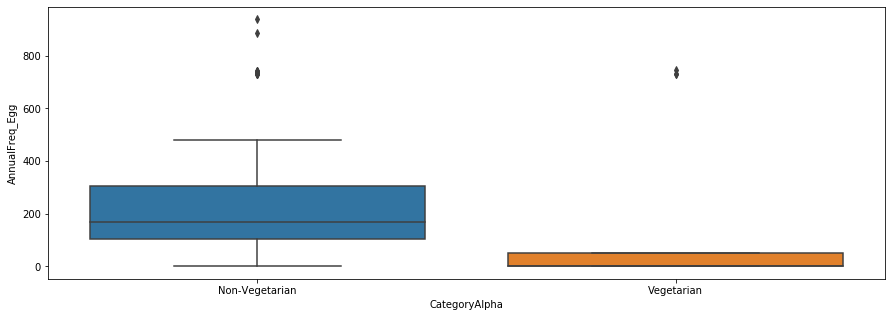

In [80]:
plt.figure(figsize=(15,5))
sns.boxplot(y='AnnualFreq_Egg', x='CategoryAlpha', data=df)

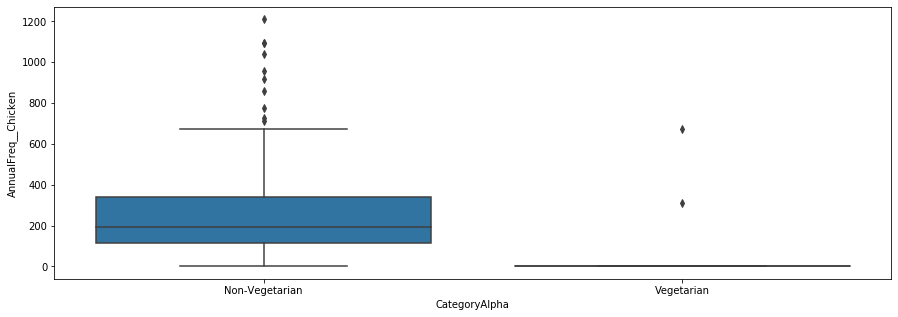

In [81]:
plt.figure(figsize=(15,5))
sns.boxplot(y='AnnualFreq__Chicken', x='CategoryAlpha', data=df)

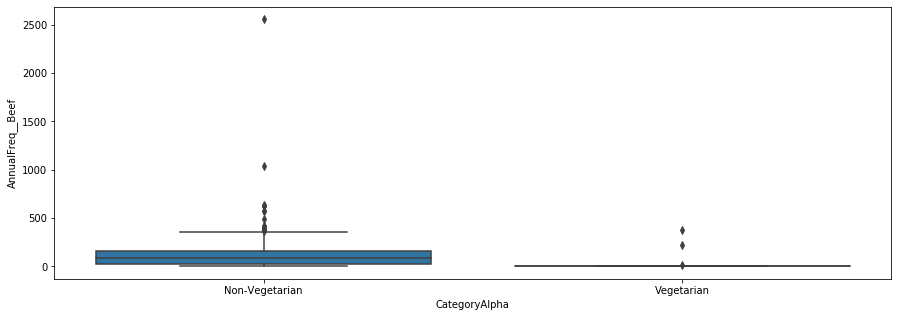

In [82]:
plt.figure(figsize=(15,5))
sns.boxplot(y='AnnualFreq__Beef', x='CategoryAlpha', data=df)

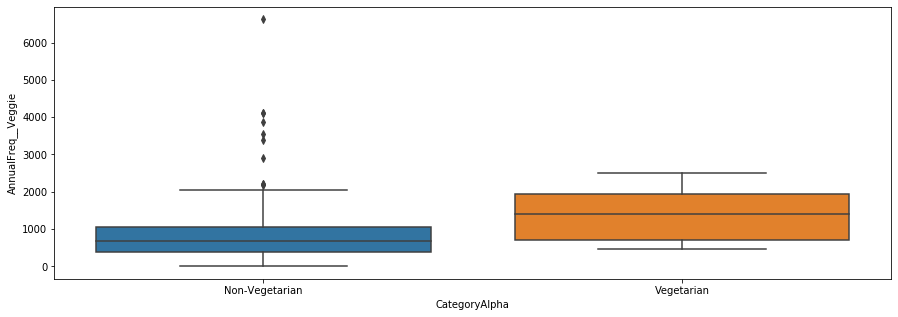

In [83]:
plt.figure(figsize=(15,5))
sns.boxplot(y='AnnualFreq__Veggie', x='CategoryAlpha', data=df)

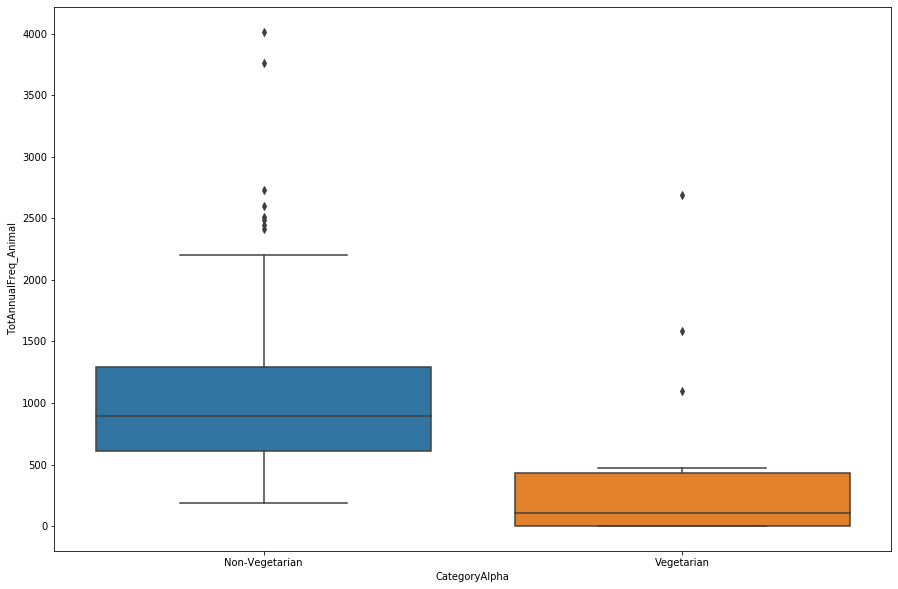

In [84]:
plt.figure(figsize=(15,10))
sns.boxplot(y='TotAnnualFreq_Animal', x='CategoryAlpha', data=df)

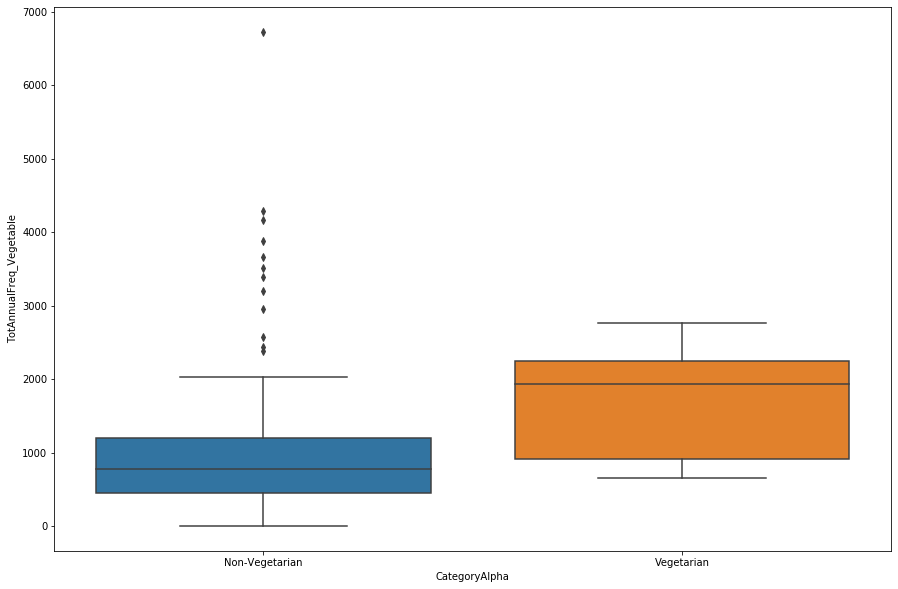

In [85]:
plt.figure(figsize=(15,10))
sns.boxplot(y='TotAnnualFreq_Vegetable', x='CategoryAlpha', data=df)

## CATEGORY BETA

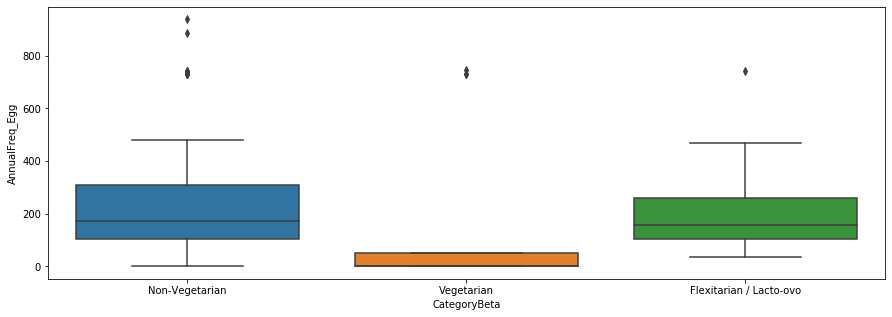

In [86]:
plt.figure(figsize=(15,5))
sns.boxplot(y='AnnualFreq_Egg', x='CategoryBeta', data=df)

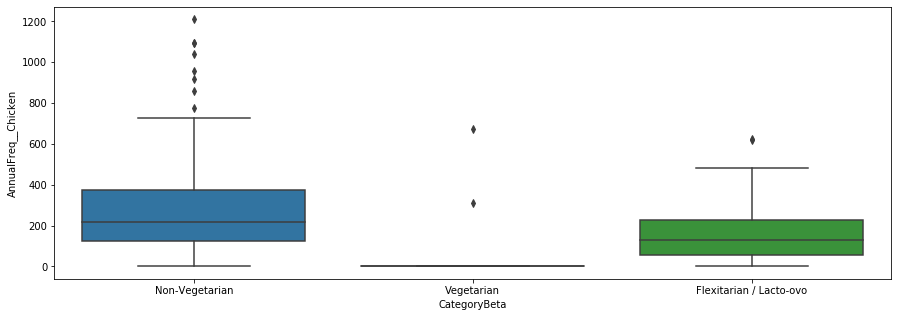

In [87]:
plt.figure(figsize=(15,5))
sns.boxplot(y='AnnualFreq__Chicken', x='CategoryBeta', data=df)

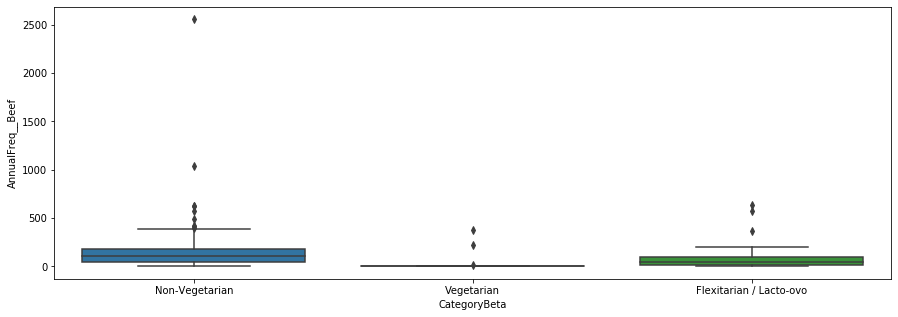

In [88]:
plt.figure(figsize=(15,5))
sns.boxplot(y='AnnualFreq__Beef', x='CategoryBeta', data=df)

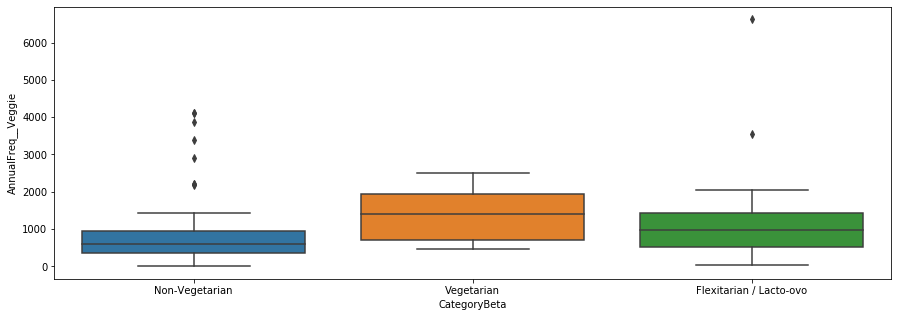

In [89]:
plt.figure(figsize=(15,5))
sns.boxplot(y='AnnualFreq__Veggie', x='CategoryBeta', data=df)

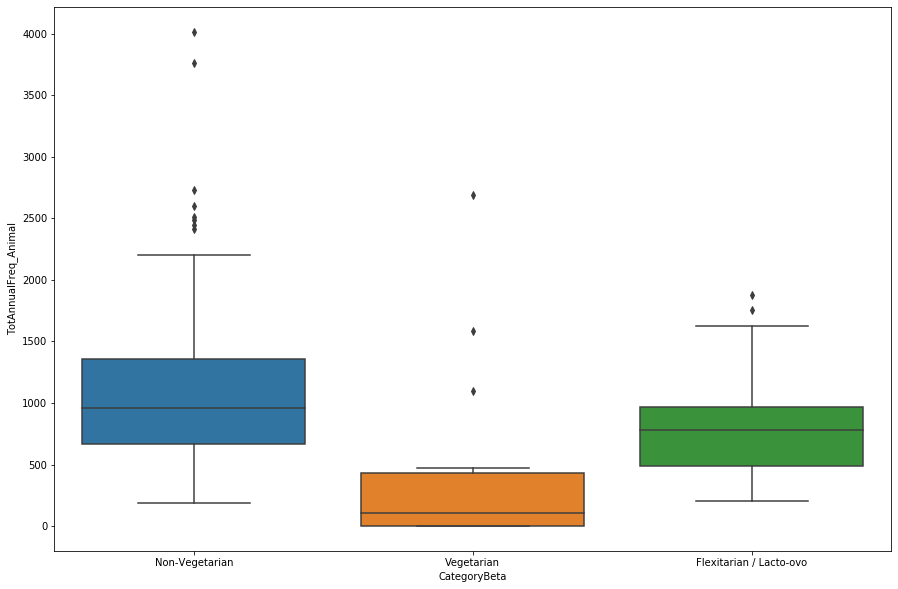

In [90]:
plt.figure(figsize=(15,10))
sns.boxplot(y='TotAnnualFreq_Animal', x='CategoryBeta', data=df)

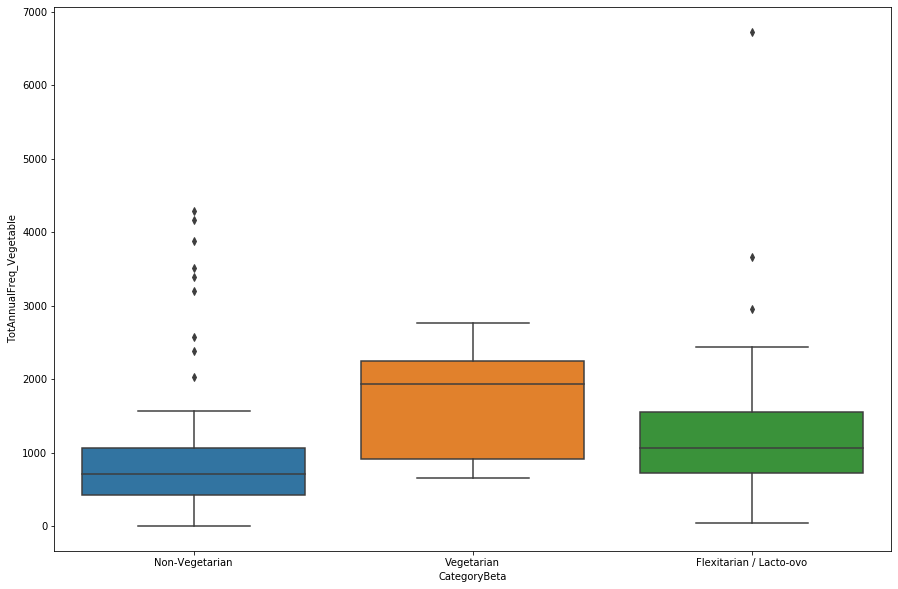

In [91]:
plt.figure(figsize=(15,10))
sns.boxplot(y='TotAnnualFreq_Vegetable', x='CategoryBeta', data=df)

# MERGE CURRENT DATAFRAME WITH RECIPE DATA

In [92]:
df

,DATE,SEX,AGE,DOMICILE,SELF-IDENTIFY,TelurAyam_Freq,TelurAyam_Period,TelurBebek_Freq,TelurBebek_Period,TelurPuyuh_Freq,...,AnnualFreq__Chicken,AnnualFreq__Beef,AnnualFreq__Lamb,AnnualFreq__Pork,AnnualFreq__Seafood,AnnualFreq__Veggie,AnnualFreq__Animilk,AnnualFreq__Veggiemilk,TotAnnualFreq_Animal,TotAnnualFreq_Vegetable
0,2020/12/09 05:59:34,Perempuan / Female,22.0,Bali,Normal,5,Per Minggu / Per week,0,Per Tahun / Per year,2,...,40,19,4,15,23,1086,108,18,471,1104
1,2020/12/09 01:12:28,Perempuan / Female,46.0,Bali,Vegan,0,0,0,0,0,...,0,0,0,0,0,2031,0,365,0,2396
2,2020/12/09 00:17:35,Perempuan / Female,36.0,Bali,Vegan,0,0,0,0,0,...,0,0,0,0,0,2031,0,730,0,2761
3,2020/12/09 00:16:27,Perempuan / Female,37.0,Bali,Vegan,0,0,0,0,0,...,0,0,0,0,0,1404,0,730,0,2134
4,2020/12/09 00:15:25,Laki-laki / Male,60.0,Bali,Pescatarian,0,0,0,0,0,...,0,0,0,0,104,780,468,260,572,1040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2020/12/02 22:14:16,Laki-laki / Male,37.0,Lainnya / Others,Normal,4,Per Minggu / Per week,1,Per Bulan / Per month,0,...,177,70,7,0,180,582,10,0,664,582
162,2020/12/02 22:11:38,Laki-laki / Male,39.0,Bali,Normal,3,Per Minggu / Per week,1,Per Tahun / Per year,3,...,316,113,49,0,222,168,365,0,1378,168
163,2020/12/02 22:04:23,Laki-laki / Male,25.0,Bali,Normal,2,Per Minggu / Per week,1,Per Bulan / Per month,0,...,455,20,15,157,76,1222,365,0,1204,1222
164,2020/12/02 21:54:23,Laki-laki / Male,26.0,Lainnya / Others,Normal,3,Per Minggu / Per week,1,Per Bulan / Per month,1,...,388,356,48,0,78,454,364,60,1403,514


In [93]:
edf = pd.read_excel("Emission Calculator Result 2.xlsx")

In [94]:
edf.head()

,telurayam_weight,telurayam_emis,telurayam_fde,telurayam_emispergram,telurbebek_weight,telurbebek_emis,telurbebek_fde,telurbebek_emispergram,telurpuyuh_weight,telurpuyuh_emis,...,susunabati_fde,susunabati_emispergram,keju_weight,keju_emis,keju_fde,keju_emispergram,yoghurt_weight,yoghurt_emis,yoghurt_fde,yoghurt_emispergram
0,50,225,0.074,4.5,120,541,0.178,4.51,50,225,...,0.051,0.78,30,264,0.087,8.8,200,156,0.051,0.78
1,50,225,0.074,4.5,120,541,0.178,4.51,50,225,...,0.051,0.78,30,264,0.087,8.8,200,156,0.051,0.78
2,50,225,0.074,4.5,120,541,0.178,4.51,50,225,...,0.051,0.78,30,264,0.087,8.8,200,156,0.051,0.78
3,50,225,0.074,4.5,120,541,0.178,4.51,50,225,...,0.051,0.78,30,264,0.087,8.8,200,156,0.051,0.78
4,50,225,0.074,4.5,120,541,0.178,4.51,50,225,...,0.051,0.78,30,264,0.087,8.8,200,156,0.051,0.78


In [95]:
df.reset_index()

,index,DATE,SEX,AGE,DOMICILE,SELF-IDENTIFY,TelurAyam_Freq,TelurAyam_Period,TelurBebek_Freq,TelurBebek_Period,...,AnnualFreq__Chicken,AnnualFreq__Beef,AnnualFreq__Lamb,AnnualFreq__Pork,AnnualFreq__Seafood,AnnualFreq__Veggie,AnnualFreq__Animilk,AnnualFreq__Veggiemilk,TotAnnualFreq_Animal,TotAnnualFreq_Vegetable
0,0,2020/12/09 05:59:34,Perempuan / Female,22.0,Bali,Normal,5,Per Minggu / Per week,0,Per Tahun / Per year,...,40,19,4,15,23,1086,108,18,471,1104
1,1,2020/12/09 01:12:28,Perempuan / Female,46.0,Bali,Vegan,0,0,0,0,...,0,0,0,0,0,2031,0,365,0,2396
2,2,2020/12/09 00:17:35,Perempuan / Female,36.0,Bali,Vegan,0,0,0,0,...,0,0,0,0,0,2031,0,730,0,2761
3,3,2020/12/09 00:16:27,Perempuan / Female,37.0,Bali,Vegan,0,0,0,0,...,0,0,0,0,0,1404,0,730,0,2134
4,4,2020/12/09 00:15:25,Laki-laki / Male,60.0,Bali,Pescatarian,0,0,0,0,...,0,0,0,0,104,780,468,260,572,1040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,161,2020/12/02 22:14:16,Laki-laki / Male,37.0,Lainnya / Others,Normal,4,Per Minggu / Per week,1,Per Bulan / Per month,...,177,70,7,0,180,582,10,0,664,582
161,162,2020/12/02 22:11:38,Laki-laki / Male,39.0,Bali,Normal,3,Per Minggu / Per week,1,Per Tahun / Per year,...,316,113,49,0,222,168,365,0,1378,168
162,163,2020/12/02 22:04:23,Laki-laki / Male,25.0,Bali,Normal,2,Per Minggu / Per week,1,Per Bulan / Per month,...,455,20,15,157,76,1222,365,0,1204,1222
163,164,2020/12/02 21:54:23,Laki-laki / Male,26.0,Lainnya / Others,Normal,3,Per Minggu / Per week,1,Per Bulan / Per month,...,388,356,48,0,78,454,364,60,1403,514


In [96]:
mergeddf = df.merge(edf, left_index=True, right_index=True)

# WEIGHT SUMMARY

In [97]:
def weight_egg(row):
    telurayam = row['TelurAyam_Freq']
    telurbebek = row['TelurBebek_Freq']
    telurpuyuh = row['TelurPuyuh_Freq']

    prd_telurayam = row['TelurAyam_Period']
    prd_telurbebek = row['TelurBebek_Period']
    prd_telurpuyuh = row['TelurPuyuh_Period']

    if prd_telurayam == 'Per Hari / Per day':
        a = telurayam*365
    elif prd_telurayam == 'Per Minggu / Per week':
        a = telurayam*52
    elif prd_telurayam == 'Per Bulan / Per month':
        a = telurayam*12
    else:
        a = telurayam

    if prd_telurbebek == 'Per Hari / Per day':
        b = telurbebek*365
    elif prd_telurbebek == 'Per Minggu / Per week':
        b = telurbebek*52
    elif prd_telurbebek == 'Per Bulan / Per month':
        b = telurbebek*12
    else:
        b = telurbebek

    if prd_telurpuyuh == 'Per Hari / Per day':
        c = telurpuyuh*365
    elif prd_telurpuyuh == 'Per Minggu / Per week':
        c = telurpuyuh*52
    elif prd_telurpuyuh == 'Per Bulan / Per month':
        c = telurpuyuh*12
    else:
        c = telurpuyuh
    
    return (a*row['telurayam_weight'])+(b*row['telurbebek_weight'])+(c*row['telurpuyuh_weight'])

In [98]:
def weight_chicken(row):
    buburayam = row['BuburAyam_Freq']
    sotoayam = row['SotoAyam_Freq']
    sateayam = row['SateAyam_Freq']
    ayamfast = row['AyamFast_Freq']
    pecelayam = row['PecelAyam_Freq']
    ayamgrgbkr = row['AyamGorengBakar_Freq']
    oporayam = row['OporAyam_Freq']

    prd_buburayam = row['BuburAyam_Period']
    prd_sotoayam = row['SotoAyam_Period']
    prd_sateayam = row['SateAyam_Period']
    prd_ayamfast = row['AyamFast_Period']
    prd_pecelayam = row['PecelAyam_Period']
    prd_ayamgrgbkr = row['AyamGorengBakar_Period']
    prd_oporayam = row['OporAyam_Period']

    if prd_buburayam == 'Per Hari / Per day':
        a = buburayam*365
    elif prd_buburayam == 'Per Minggu / Per week':
        a = buburayam*52
    elif prd_buburayam == 'Per Bulan / Per month':
        a = buburayam*12
    else:
        a = buburayam

    if prd_sotoayam == 'Per Hari / Per day':
        b = sotoayam*365
    elif prd_sotoayam == 'Per Minggu / Per week':
        b = sotoayam*52
    elif prd_sotoayam == 'Per Bulan / Per month':
        b = sotoayam*12
    else:
        b = sotoayam

    if prd_sateayam == 'Per Hari / Per day':
        c = sateayam*365
    elif prd_sateayam == 'Per Minggu / Per week':
        c = sateayam*52
    elif prd_sateayam == 'Per Bulan / Per month':
        c = sateayam*12
    else:
        c = sateayam
    
    if prd_ayamfast == 'Per Hari / Per day':
        d = ayamfast*365
    elif prd_ayamfast == 'Per Minggu / Per week':
        d = ayamfast*52
    elif prd_ayamfast == 'Per Bulan / Per month':
        d = ayamfast*12
    else:
        d = ayamfast

    if prd_pecelayam == 'Per Hari / Per day':
        e = pecelayam*365
    elif prd_pecelayam == 'Per Minggu / Per week':
        e = pecelayam*52
    elif prd_pecelayam == 'Per Bulan / Per month':
        e = pecelayam*12
    else:
        e = pecelayam

    if prd_ayamgrgbkr == 'Per Hari / Per day':
        f = ayamgrgbkr*365
    elif prd_ayamgrgbkr == 'Per Minggu / Per week':
        f = ayamgrgbkr*52
    elif prd_ayamgrgbkr == 'Per Bulan / Per month':
        f = ayamgrgbkr*12
    else:
        f = ayamgrgbkr

    if prd_oporayam == 'Per Hari / Per day':
        g = oporayam*365
    elif prd_oporayam == 'Per Minggu / Per week':
        g = oporayam*52
    elif prd_oporayam == 'Per Bulan / Per month':
        g = oporayam*12
    else:
        g = oporayam
    
    return (a*row['buburayam_weight']) + (b*row['sotoayam_weight']) + (c*row['sateayam_weight']) + (d*row['ayamfast_weight']) + (e*row['pecelayam_weight']) + (f*row['ayamgorengbakar_weight']) + (g*row['oporayam_weight'])

In [99]:
def weight_beef(row):
    rendang = row['Rendang_Freq']
    sotodaging = row['SotoDaging_Freq']
    dendeng = row['Dendeng_Freq']
    steak = row['Steak_Freq']
    satedaging = row['SateDaging_Freq']
    seisapi = row['SeiSapi_Freq']
    sopsapi = row['SopSapi_Freq']
    sopbuntut = row['SopBuntut_Freq']
    osengsapi = row['OsengSapi_Freq']
    baksosapi = row['BaksoSapi_Freq']
    sosissapi = row['SosisSapi_Freq']
    kornetsapi = row['KornetSapi_Freq']
    hamburger = row['Hamburger_Freq']

    prd_rendang = row['Rendang_Period']
    prd_sotodaging = row['SotoDaging_Period']
    prd_dendeng = row['Dendeng_Period']
    prd_steak = row['Steak_Period']
    prd_satedaging = row['SateDaging_Period']
    prd_seisapi = row['SeiSapi_Period']
    prd_sopsapi = row['SopSapi_Period']
    prd_sopbuntut = row['SopBuntut_Period']
    prd_osengsapi = row['OsengSapi_Period']
    prd_baksosapi = row['BaksoSapi_Period']
    prd_sosissapi = row['SosisSapi_Period']
    prd_kornetsapi = row['KornetSapi_Period']
    prd_hamburger = row['Hamburger_Period']

    if prd_rendang == 'Per Hari / Per day':
        a = rendang*365
    elif prd_rendang == 'Per Minggu / Per week':
        a = rendang*52
    elif prd_rendang == 'Per Bulan / Per month':
        a = rendang*12
    else:
        a = rendang

    if prd_sotodaging == 'Per Hari / Per day':
        b = sotodaging*365
    elif prd_sotodaging == 'Per Minggu / Per week':
        b = sotodaging*52
    elif prd_sotodaging == 'Per Bulan / Per month':
        b = sotodaging*12
    else:
        b = sotodaging

    if prd_dendeng == 'Per Hari / Per day':
        c = dendeng*365
    elif prd_dendeng == 'Per Minggu / Per week':
        c = dendeng*52
    elif prd_dendeng == 'Per Bulan / Per month':
        c = dendeng*12
    else:
        c = dendeng
    
    if prd_steak == 'Per Hari / Per day':
        d = steak*365
    elif prd_steak == 'Per Minggu / Per week':
        d = steak*52
    elif prd_steak == 'Per Bulan / Per month':
        d = steak*12
    else:
        d = steak

    if prd_satedaging == 'Per Hari / Per day':
        e = satedaging*365
    elif prd_satedaging == 'Per Minggu / Per week':
        e = satedaging*52
    elif prd_satedaging == 'Per Bulan / Per month':
        e = satedaging*12
    else:
        e = satedaging

    if prd_seisapi == 'Per Hari / Per day':
        f = seisapi*365
    elif prd_seisapi == 'Per Minggu / Per week':
        f = seisapi*52
    elif prd_seisapi == 'Per Bulan / Per month':
        f = seisapi*12
    else:
        f = seisapi

    if prd_sopsapi == 'Per Hari / Per day':
        g = sopsapi*365
    elif prd_sopsapi == 'Per Minggu / Per week':
        g = sopsapi*52
    elif prd_sopsapi == 'Per Bulan / Per month':
        g = sopsapi*12
    else:
        g = sopsapi
    
    if prd_sopbuntut == 'Per Hari / Per day':
        h = sopbuntut*365
    elif prd_sopbuntut == 'Per Minggu / Per week':
        h = sopbuntut*52
    elif prd_sopbuntut == 'Per Bulan / Per month':
        h = sopbuntut*12
    else:
        h = sopbuntut

    if prd_osengsapi == 'Per Hari / Per day':
        i = osengsapi*365
    elif prd_osengsapi == 'Per Minggu / Per week':
        i = osengsapi*52
    elif prd_osengsapi == 'Per Bulan / Per month':
        i = osengsapi*12
    else:
        i = osengsapi

    if prd_baksosapi == 'Per Hari / Per day':
        j = baksosapi*365
    elif prd_baksosapi == 'Per Minggu / Per week':
        j = baksosapi*52
    elif prd_baksosapi == 'Per Bulan / Per month':
        j = baksosapi*12
    else:
        j = baksosapi

    if prd_sosissapi == 'Per Hari / Per day':
        k = sosissapi*365
    elif prd_sosissapi == 'Per Minggu / Per week':
        k = sosissapi*52
    elif prd_sosissapi == 'Per Bulan / Per month':
        k = sosissapi*12
    else:
        k = sosissapi

    if prd_kornetsapi == 'Per Hari / Per day':
        l = kornetsapi*365
    elif prd_kornetsapi == 'Per Minggu / Per week':
        l = kornetsapi*52
    elif prd_kornetsapi == 'Per Bulan / Per month':
        l = kornetsapi*12
    else:
        l = kornetsapi

    if prd_hamburger == 'Per Hari / Per day':
        m = hamburger*365
    elif prd_hamburger == 'Per Minggu / Per week':
        m = hamburger*52
    elif prd_hamburger == 'Per Bulan / Per month':
        m = hamburger*12
    else:
        m = hamburger

    
    return (a*row['rendang_weight']) + (b*row['sotodaging_weight']) + (c*row['dendeng_weight']) + (d*row['steak_weight']) + (e*row['satedaging_weight']) + (f*row['seisapi_weight']) + (g*row['sopsapi_weight']) + (h*row['sopbuntut_weight']) + (i*row['osengsapi_weight']) + (j*row['baksosapi_weight']) + (k*row['sosissapi_weight']) + (l*row['kornetsapi_weight']) + (m*row['hamburger_weight']) 

In [100]:
def weight_lamb(row):
    sopkambing = row['SopKambing_Freq']
    tongsengkambing = row['TongsengKambing_Freq']
    satekambing = row['SateKambing_Freq']
    gulaikambing = row['GulaiKambing_Freq']

    prd_sopkambing = row['SopKambing_Period']
    prd_tongsengkambing = row['TongsengKambing_Period']
    prd_satekambing = row['SateKambing_Period']
    prd_gulaikambing = row['GulaiKambing_Period']

    if prd_sopkambing == 'Per Hari / Per day':
        a = sopkambing*365
    elif prd_sopkambing == 'Per Minggu / Per week':
        a = sopkambing*52
    elif prd_sopkambing == 'Per Bulan / Per month':
        a = sopkambing*12
    else:
        a = sopkambing

    if prd_tongsengkambing == 'Per Hari / Per day':
        b = tongsengkambing*365
    elif prd_tongsengkambing == 'Per Minggu / Per week':
        b = tongsengkambing*52
    elif prd_tongsengkambing == 'Per Bulan / Per month':
        b = tongsengkambing*12
    else:
        b = tongsengkambing

    if prd_satekambing == 'Per Hari / Per day':
        c = satekambing*365
    elif prd_satekambing == 'Per Minggu / Per week':
        c = satekambing*52
    elif prd_satekambing == 'Per Bulan / Per month':
        c = satekambing*12
    else:
        c = satekambing
    
    if prd_gulaikambing == 'Per Hari / Per day':
        d = gulaikambing*365
    elif prd_gulaikambing == 'Per Minggu / Per week':
        d = gulaikambing*52
    elif prd_gulaikambing == 'Per Bulan / Per month':
        d = gulaikambing*12
    else:
        d = gulaikambing
    
    return (a*row['sopkambing_weight']) + (b*row['tongsengkambing_weight']) + (c*row['satekambing_weight']) + (d*row['gulaikambing_weight'])

In [101]:
def weight_pork(row):
    babipanggang = row['BabiPanggang_Freq']
    babikecap = row['BabiKecap_Freq']
    satebabi = row['SateBabi_Freq']
    seibabi = row['SeiBabi_Freq']
    sotobabi = row['SotoBabi_Freq']
    babiguling = row['BabiGuling_Freq']
    igababi = row['IgaBabi_Freq']

    prd_babipanggang = row['BabiPanggang_Period']
    prd_babikecap = row['BabiKecap_Period']
    prd_satebabi = row['SateBabi_Period']
    prd_seibabi = row['SeiBabi_Period']
    prd_sotobabi = row['SotoBabi_Period']
    prd_babiguling = row['BabiGuling_Period']
    prd_igababi = row['IgaBabi_Period']

    if prd_babipanggang == 'Per Hari / Per day':
        a = babipanggang*365
    elif prd_babipanggang == 'Per Minggu / Per week':
        a = babipanggang*52
    elif prd_babipanggang == 'Per Bulan / Per month':
        a = babipanggang*12
    else:
        a = babipanggang

    if prd_babikecap == 'Per Hari / Per day':
        b = babikecap*365
    elif prd_babikecap == 'Per Minggu / Per week':
        b = babikecap*52
    elif prd_babikecap == 'Per Bulan / Per month':
        b = babikecap*12
    else:
        b = babikecap

    if prd_satebabi == 'Per Hari / Per day':
        c = satebabi*365
    elif prd_satebabi == 'Per Minggu / Per week':
        c = satebabi*52
    elif prd_satebabi == 'Per Bulan / Per month':
        c = satebabi*12
    else:
        c = satebabi
    
    if prd_seibabi == 'Per Hari / Per day':
        d = seibabi*365
    elif prd_seibabi == 'Per Minggu / Per week':
        d = seibabi*52
    elif prd_seibabi == 'Per Bulan / Per month':
        d = seibabi*12
    else:
        d = seibabi

    if prd_sotobabi == 'Per Hari / Per day':
        e = sotobabi*365
    elif prd_sotobabi == 'Per Minggu / Per week':
        e = sotobabi*52
    elif prd_sotobabi == 'Per Bulan / Per month':
        e = sotobabi*12
    else:
        e = sotobabi

    if prd_babiguling == 'Per Hari / Per day':
        f = babiguling*365
    elif prd_babiguling == 'Per Minggu / Per week':
        f = babiguling*52
    elif prd_babiguling == 'Per Bulan / Per month':
        f = babiguling*12
    else:
        f = babiguling

    if prd_igababi == 'Per Hari / Per day':
        g = igababi*365
    elif prd_igababi == 'Per Minggu / Per week':
        g = igababi*52
    elif prd_igababi == 'Per Bulan / Per month':
        g = igababi*12
    else:
        g = igababi
    
    return (a*row['babipanggang_weight']) + (b*row['babikecap_weight']) + (c*row['satebabi_weight']) + (d*row['seibabi_weight']) + (e*row['sotobabi_weight']) + (f*row['babiguling_weight']) + (g*row['igababi_weight'])

In [102]:
def weight_seafood(row):
    cumi = row['Cumi_Freq']
    udang = row['Udang_Freq']
    kepiting = row['Kepiting_Freq']
    kerang = row['Kerang_Freq']
    ikan = row['Ikan_Freq']

    prd_cumi = row['Cumi_Period']
    prd_udang = row['Udang_Period']
    prd_kepiting = row['Kepiting_Period']
    prd_kerang = row['Kerang_Period']
    prd_ikan = row['Ikan_Period']

    if prd_cumi == 'Per Hari / Per day':
        a = cumi*365
    elif prd_cumi == 'Per Minggu / Per week':
        a = cumi*52
    elif prd_cumi == 'Per Bulan / Per month':
        a = cumi*12
    else:
        a = cumi

    if prd_udang == 'Per Hari / Per day':
        b = udang*365
    elif prd_udang == 'Per Minggu / Per week':
        b = udang*52
    elif prd_udang == 'Per Bulan / Per month':
        b = udang*12
    else:
        b = udang

    if prd_kepiting == 'Per Hari / Per day':
        c = kepiting*365
    elif prd_kepiting == 'Per Minggu / Per week':
        c = kepiting*52
    elif prd_kepiting == 'Per Bulan / Per month':
        c = kepiting*12
    else:
        c = kepiting
    
    if prd_kerang == 'Per Hari / Per day':
        d = kerang*365
    elif prd_kerang == 'Per Minggu / Per week':
        d = kerang*52
    elif prd_kerang == 'Per Bulan / Per month':
        d = kerang*12
    else:
        d = kerang

    if prd_ikan == 'Per Hari / Per day':
        e = ikan*365
    elif prd_ikan == 'Per Minggu / Per week':
        e = ikan*52
    elif prd_ikan == 'Per Bulan / Per month':
        e = ikan*12
    else:
        e = ikan
    
    return (a*row['cumi_weight']) + (b*row['udang_weight']) + (c*row['kepiting_weight']) + (d*row['kerang_weight']) + (e*row['ikan_weight'])

In [103]:
def weight_animilk(row):
    susuhewani = row['SusuHewani_Freq']
    keju = row['Keju_Freq']

    prd_susuhewani = row['SusuHewani_Period']
    prd_keju = row['Keju_Period']

    if prd_susuhewani == 'Per Hari / Per day':
        a = susuhewani*365
    elif prd_susuhewani == 'Per Minggu / Per week':
        a = susuhewani*52
    elif prd_susuhewani == 'Per Bulan / Per month':
        a = susuhewani*12
    else:
        a = susuhewani

    if prd_keju == 'Per Hari / Per day':
        b = keju*365
    elif prd_keju == 'Per Minggu / Per week':
        b = keju*52
    elif prd_keju == 'Per Bulan / Per month':
        b = keju*12
    else:
        b = keju
    
    return (a*row['susuhewani_weight']) + (b*row['keju_weight'])

In [104]:
def weight_veggiemilk(row):
    susunabati = row['SusuNabati_Freq']
    yoghurt = row['Yoghurt_Freq']

    prd_susunabati = row['SusuNabati_Period']
    prd_yoghurt = row['Yoghurt_Period']

    if prd_susunabati == 'Per Hari / Per day':
        a = susunabati*365
    elif prd_susunabati == 'Per Minggu / Per week':
        a = susunabati*52
    elif prd_susunabati == 'Per Bulan / Per month':
        a = susunabati*12
    else:
        a = susunabati

    if prd_yoghurt == 'Per Hari / Per day':
        b = yoghurt*365
    elif prd_yoghurt == 'Per Minggu / Per week':
        b = yoghurt*52
    elif prd_yoghurt == 'Per Bulan / Per month':
        b = yoghurt*12
    else:
        b = yoghurt
    
    return (a*row['susunabati_weight']) + (b*row['yoghurt_weight'])

In [105]:
def weight_veggie(row):
    gadogado = row['Gadogado_Freq']
    sayurasem = row['SayurAsem_Freq']
    sayurlodeh = row['SayurLodeh_Freq']
    pecelsayur = row['PecelSayur_Freq']
    cahkangkung = row['CahKangkung_Freq']
    urap = row['Urap_Freq']
    salad = row['Salad_Freq']
    gudegnangka = row['GudegNangka_Freq']
    sayurlain = row['SayurLain_Freq']
    buah = row['Buah_Freq']

    prd_gadogado = row['Gadogado_Period']
    prd_sayurasem = row['SayurAsem_Period']
    prd_sayurlodeh = row['SayurLodeh_Period']
    prd_pecelsayur = row['PecelSayur_Period']
    prd_cahkangkung = row['CahKangkung_Period']
    prd_urap = row['Urap_Period']
    prd_salad = row['Salad_Period']
    prd_gudegnangka = row['GudegNangka_Period']
    prd_sayurlain = row['SayurLain_Period']
    prd_buah = row['Buah_Period']

    if prd_gadogado == 'Per Hari / Per day':
        a = gadogado*365
    elif prd_gadogado == 'Per Minggu / Per week':
        a = gadogado*52
    elif prd_gadogado == 'Per Bulan / Per month':
        a = gadogado*12
    else:
        a = gadogado

    if prd_sayurasem == 'Per Hari / Per day':
        b = sayurasem*365
    elif prd_sayurasem == 'Per Minggu / Per week':
        b = sayurasem*52
    elif prd_sayurasem == 'Per Bulan / Per month':
        b = sayurasem*12
    else:
        b = sayurasem

    if prd_sayurlodeh == 'Per Hari / Per day':
        c = sayurlodeh*365
    elif prd_sayurlodeh == 'Per Minggu / Per week':
        c = sayurlodeh*52
    elif prd_sayurlodeh == 'Per Bulan / Per month':
        c = sayurlodeh*12
    else:
        c = sayurlodeh
    
    if prd_pecelsayur == 'Per Hari / Per day':
        d = pecelsayur*365
    elif prd_pecelsayur == 'Per Minggu / Per week':
        d = pecelsayur*52
    elif prd_pecelsayur == 'Per Bulan / Per month':
        d = pecelsayur*12
    else:
        d = pecelsayur

    if prd_cahkangkung == 'Per Hari / Per day':
        e = cahkangkung*365
    elif prd_cahkangkung == 'Per Minggu / Per week':
        e = cahkangkung*52
    elif prd_cahkangkung == 'Per Bulan / Per month':
        e = cahkangkung*12
    else:
        e = cahkangkung

    if prd_urap == 'Per Hari / Per day':
        f = urap*365
    elif prd_urap == 'Per Minggu / Per week':
        f = urap*52
    elif prd_urap == 'Per Bulan / Per month':
        f = urap*12
    else:
        f = urap

    if prd_salad == 'Per Hari / Per day':
        g = salad*365
    elif prd_salad == 'Per Minggu / Per week':
        g = salad*52
    elif prd_salad == 'Per Bulan / Per month':
        g = salad*12
    else:
        g = salad
    
    if prd_gudegnangka == 'Per Hari / Per day':
        h = gudegnangka*365
    elif prd_gudegnangka == 'Per Minggu / Per week':
        h = gudegnangka*52
    elif prd_gudegnangka == 'Per Bulan / Per month':
        h = gudegnangka*12
    else:
        h = gudegnangka

    if prd_sayurlain == 'Per Hari / Per day':
        i = sayurlain*365
    elif prd_sayurlain == 'Per Minggu / Per week':
        i = sayurlain*52
    elif prd_sayurlain == 'Per Bulan / Per month':
        i = sayurlain*12
    else:
        i = sayurlain

    if prd_buah == 'Per Hari / Per day':
        j = buah*365
    elif prd_buah == 'Per Minggu / Per week':
        j = buah*52
    elif prd_buah == 'Per Bulan / Per month':
        j = buah*12
    else:
        j = buah

    
    return (a*row['gadogado_weight']) + (b*row['sayurasem_weight']) + (c*row['sayurlodeh_weight']) + (d*row['pecelsayur_weight']) + (e*row['cahkangkung_weight']) + (f*row['urap_weight']) + (g*row['salad_weight']) + (h*row['gudegnangka_weight']) + (i*row['sayurlain_weight']) + (j*row['buah_weight'])

In [106]:
mergeddf['Weight_Egg'] = mergeddf.apply(lambda row: weight_egg(row), axis=1)
mergeddf['Weight_Chicken'] = mergeddf.apply(lambda row: weight_chicken(row), axis=1)
mergeddf['Weight_Beef'] = mergeddf.apply(lambda row: weight_beef(row), axis=1)
mergeddf['Weight_Lamb'] = mergeddf.apply(lambda row: weight_lamb(row), axis=1)
mergeddf['Weight_Pork'] = mergeddf.apply(lambda row: weight_pork(row), axis=1)
mergeddf['Weight_Seafood'] = mergeddf.apply(lambda row: weight_seafood(row), axis=1)
mergeddf['Weight_Veggie'] = mergeddf.apply(lambda row: weight_veggie(row), axis=1)
mergeddf['Weight_Animilk'] = mergeddf.apply(lambda row: weight_animilk(row), axis=1)
mergeddf['Weight_Veggiemilk'] = mergeddf.apply(lambda row: weight_veggiemilk(row), axis=1)

In [107]:
mergeddf['Total_Weight'] = mergeddf['Weight_Egg'] + mergeddf['Weight_Chicken'] + mergeddf['Weight_Beef'] + mergeddf['Weight_Lamb'] + mergeddf['Weight_Pork'] + mergeddf['Weight_Seafood'] + mergeddf['Weight_Veggie'] + mergeddf['Weight_Animilk'] + mergeddf['Weight_Veggiemilk']

## CATEGORY ALPHA

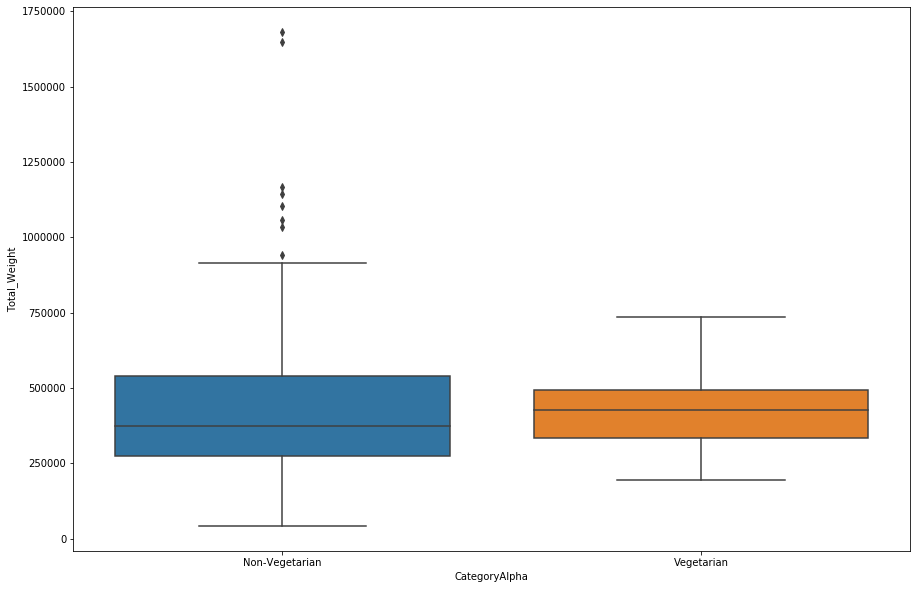

In [108]:
plt.figure(figsize=(15,10))
sns.boxplot(y='Total_Weight', x='CategoryAlpha', data=mergeddf)

## CATEGORY BETA

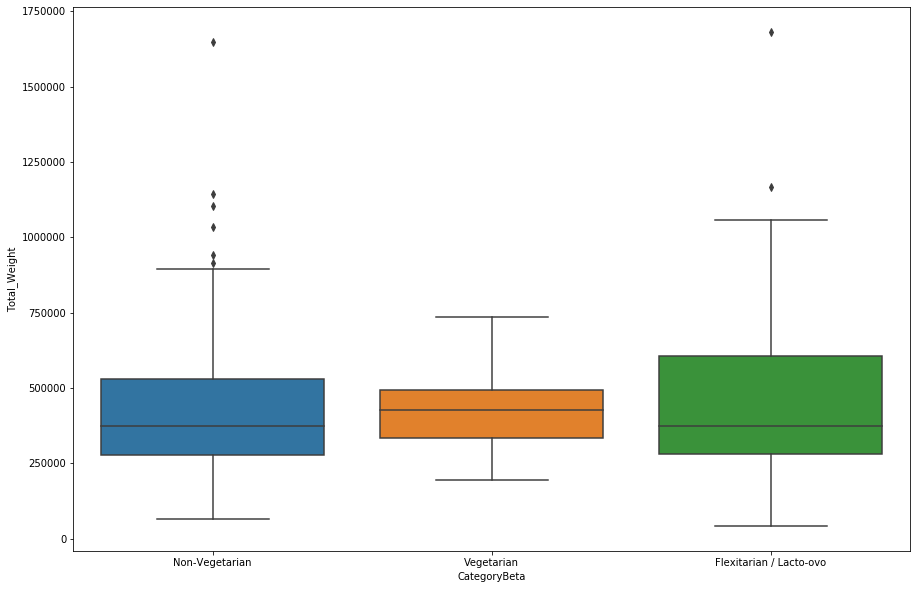

In [109]:
plt.figure(figsize=(15,10))
sns.boxplot(y='Total_Weight', x='CategoryBeta', data=mergeddf)

# GREEN HOUSE GAS (GHG) SUMMARY

In [110]:
def ghg_egg(row):
    telurayam = row['TelurAyam_Freq']
    telurbebek = row['TelurBebek_Freq']
    telurpuyuh = row['TelurPuyuh_Freq']

    prd_telurayam = row['TelurAyam_Period']
    prd_telurbebek = row['TelurBebek_Period']
    prd_telurpuyuh = row['TelurPuyuh_Period']

    if prd_telurayam == 'Per Hari / Per day':
        a = telurayam*365
    elif prd_telurayam == 'Per Minggu / Per week':
        a = telurayam*52
    elif prd_telurayam == 'Per Bulan / Per month':
        a = telurayam*12
    else:
        a = telurayam

    if prd_telurbebek == 'Per Hari / Per day':
        b = telurbebek*365
    elif prd_telurbebek == 'Per Minggu / Per week':
        b = telurbebek*52
    elif prd_telurbebek == 'Per Bulan / Per month':
        b = telurbebek*12
    else:
        b = telurbebek

    if prd_telurpuyuh == 'Per Hari / Per day':
        c = telurpuyuh*365
    elif prd_telurpuyuh == 'Per Minggu / Per week':
        c = telurpuyuh*52
    elif prd_telurpuyuh == 'Per Bulan / Per month':
        c = telurpuyuh*12
    else:
        c = telurpuyuh
    
    return (a*row['telurayam_emis'])+(b*row['telurbebek_emis'])+(c*row['telurpuyuh_emis'])

In [111]:
def ghg_chicken(row):
    buburayam = row['BuburAyam_Freq']
    sotoayam = row['SotoAyam_Freq']
    sateayam = row['SateAyam_Freq']
    ayamfast = row['AyamFast_Freq']
    pecelayam = row['PecelAyam_Freq']
    ayamgrgbkr = row['AyamGorengBakar_Freq']
    oporayam = row['OporAyam_Freq']

    prd_buburayam = row['BuburAyam_Period']
    prd_sotoayam = row['SotoAyam_Period']
    prd_sateayam = row['SateAyam_Period']
    prd_ayamfast = row['AyamFast_Period']
    prd_pecelayam = row['PecelAyam_Period']
    prd_ayamgrgbkr = row['AyamGorengBakar_Period']
    prd_oporayam = row['OporAyam_Period']

    if prd_buburayam == 'Per Hari / Per day':
        a = buburayam*365
    elif prd_buburayam == 'Per Minggu / Per week':
        a = buburayam*52
    elif prd_buburayam == 'Per Bulan / Per month':
        a = buburayam*12
    else:
        a = buburayam

    if prd_sotoayam == 'Per Hari / Per day':
        b = sotoayam*365
    elif prd_sotoayam == 'Per Minggu / Per week':
        b = sotoayam*52
    elif prd_sotoayam == 'Per Bulan / Per month':
        b = sotoayam*12
    else:
        b = sotoayam

    if prd_sateayam == 'Per Hari / Per day':
        c = sateayam*365
    elif prd_sateayam == 'Per Minggu / Per week':
        c = sateayam*52
    elif prd_sateayam == 'Per Bulan / Per month':
        c = sateayam*12
    else:
        c = sateayam
    
    if prd_ayamfast == 'Per Hari / Per day':
        d = ayamfast*365
    elif prd_ayamfast == 'Per Minggu / Per week':
        d = ayamfast*52
    elif prd_ayamfast == 'Per Bulan / Per month':
        d = ayamfast*12
    else:
        d = ayamfast

    if prd_pecelayam == 'Per Hari / Per day':
        e = pecelayam*365
    elif prd_pecelayam == 'Per Minggu / Per week':
        e = pecelayam*52
    elif prd_pecelayam == 'Per Bulan / Per month':
        e = pecelayam*12
    else:
        e = pecelayam

    if prd_ayamgrgbkr == 'Per Hari / Per day':
        f = ayamgrgbkr*365
    elif prd_ayamgrgbkr == 'Per Minggu / Per week':
        f = ayamgrgbkr*52
    elif prd_ayamgrgbkr == 'Per Bulan / Per month':
        f = ayamgrgbkr*12
    else:
        f = ayamgrgbkr

    if prd_oporayam == 'Per Hari / Per day':
        g = oporayam*365
    elif prd_oporayam == 'Per Minggu / Per week':
        g = oporayam*52
    elif prd_oporayam == 'Per Bulan / Per month':
        g = oporayam*12
    else:
        g = oporayam
    
    return (a*row['buburayam_emis']) + (b*row['sotoayam_emis']) + (c*row['sateayam_emis']) + (d*row['ayamfast_emis']) + (e*row['pecelayam_emis']) + (f*row['ayamgorengbakar_emis']) + (g*row['oporayam_emis'])

In [112]:
def ghg_beef(row):
    rendang = row['Rendang_Freq']
    sotodaging = row['SotoDaging_Freq']
    dendeng = row['Dendeng_Freq']
    steak = row['Steak_Freq']
    satedaging = row['SateDaging_Freq']
    seisapi = row['SeiSapi_Freq']
    sopsapi = row['SopSapi_Freq']
    sopbuntut = row['SopBuntut_Freq']
    osengsapi = row['OsengSapi_Freq']
    baksosapi = row['BaksoSapi_Freq']
    sosissapi = row['SosisSapi_Freq']
    kornetsapi = row['KornetSapi_Freq']
    hamburger = row['Hamburger_Freq']

    prd_rendang = row['Rendang_Period']
    prd_sotodaging = row['SotoDaging_Period']
    prd_dendeng = row['Dendeng_Period']
    prd_steak = row['Steak_Period']
    prd_satedaging = row['SateDaging_Period']
    prd_seisapi = row['SeiSapi_Period']
    prd_sopsapi = row['SopSapi_Period']
    prd_sopbuntut = row['SopBuntut_Period']
    prd_osengsapi = row['OsengSapi_Period']
    prd_baksosapi = row['BaksoSapi_Period']
    prd_sosissapi = row['SosisSapi_Period']
    prd_kornetsapi = row['KornetSapi_Period']
    prd_hamburger = row['Hamburger_Period']

    if prd_rendang == 'Per Hari / Per day':
        a = rendang*365
    elif prd_rendang == 'Per Minggu / Per week':
        a = rendang*52
    elif prd_rendang == 'Per Bulan / Per month':
        a = rendang*12
    else:
        a = rendang

    if prd_sotodaging == 'Per Hari / Per day':
        b = sotodaging*365
    elif prd_sotodaging == 'Per Minggu / Per week':
        b = sotodaging*52
    elif prd_sotodaging == 'Per Bulan / Per month':
        b = sotodaging*12
    else:
        b = sotodaging

    if prd_dendeng == 'Per Hari / Per day':
        c = dendeng*365
    elif prd_dendeng == 'Per Minggu / Per week':
        c = dendeng*52
    elif prd_dendeng == 'Per Bulan / Per month':
        c = dendeng*12
    else:
        c = dendeng
    
    if prd_steak == 'Per Hari / Per day':
        d = steak*365
    elif prd_steak == 'Per Minggu / Per week':
        d = steak*52
    elif prd_steak == 'Per Bulan / Per month':
        d = steak*12
    else:
        d = steak

    if prd_satedaging == 'Per Hari / Per day':
        e = satedaging*365
    elif prd_satedaging == 'Per Minggu / Per week':
        e = satedaging*52
    elif prd_satedaging == 'Per Bulan / Per month':
        e = satedaging*12
    else:
        e = satedaging

    if prd_seisapi == 'Per Hari / Per day':
        f = seisapi*365
    elif prd_seisapi == 'Per Minggu / Per week':
        f = seisapi*52
    elif prd_seisapi == 'Per Bulan / Per month':
        f = seisapi*12
    else:
        f = seisapi

    if prd_sopsapi == 'Per Hari / Per day':
        g = sopsapi*365
    elif prd_sopsapi == 'Per Minggu / Per week':
        g = sopsapi*52
    elif prd_sopsapi == 'Per Bulan / Per month':
        g = sopsapi*12
    else:
        g = sopsapi
    
    if prd_sopbuntut == 'Per Hari / Per day':
        h = sopbuntut*365
    elif prd_sopbuntut == 'Per Minggu / Per week':
        h = sopbuntut*52
    elif prd_sopbuntut == 'Per Bulan / Per month':
        h = sopbuntut*12
    else:
        h = sopbuntut

    if prd_osengsapi == 'Per Hari / Per day':
        i = osengsapi*365
    elif prd_osengsapi == 'Per Minggu / Per week':
        i = osengsapi*52
    elif prd_osengsapi == 'Per Bulan / Per month':
        i = osengsapi*12
    else:
        i = osengsapi

    if prd_baksosapi == 'Per Hari / Per day':
        j = baksosapi*365
    elif prd_baksosapi == 'Per Minggu / Per week':
        j = baksosapi*52
    elif prd_baksosapi == 'Per Bulan / Per month':
        j = baksosapi*12
    else:
        j = baksosapi

    if prd_sosissapi == 'Per Hari / Per day':
        k = sosissapi*365
    elif prd_sosissapi == 'Per Minggu / Per week':
        k = sosissapi*52
    elif prd_sosissapi == 'Per Bulan / Per month':
        k = sosissapi*12
    else:
        k = sosissapi

    if prd_kornetsapi == 'Per Hari / Per day':
        l = kornetsapi*365
    elif prd_kornetsapi == 'Per Minggu / Per week':
        l = kornetsapi*52
    elif prd_kornetsapi == 'Per Bulan / Per month':
        l = kornetsapi*12
    else:
        l = kornetsapi

    if prd_hamburger == 'Per Hari / Per day':
        m = hamburger*365
    elif prd_hamburger == 'Per Minggu / Per week':
        m = hamburger*52
    elif prd_hamburger == 'Per Bulan / Per month':
        m = hamburger*12
    else:
        m = hamburger

    
    return (a*row['rendang_emis']) + (b*row['sotodaging_emis']) + (c*row['dendeng_emis']) + (d*row['steak_emis']) + (e*row['satedaging_emis']) + (f*row['seisapi_emis']) + (g*row['sopsapi_emis']) + (h*row['sopbuntut_emis']) + (i*row['osengsapi_emis']) + (j*row['baksosapi_emis']) + (k*row['sosissapi_emis']) + (l*row['kornetsapi_emis']) + (m*row['hamburger_emis']) 

In [113]:
def ghg_lamb(row):
    sopkambing = row['SopKambing_Freq']
    tongsengkambing = row['TongsengKambing_Freq']
    satekambing = row['SateKambing_Freq']
    gulaikambing = row['GulaiKambing_Freq']

    prd_sopkambing = row['SopKambing_Period']
    prd_tongsengkambing = row['TongsengKambing_Period']
    prd_satekambing = row['SateKambing_Period']
    prd_gulaikambing = row['GulaiKambing_Period']

    if prd_sopkambing == 'Per Hari / Per day':
        a = sopkambing*365
    elif prd_sopkambing == 'Per Minggu / Per week':
        a = sopkambing*52
    elif prd_sopkambing == 'Per Bulan / Per month':
        a = sopkambing*12
    else:
        a = sopkambing

    if prd_tongsengkambing == 'Per Hari / Per day':
        b = tongsengkambing*365
    elif prd_tongsengkambing == 'Per Minggu / Per week':
        b = tongsengkambing*52
    elif prd_tongsengkambing == 'Per Bulan / Per month':
        b = tongsengkambing*12
    else:
        b = tongsengkambing

    if prd_satekambing == 'Per Hari / Per day':
        c = satekambing*365
    elif prd_satekambing == 'Per Minggu / Per week':
        c = satekambing*52
    elif prd_satekambing == 'Per Bulan / Per month':
        c = satekambing*12
    else:
        c = satekambing
    
    if prd_gulaikambing == 'Per Hari / Per day':
        d = gulaikambing*365
    elif prd_gulaikambing == 'Per Minggu / Per week':
        d = gulaikambing*52
    elif prd_gulaikambing == 'Per Bulan / Per month':
        d = gulaikambing*12
    else:
        d = gulaikambing
    
    return (a*row['sopkambing_emis']) + (b*row['tongsengkambing_emis']) + (c*row['satekambing_emis']) + (d*row['gulaikambing_emis'])

In [114]:
def ghg_pork(row):
    babipanggang = row['BabiPanggang_Freq']
    babikecap = row['BabiKecap_Freq']
    satebabi = row['SateBabi_Freq']
    seibabi = row['SeiBabi_Freq']
    sotobabi = row['SotoBabi_Freq']
    babiguling = row['BabiGuling_Freq']
    igababi = row['IgaBabi_Freq']

    prd_babipanggang = row['BabiPanggang_Period']
    prd_babikecap = row['BabiKecap_Period']
    prd_satebabi = row['SateBabi_Period']
    prd_seibabi = row['SeiBabi_Period']
    prd_sotobabi = row['SotoBabi_Period']
    prd_babiguling = row['BabiGuling_Period']
    prd_igababi = row['IgaBabi_Period']

    if prd_babipanggang == 'Per Hari / Per day':
        a = babipanggang*365
    elif prd_babipanggang == 'Per Minggu / Per week':
        a = babipanggang*52
    elif prd_babipanggang == 'Per Bulan / Per month':
        a = babipanggang*12
    else:
        a = babipanggang

    if prd_babikecap == 'Per Hari / Per day':
        b = babikecap*365
    elif prd_babikecap == 'Per Minggu / Per week':
        b = babikecap*52
    elif prd_babikecap == 'Per Bulan / Per month':
        b = babikecap*12
    else:
        b = babikecap

    if prd_satebabi == 'Per Hari / Per day':
        c = satebabi*365
    elif prd_satebabi == 'Per Minggu / Per week':
        c = satebabi*52
    elif prd_satebabi == 'Per Bulan / Per month':
        c = satebabi*12
    else:
        c = satebabi
    
    if prd_seibabi == 'Per Hari / Per day':
        d = seibabi*365
    elif prd_seibabi == 'Per Minggu / Per week':
        d = seibabi*52
    elif prd_seibabi == 'Per Bulan / Per month':
        d = seibabi*12
    else:
        d = seibabi

    if prd_sotobabi == 'Per Hari / Per day':
        e = sotobabi*365
    elif prd_sotobabi == 'Per Minggu / Per week':
        e = sotobabi*52
    elif prd_sotobabi == 'Per Bulan / Per month':
        e = sotobabi*12
    else:
        e = sotobabi

    if prd_babiguling == 'Per Hari / Per day':
        f = babiguling*365
    elif prd_babiguling == 'Per Minggu / Per week':
        f = babiguling*52
    elif prd_babiguling == 'Per Bulan / Per month':
        f = babiguling*12
    else:
        f = babiguling

    if prd_igababi == 'Per Hari / Per day':
        g = igababi*365
    elif prd_igababi == 'Per Minggu / Per week':
        g = igababi*52
    elif prd_igababi == 'Per Bulan / Per month':
        g = igababi*12
    else:
        g = igababi
    
    return (a*row['babipanggang_emis']) + (b*row['babikecap_emis']) + (c*row['satebabi_emis']) + (d*row['seibabi_emis']) + (e*row['sotobabi_emis']) + (f*row['babiguling_emis']) + (g*row['igababi_emis'])

In [115]:
def ghg_seafood(row):
    cumi = row['Cumi_Freq']
    udang = row['Udang_Freq']
    kepiting = row['Kepiting_Freq']
    kerang = row['Kerang_Freq']
    ikan = row['Ikan_Freq']

    prd_cumi = row['Cumi_Period']
    prd_udang = row['Udang_Period']
    prd_kepiting = row['Kepiting_Period']
    prd_kerang = row['Kerang_Period']
    prd_ikan = row['Ikan_Period']

    if prd_cumi == 'Per Hari / Per day':
        a = cumi*365
    elif prd_cumi == 'Per Minggu / Per week':
        a = cumi*52
    elif prd_cumi == 'Per Bulan / Per month':
        a = cumi*12
    else:
        a = cumi

    if prd_udang == 'Per Hari / Per day':
        b = udang*365
    elif prd_udang == 'Per Minggu / Per week':
        b = udang*52
    elif prd_udang == 'Per Bulan / Per month':
        b = udang*12
    else:
        b = udang

    if prd_kepiting == 'Per Hari / Per day':
        c = kepiting*365
    elif prd_kepiting == 'Per Minggu / Per week':
        c = kepiting*52
    elif prd_kepiting == 'Per Bulan / Per month':
        c = kepiting*12
    else:
        c = kepiting
    
    if prd_kerang == 'Per Hari / Per day':
        d = kerang*365
    elif prd_kerang == 'Per Minggu / Per week':
        d = kerang*52
    elif prd_kerang == 'Per Bulan / Per month':
        d = kerang*12
    else:
        d = kerang

    if prd_ikan == 'Per Hari / Per day':
        e = ikan*365
    elif prd_ikan == 'Per Minggu / Per week':
        e = ikan*52
    elif prd_ikan == 'Per Bulan / Per month':
        e = ikan*12
    else:
        e = ikan
    
    return (a*row['cumi_emis']) + (b*row['udang_emis']) + (c*row['kepiting_emis']) + (d*row['kerang_emis']) + (e*row['ikan_emis'])

In [116]:
def ghg_animilk(row):
    susuhewani = row['SusuHewani_Freq']
    keju = row['Keju_Freq']

    prd_susuhewani = row['SusuHewani_Period']
    prd_keju = row['Keju_Period']

    if prd_susuhewani == 'Per Hari / Per day':
        a = susuhewani*365
    elif prd_susuhewani == 'Per Minggu / Per week':
        a = susuhewani*52
    elif prd_susuhewani == 'Per Bulan / Per month':
        a = susuhewani*12
    else:
        a = susuhewani

    if prd_keju == 'Per Hari / Per day':
        b = keju*365
    elif prd_keju == 'Per Minggu / Per week':
        b = keju*52
    elif prd_keju == 'Per Bulan / Per month':
        b = keju*12
    else:
        b = keju
    
    return (a*row['susuhewani_emis']) + (b*row['keju_emis'])

In [117]:
def ghg_veggiemilk(row):
    susunabati = row['SusuNabati_Freq']
    yoghurt = row['Yoghurt_Freq']

    prd_susunabati = row['SusuNabati_Period']
    prd_yoghurt = row['Yoghurt_Period']

    if prd_susunabati == 'Per Hari / Per day':
        a = susunabati*365
    elif prd_susunabati == 'Per Minggu / Per week':
        a = susunabati*52
    elif prd_susunabati == 'Per Bulan / Per month':
        a = susunabati*12
    else:
        a = susunabati

    if prd_yoghurt == 'Per Hari / Per day':
        b = yoghurt*365
    elif prd_yoghurt == 'Per Minggu / Per week':
        b = yoghurt*52
    elif prd_yoghurt == 'Per Bulan / Per month':
        b = yoghurt*12
    else:
        b = yoghurt
    
    return (a*row['susunabati_emis']) + (b*row['yoghurt_emis'])

In [118]:
def ghg_veggie(row):
    gadogado = row['Gadogado_Freq']
    sayurasem = row['SayurAsem_Freq']
    sayurlodeh = row['SayurLodeh_Freq']
    pecelsayur = row['PecelSayur_Freq']
    cahkangkung = row['CahKangkung_Freq']
    urap = row['Urap_Freq']
    salad = row['Salad_Freq']
    gudegnangka = row['GudegNangka_Freq']
    sayurlain = row['SayurLain_Freq']
    buah = row['Buah_Freq']

    prd_gadogado = row['Gadogado_Period']
    prd_sayurasem = row['SayurAsem_Period']
    prd_sayurlodeh = row['SayurLodeh_Period']
    prd_pecelsayur = row['PecelSayur_Period']
    prd_cahkangkung = row['CahKangkung_Period']
    prd_urap = row['Urap_Period']
    prd_salad = row['Salad_Period']
    prd_gudegnangka = row['GudegNangka_Period']
    prd_sayurlain = row['SayurLain_Period']
    prd_buah = row['Buah_Period']

    if prd_gadogado == 'Per Hari / Per day':
        a = gadogado*365
    elif prd_gadogado == 'Per Minggu / Per week':
        a = gadogado*52
    elif prd_gadogado == 'Per Bulan / Per month':
        a = gadogado*12
    else:
        a = gadogado

    if prd_sayurasem == 'Per Hari / Per day':
        b = sayurasem*365
    elif prd_sayurasem == 'Per Minggu / Per week':
        b = sayurasem*52
    elif prd_sayurasem == 'Per Bulan / Per month':
        b = sayurasem*12
    else:
        b = sayurasem

    if prd_sayurlodeh == 'Per Hari / Per day':
        c = sayurlodeh*365
    elif prd_sayurlodeh == 'Per Minggu / Per week':
        c = sayurlodeh*52
    elif prd_sayurlodeh == 'Per Bulan / Per month':
        c = sayurlodeh*12
    else:
        c = sayurlodeh
    
    if prd_pecelsayur == 'Per Hari / Per day':
        d = pecelsayur*365
    elif prd_pecelsayur == 'Per Minggu / Per week':
        d = pecelsayur*52
    elif prd_pecelsayur == 'Per Bulan / Per month':
        d = pecelsayur*12
    else:
        d = pecelsayur

    if prd_cahkangkung == 'Per Hari / Per day':
        e = cahkangkung*365
    elif prd_cahkangkung == 'Per Minggu / Per week':
        e = cahkangkung*52
    elif prd_cahkangkung == 'Per Bulan / Per month':
        e = cahkangkung*12
    else:
        e = cahkangkung

    if prd_urap == 'Per Hari / Per day':
        f = urap*365
    elif prd_urap == 'Per Minggu / Per week':
        f = urap*52
    elif prd_urap == 'Per Bulan / Per month':
        f = urap*12
    else:
        f = urap

    if prd_salad == 'Per Hari / Per day':
        g = salad*365
    elif prd_salad == 'Per Minggu / Per week':
        g = salad*52
    elif prd_salad == 'Per Bulan / Per month':
        g = salad*12
    else:
        g = salad
    
    if prd_gudegnangka == 'Per Hari / Per day':
        h = gudegnangka*365
    elif prd_gudegnangka == 'Per Minggu / Per week':
        h = gudegnangka*52
    elif prd_gudegnangka == 'Per Bulan / Per month':
        h = gudegnangka*12
    else:
        h = gudegnangka

    if prd_sayurlain == 'Per Hari / Per day':
        i = sayurlain*365
    elif prd_sayurlain == 'Per Minggu / Per week':
        i = sayurlain*52
    elif prd_sayurlain == 'Per Bulan / Per month':
        i = sayurlain*12
    else:
        i = sayurlain

    if prd_buah == 'Per Hari / Per day':
        j = buah*365
    elif prd_buah == 'Per Minggu / Per week':
        j = buah*52
    elif prd_buah == 'Per Bulan / Per month':
        j = buah*12
    else:
        j = buah

    
    return (a*row['gadogado_emis']) + (b*row['sayurasem_emis']) + (c*row['sayurlodeh_emis']) + (d*row['pecelsayur_emis']) + (e*row['cahkangkung_emis']) + (f*row['urap_emis']) + (g*row['salad_emis']) + (h*row['gudegnangka_emis']) + (i*row['sayurlain_emis']) + (j*row['buah_emis'])

In [119]:
mergeddf['GHG_Egg'] = mergeddf.apply(lambda row: ghg_egg(row), axis=1)
mergeddf['GHG_Chicken'] = mergeddf.apply(lambda row: ghg_chicken(row), axis=1)
mergeddf['GHG_Beef'] = mergeddf.apply(lambda row: ghg_beef(row), axis=1)
mergeddf['GHG_Lamb'] = mergeddf.apply(lambda row: ghg_lamb(row), axis=1)
mergeddf['GHG_Pork'] = mergeddf.apply(lambda row: ghg_pork(row), axis=1)
mergeddf['GHG_Seafood'] = mergeddf.apply(lambda row: ghg_seafood(row), axis=1)
mergeddf['GHG_Veggie'] = mergeddf.apply(lambda row: ghg_veggie(row), axis=1)
mergeddf['GHG_Animilk'] = mergeddf.apply(lambda row: ghg_animilk(row), axis=1)
mergeddf['GHG_Veggiemilk'] = mergeddf.apply(lambda row: ghg_veggiemilk(row), axis=1)

In [120]:
mergeddf['Total_GHG'] = mergeddf['GHG_Egg'] + mergeddf['GHG_Chicken'] + mergeddf['GHG_Beef'] + mergeddf['GHG_Lamb'] + mergeddf['GHG_Pork'] + mergeddf['GHG_Seafood'] + mergeddf['GHG_Veggie'] + mergeddf['GHG_Animilk'] + mergeddf['GHG_Veggiemilk']

## CATEGORY ALPHA

In [121]:
mergeddf['Total_GHG_ton'] = mergeddf['Total_GHG'] / 1000000

In [122]:
mergeddf['Total_GHG']

0       838695
1       678492
2       735432
3       594984
4       471016
        ...   
160     853814
161     896658
162    1396169
163    1246670
164    2539281
Name: Total_GHG, Length: 164, dtype: int64

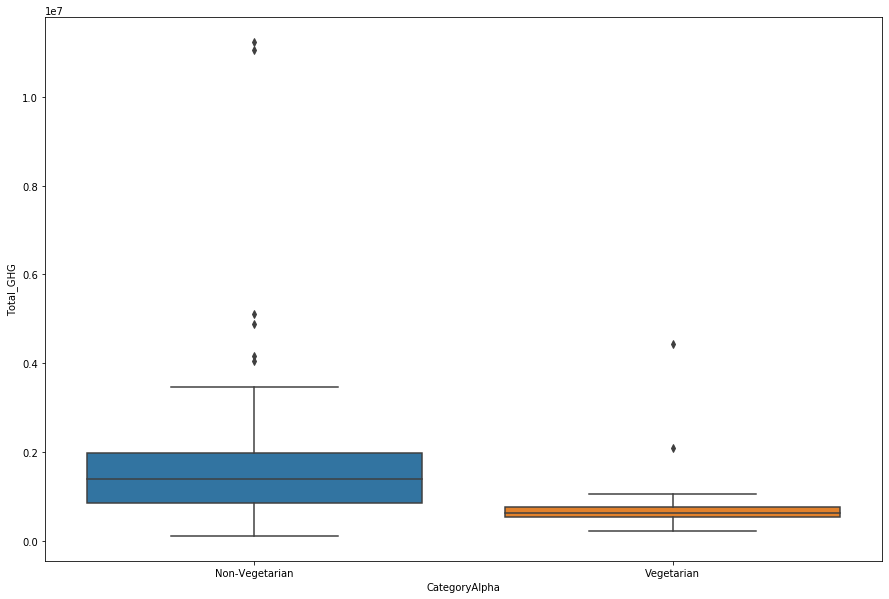

In [123]:
plt.figure(figsize=(15,10))
sns.boxplot(y='Total_GHG', x='CategoryAlpha', data=mergeddf)

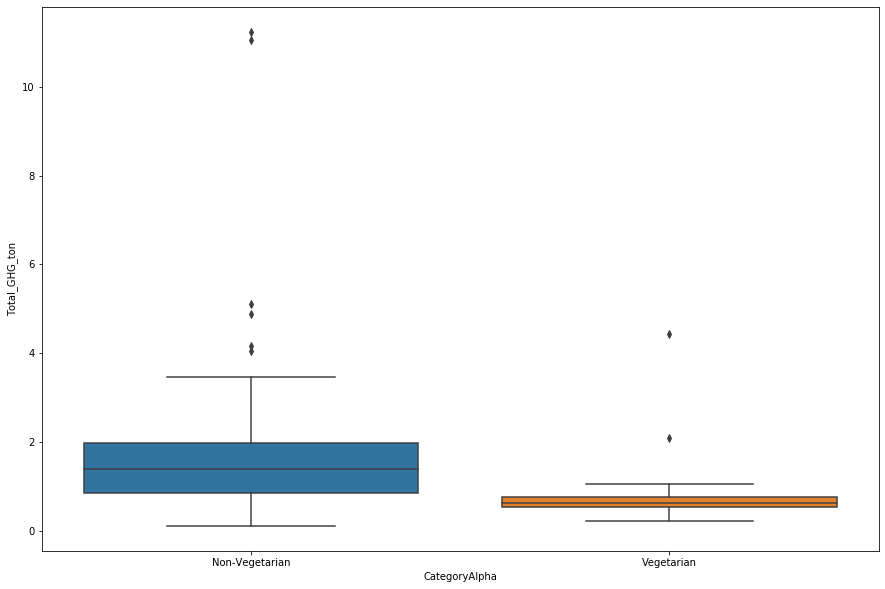

In [124]:
plt.figure(figsize=(15,10))
sns.boxplot(y='Total_GHG_ton', x='CategoryAlpha', data=mergeddf)

## CATEGORY BETA

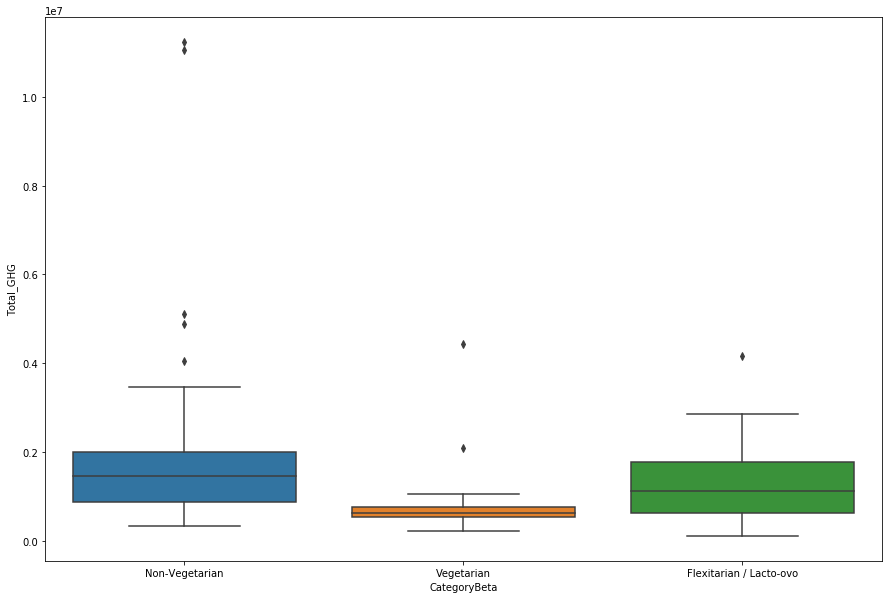

In [125]:
plt.figure(figsize=(15,10))
sns.boxplot(y='Total_GHG', x='CategoryBeta', data=mergeddf)

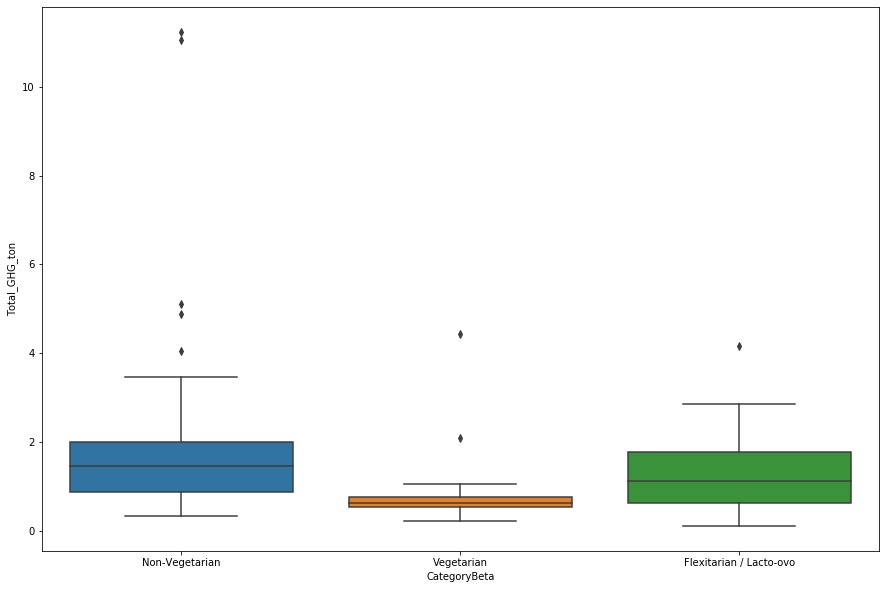

In [126]:
plt.figure(figsize=(15,10))
sns.boxplot(y='Total_GHG_ton', x='CategoryBeta', data=mergeddf)

# STATISTICAL TESTING

# CATEGORY ALPHA

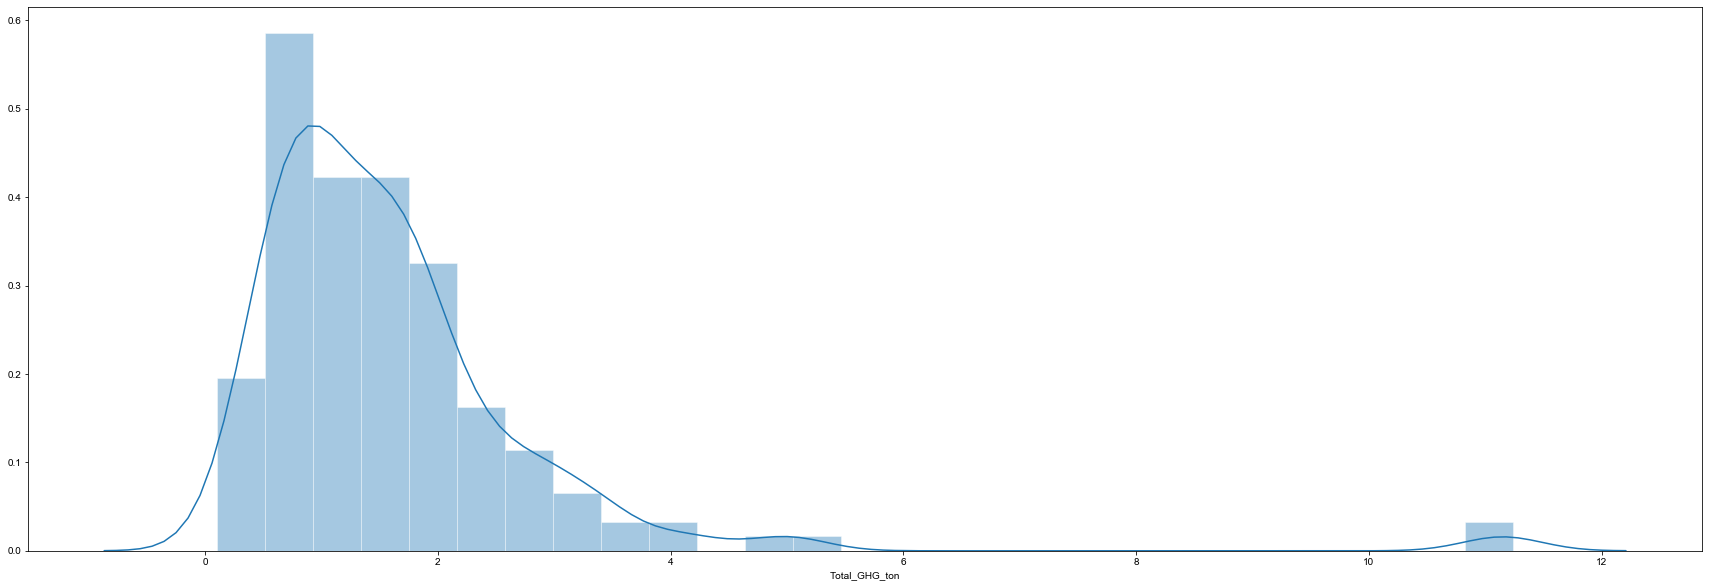

In [127]:
f, ax = plt.subplots(figsize=(30,10))

sns.set_style('darkgrid')
sns.distplot(mergeddf[mergeddf['CategoryAlpha'] == 'Non-Vegetarian']['Total_GHG_ton'])

In [128]:
f, ax = plt.subplots(figsize=(30,10))

sns.set_style('darkgrid')
sns.distplot(mergeddf[mergeddf['CategoryAlpha'] =mergeddf[mergeddf['CategoryBeta'] == 'Vegetarian']['Total_GHG_ton']= 'Vegetarian']['Total_GHG_ton'])

SyntaxError: invalid syntax (<ipython-input-128-a73b162bc67b>, line 4)

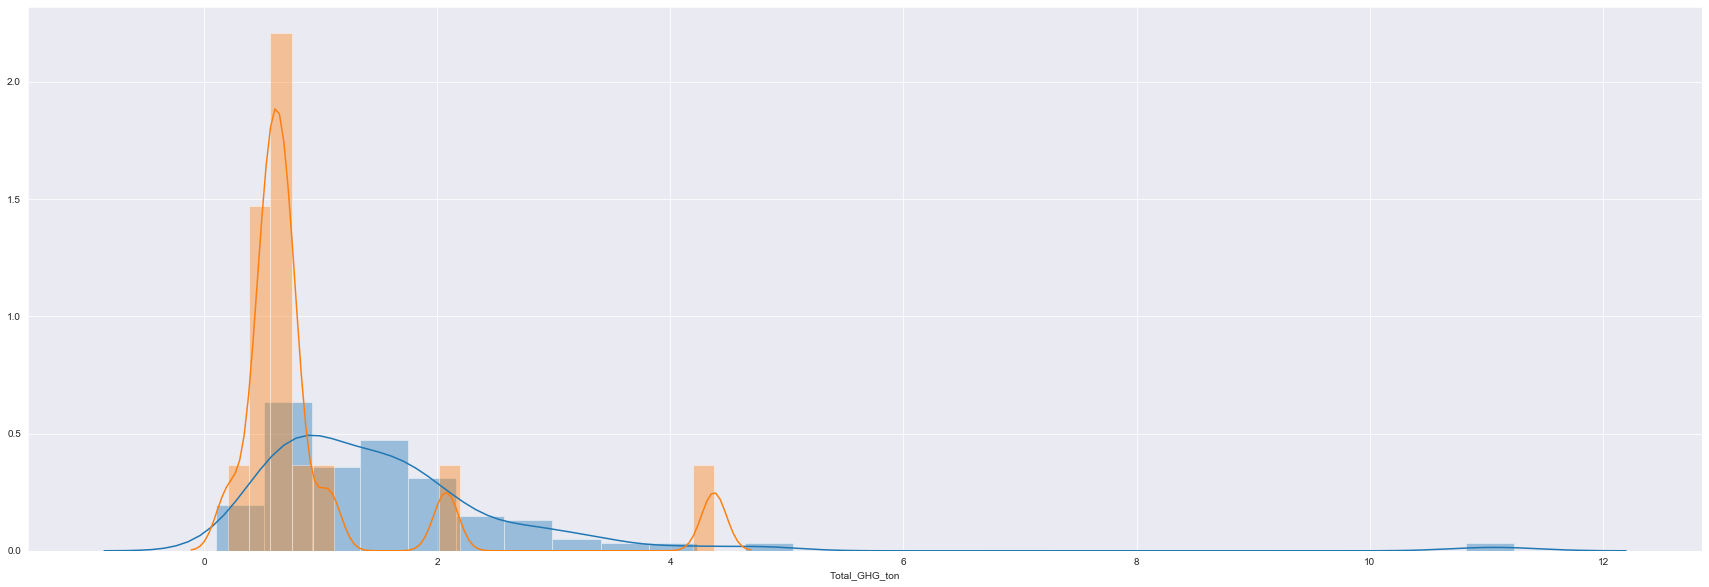

In [196]:
f, ax = plt.subplots(figsize=(30, 10))

sns.distplot(mergeddf[mergeddf['CategoryAlpha'] == 'Non-Vegetarian']['Total_GHG_ton'])
sns.distplot(mergeddf[mergeddf['CategoryAlpha'] == 'Vegetarian']['Total_GHG_ton'])
# plt.legend()

In [144]:
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

In [142]:
stat, p = kruskal(mergeddf[mergeddf['CategoryAlpha'] == 'Non-Vegetarian']['Total_GHG_ton'], mergeddf[mergeddf['CategoryAlpha'] == 'Vegetarian']['Total_GHG_ton'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation
alpha = 0.05

if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=10.591, p=0.001
Different distribution (reject H0)


In [145]:
stat, p = mannwhitneyu(mergeddf[mergeddf['CategoryAlpha'] == 'Non-Vegetarian']['Total_GHG_ton'], mergeddf[mergeddf['CategoryAlpha'] == 'Vegetarian']['Total_GHG_ton'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation
alpha = 0.05

if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=547.000, p=0.001
Different distribution (reject H0)


# CATEGORY BETA

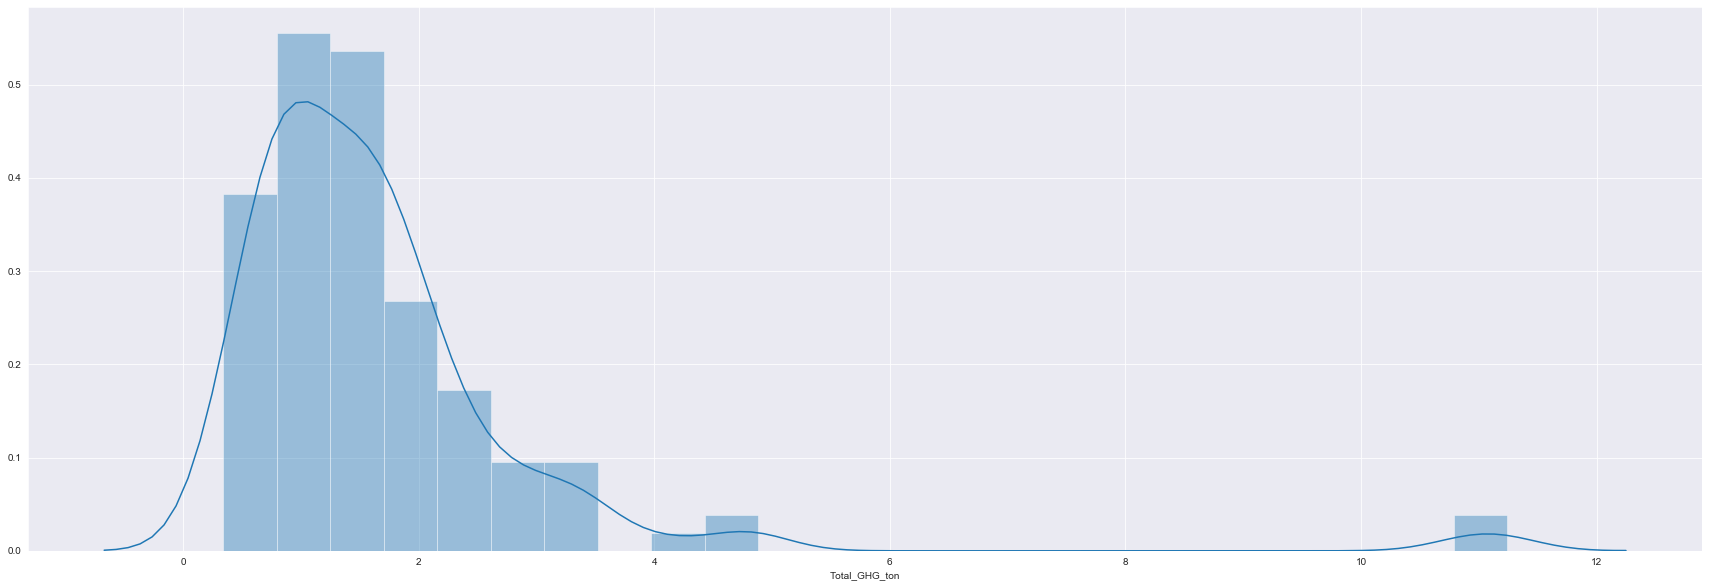

In [200]:
f, ax = plt.subplots(figsize=(30,10))

sns.set_style('darkgrid')
sns.distplot(mergeddf[mergeddf['CategoryBeta'] == 'Non-Vegetarian']['Total_GHG_ton'])

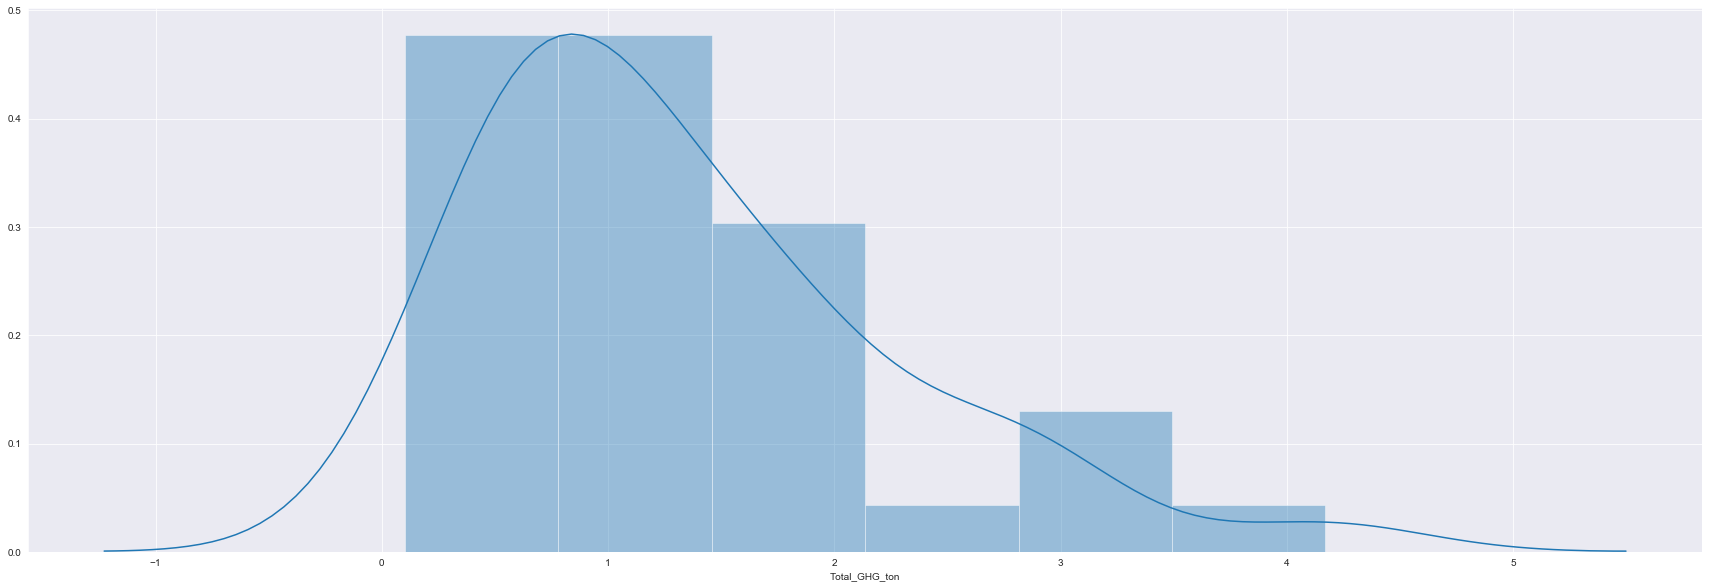

In [201]:
f, ax = plt.subplots(figsize=(30,10))

sns.set_style('darkgrid')
sns.distplot(mergeddf[mergeddf['CategoryBeta'] == 'Flexitarian / Lacto-ovo']['Total_GHG_ton'])

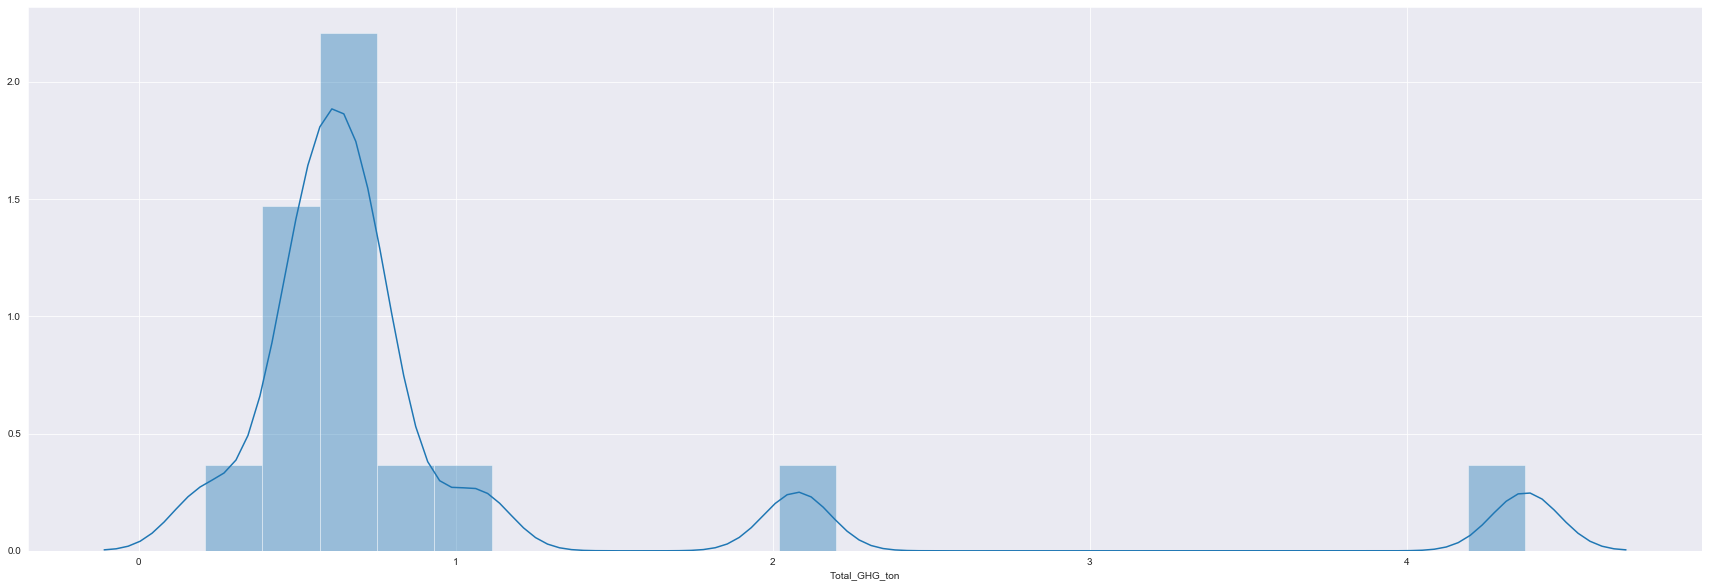

In [202]:
f, ax = plt.subplots(figsize=(30,10))

sns.set_style('darkgrid')
sns.distplot(mergeddf[mergeddf['CategoryBeta'] == 'Vegetarian']['Total_GHG_ton'])

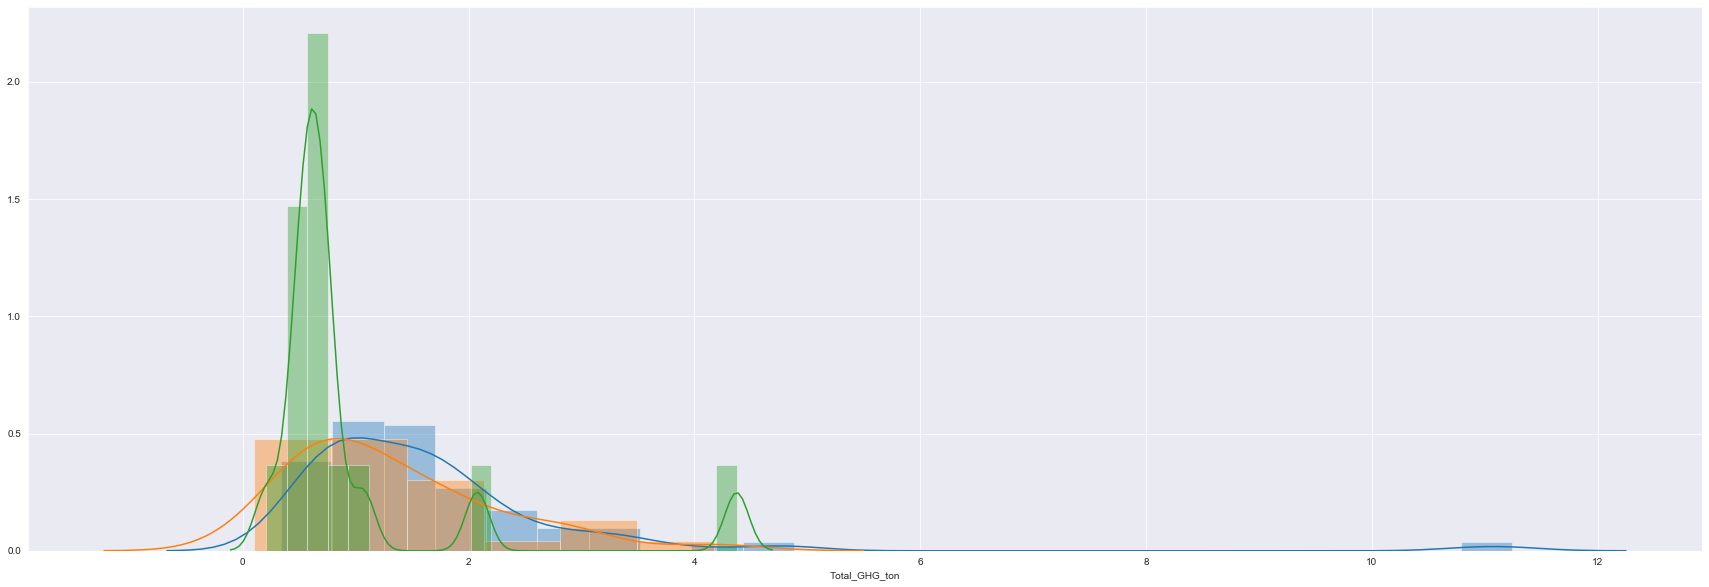

In [203]:
f, ax = plt.subplots(figsize=(30, 10))

sns.distplot(mergeddf[mergeddf['CategoryBeta'] == 'Non-Vegetarian']['Total_GHG_ton'])
sns.distplot(mergeddf[mergeddf['CategoryBeta'] == 'Flexitarian / Lacto-ovo']['Total_GHG_ton'])
sns.distplot(mergeddf[mergeddf['CategoryBeta'] == 'Vegetarian']['Total_GHG_ton'])
# plt.legend()

In [151]:
stat, p = kruskal(mergeddf[mergeddf['CategoryBeta'] == 'Non-Vegetarian']['Total_GHG_ton'], mergeddf[mergeddf['CategoryBeta'] == 'Flexitarian / Lacto-ovo']['Total_GHG_ton'], mergeddf[mergeddf['CategoryBeta'] == 'Vegetarian']['Total_GHG_ton'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation
alpha = 0.05

if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=13.311, p=0.001
Different distribution (reject H0)


# REMOVE OUTLIERS

# CATEGORY ALPHA

In [220]:
Q1_a = mergeddf[mergeddf['CategoryAlpha'] == 'Non-Vegetarian']['Total_GHG_ton'].quantile(0.25)
Q3_a = mergeddf[mergeddf['CategoryAlpha'] == 'Non-Vegetarian']['Total_GHG_ton'].quantile(0.75)
IQR_a = Q3_a - Q1_a
print(IQR_a) 

1.1054840000000001


In [208]:
Q1_b = mergeddf[mergeddf['CategoryAlpha'] == 'Vegetarian']['Total_GHG_ton'].quantile(0.25)
Q3_b = mergeddf[mergeddf['CategoryAlpha'] == 'Vegetarian']['Total_GHG_ton'].quantile(0.75)
IQR_b = Q3_b - Q1_b
print(IQR_b) 

0.231317


In [225]:
dfA = mergeddf[(mergeddf['CategoryAlpha'] == 'Non-Vegetarian') & (mergeddf['Total_GHG_ton'] <= (Q3_a + 1.5 * IQR_a)) & (mergeddf['Total_GHG_ton'] >= (Q1_a - 1.5 * IQR_a))]
dfA

,DATE,SEX,EMAIL,AGE,DOMICILE,SELF-IDENTIFY,TelurAyam_Freq,TelurAyam_Period,TelurBebek_Freq,TelurBebek_Period,...,GHG_Chicken,GHG_Beef,GHG_Lamb,GHG_Pork,GHG_Seafood,GHG_Veggie,GHG_Animilk,GHG_Veggiemilk,Total_GHG,Total_GHG_ton
0,2020/12/09 05:59:34,Perempuan / Female,elladebora13@gmail.com,22.0,Bali,Normal,5,Per Minggu / Per week,0,Per Tahun / Per year,...,27210,81134,17544,23668,43827,559602,18144,2808,832887,0.832887
4,2020/12/09 00:15:25,Laki-laki / Male,0,60.0,Bali,Pescatarian,0,0,0,0,...,0,0,0,0,39624,267280,123552,40560,471016,0.471016
5,2020/12/09 00:14:04,Perempuan / Female,0,27.0,Bali,Lacto-ovo,9,Per Minggu / Per week,0,0,...,0,0,0,0,0,295360,76752,56784,534196,0.534196
6,2020/12/09 00:12:44,Laki-laki / Male,0,22.0,Bali,Flexitarian,1,Per Minggu / Per week,0,0,...,0,0,0,0,4572,434512,131664,32448,614896,0.614896
9,2020/12/08 21:40:01,Perempuan / Female,zamniawahyuli@gmail.com,29.0,Lainnya / Others,Flexitarian,4,Per Minggu / Per week,0,0,...,50079,370781,93644,0,343305,786416,41952,25740,1761417,1.761417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2020/12/02 22:28:05,Perempuan / Female,chirinajap@gmail.com,26.0,DKI Jakarta,Meat Eater,3,Per Minggu / Per week,1,Per Bulan / Per month,...,103240,296391,0,27325,116211,212652,20736,4212,823709,0.823709
161,2020/12/02 22:14:16,Laki-laki / Male,anangwahyuwinoto@gmail.com,37.0,Lainnya / Others,Normal,4,Per Minggu / Per week,1,Per Bulan / Per month,...,115091,286833,34488,0,145044,281926,1560,0,918234,0.918234
162,2020/12/02 22:11:38,Laki-laki / Male,ahmadmuhajir.ssos@gmail.com,39.0,Bali,Normal,3,Per Minggu / Per week,1,Per Tahun / Per year,...,191052,474990,216176,0,295230,65696,56940,0,1370825,1.370825
163,2020/12/02 22:04:23,Laki-laki / Male,jayanugraha87@gmail.com,25.0,Bali,Normal,2,Per Minggu / Per week,1,Per Bulan / Per month,...,307587,81145,88815,269845,41724,397242,56940,0,1273190,1.273190


In [226]:
dfB = mergeddf[(mergeddf['CategoryAlpha'] == 'Vegetarian') & (mergeddf['Total_GHG_ton'] <= (Q3_b + 1.5 * IQR_b)) & (mergeddf['Total_GHG_ton'] >= (Q1_b - 1.5 * IQR_b))]
dfB

,DATE,SEX,EMAIL,AGE,DOMICILE,SELF-IDENTIFY,TelurAyam_Freq,TelurAyam_Period,TelurBebek_Freq,TelurBebek_Period,...,GHG_Chicken,GHG_Beef,GHG_Lamb,GHG_Pork,GHG_Seafood,GHG_Veggie,GHG_Animilk,GHG_Veggiemilk,Total_GHG,Total_GHG_ton
1,2020/12/09 01:12:28,Perempuan / Female,0,46.0,Bali,Vegan,0,0,0,0,...,0,0,0,0,0,621552,0,56940,678492,0.678492
2,2020/12/09 00:17:35,Perempuan / Female,0,36.0,Bali,Vegan,0,0,0,0,...,0,0,0,0,0,621552,0,113880,735432,0.735432
3,2020/12/09 00:16:27,Perempuan / Female,0,37.0,Bali,Vegan,0,0,0,0,...,0,0,0,0,0,481104,0,113880,594984,0.594984
7,2020/12/09 00:10:38,Laki-laki / Male,0,42.0,Bali,Vegetarian,0,0,0,0,...,0,0,0,0,4572,481104,0,73008,558684,0.558684
8,2020/12/09 00:08:42,Perempuan / Female,0,33.0,Bali,Vegan,0,Per Tahun / Per year,0,Per Tahun / Per year,...,0,0,0,0,0,135432,0,73008,208440,0.208440
23,2020/12/07 22:36:08,Laki-laki / Male,himawan.ichwana@yahoo.com,24.0,DKI Jakarta,Vegetarian,1,Per Minggu / Per week,0,0,...,0,0,0,0,0,645004,70668,73164,800536,0.800536
28,2020/12/07 21:56:41,Perempuan / Female,ikajulianna@gmail.com,27.0,Lainnya / Others,Vegetarian,4,Per Bulan / Per month,0,0,...,0,53364,67776,0,41148,204012,31680,28080,436860,0.436860
31,2020/12/07 20:52:23,Laki-laki / Male,hartawan.edward.n.r@gmail.com,43.0,Bali,Vegetarian,0,0,0,0,...,0,0,0,0,0,452556,27456,32448,512460,0.512460
46,2020/12/07 09:34:54,Perempuan / Female,debzz.holms@gmail.com,32.0,Lainnya / Others,Vegetarian,2,Per Hari / Per day,0,0,...,0,0,0,0,0,293460,56940,0,514650,0.514650
72,2020/12/07 01:43:30,Perempuan / Female,gracesimrani@gmail.com,36.0,Bali,Vegan,0,0,0,0,...,0,0,0,0,0,993381,63276,11856,1068513,1.068513


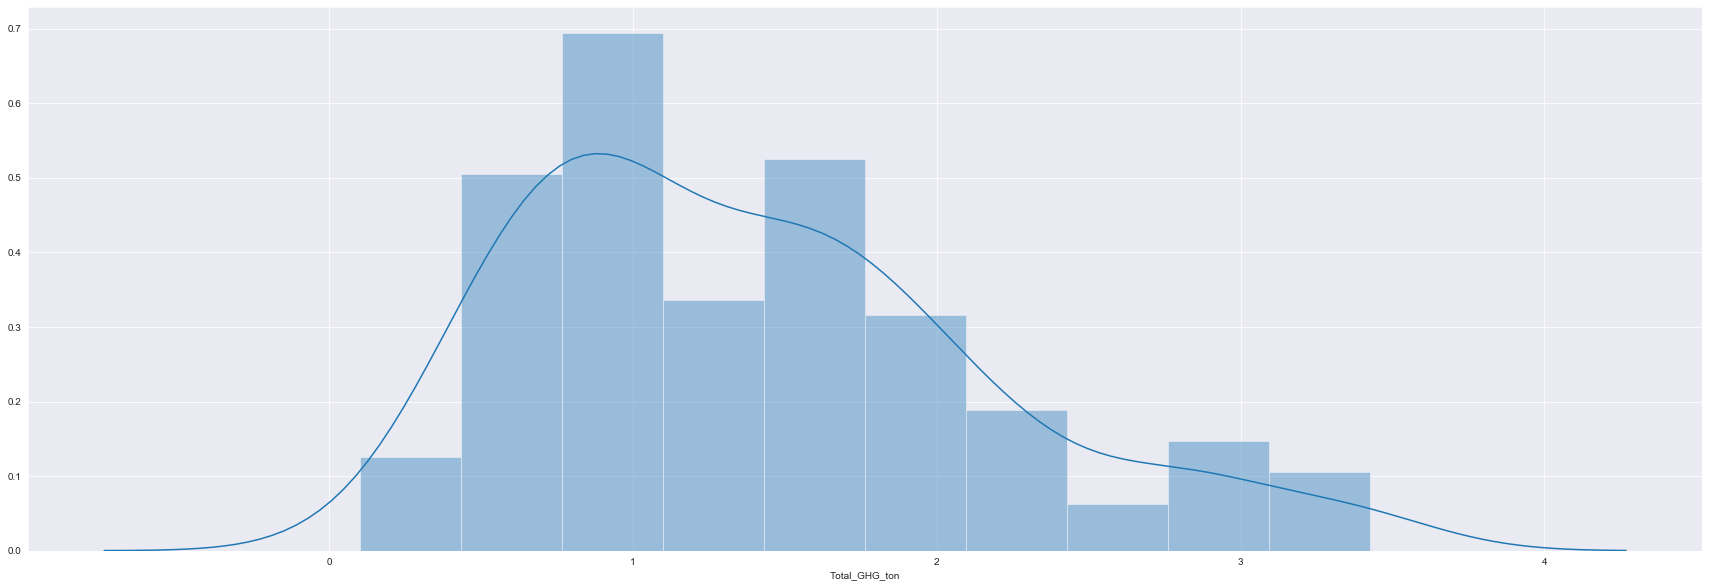

In [227]:
f, ax = plt.subplots(figsize=(30,10))

sns.set_style('darkgrid')
sns.distplot(dfA['Total_GHG_ton'])

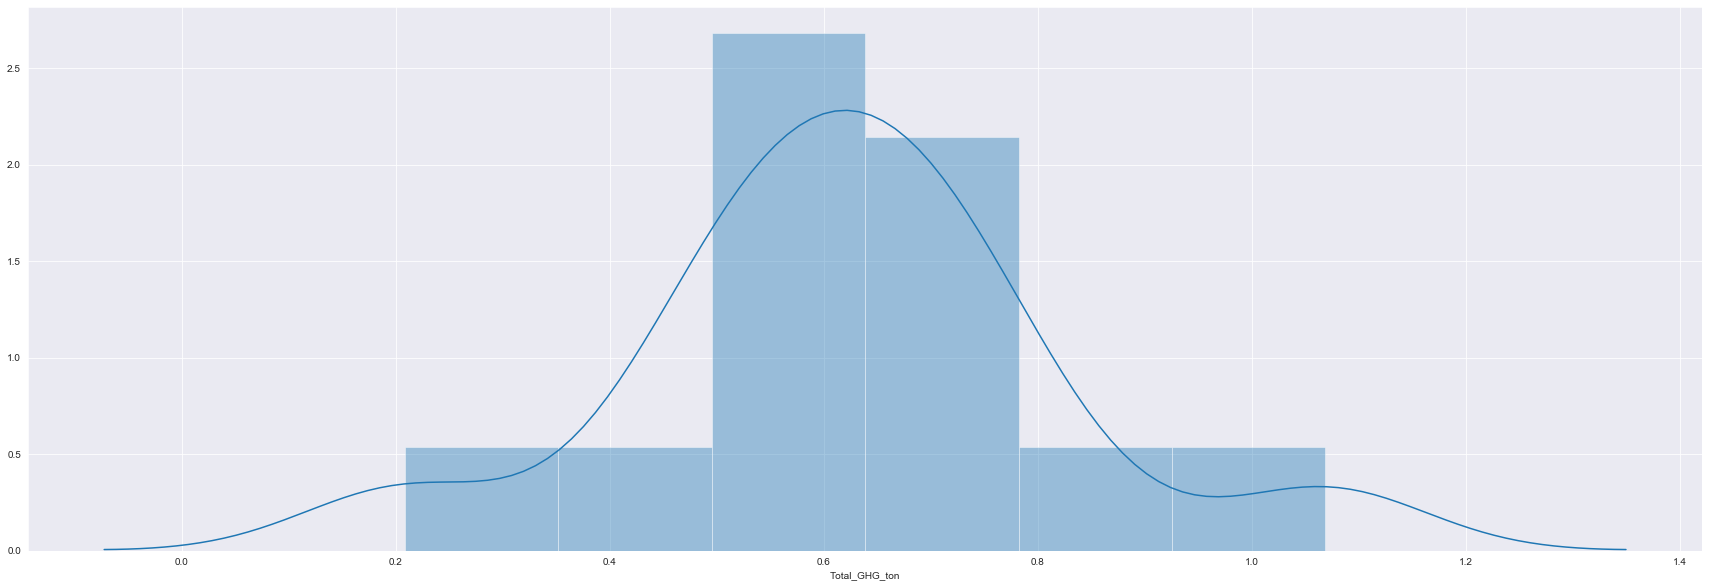

In [228]:
f, ax = plt.subplots(figsize=(30,10))

sns.set_style('darkgrid')
sns.distplot(dfB['Total_GHG_ton'])

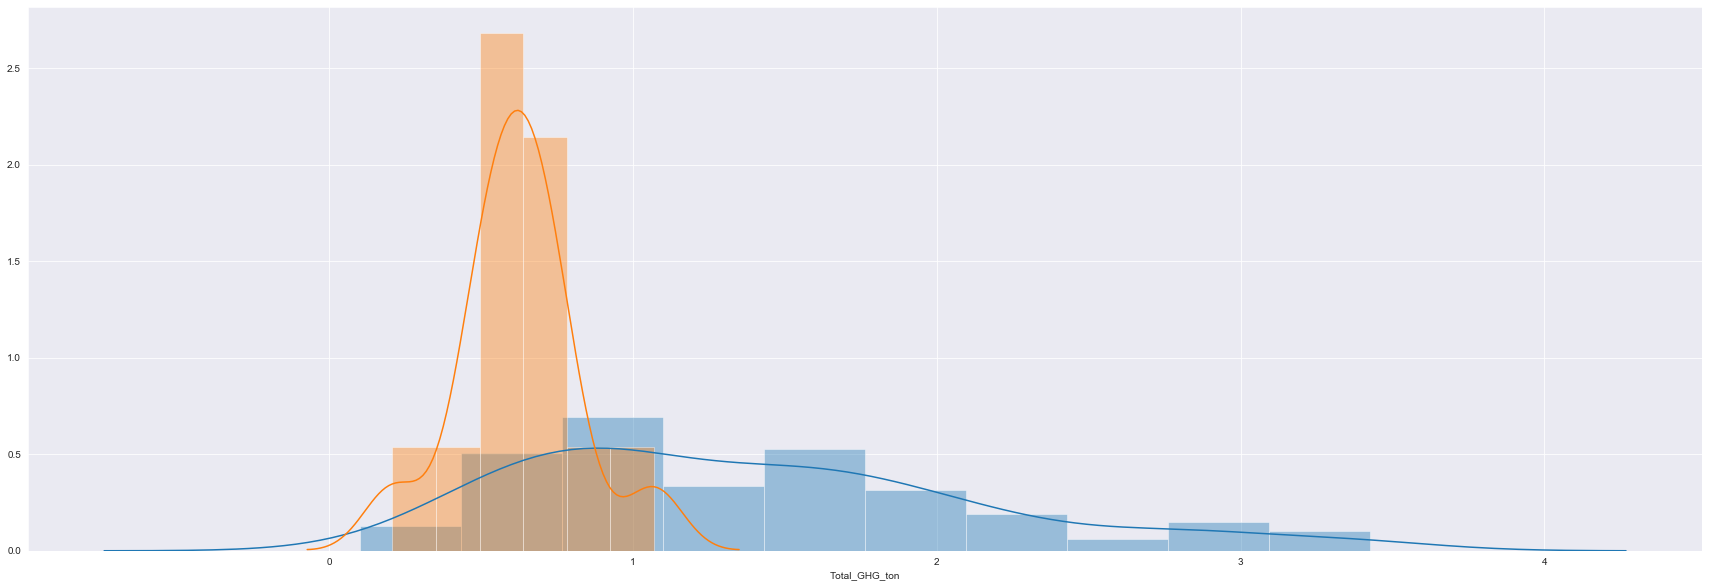

In [229]:
f, ax = plt.subplots(figsize=(30, 10))

sns.distplot(dfA['Total_GHG_ton'])
sns.distplot(dfB['Total_GHG_ton'])
# plt.legend()

In [230]:
from scipy.stats import shapiro
from scipy.stats import anderson

In [231]:
# normality test
stat, p = shapiro(dfA['Total_GHG_ton'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.941, p=0.000
Sample does not look Gaussian (reject H0)


In [232]:
# normality test
stat, p = shapiro(dfB['Total_GHG_ton'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.959, p=0.741
Sample looks Gaussian (fail to reject H0)


In [233]:
stat, p = kruskal(dfA['Total_GHG_ton'], dfB['Total_GHG_ton'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation
alpha = 0.05

if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=17.185, p=0.000
Different distribution (reject H0)


In [234]:
stat, p = mannwhitneyu(dfA['Total_GHG_ton'], dfB['Total_GHG_ton'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation
alpha = 0.05

if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=283.000, p=0.000
Different distribution (reject H0)


# CATEGORY BETA

In [235]:
Q1_c = mergeddf[mergeddf['CategoryBeta'] == 'Non-Vegetarian']['Total_GHG_ton'].quantile(0.25)
Q3_c = mergeddf[mergeddf['CategoryBeta'] == 'Non-Vegetarian']['Total_GHG_ton'].quantile(0.75)
IQR_c = Q3_c - Q1_c
print(IQR_c) 

1.108071


In [236]:
Q1_d = mergeddf[mergeddf['CategoryBeta'] == 'Flexitarian / Lacto-ovo']['Total_GHG_ton'].quantile(0.25)
Q3_d = mergeddf[mergeddf['CategoryBeta'] == 'Flexitarian / Lacto-ovo']['Total_GHG_ton'].quantile(0.75)
IQR_d = Q3_d - Q1_d
print(IQR_d) 

1.1421232499999998


In [237]:
dfC = mergeddf[(mergeddf['CategoryBeta'] == 'Non-Vegetarian') & (mergeddf['Total_GHG_ton'] <= (Q3_c + 1.5 * IQR_c)) & (mergeddf['Total_GHG_ton'] >= (Q1_c - 1.5 * IQR_c))]
dfC

,DATE,SEX,EMAIL,AGE,DOMICILE,SELF-IDENTIFY,TelurAyam_Freq,TelurAyam_Period,TelurBebek_Freq,TelurBebek_Period,...,GHG_Chicken,GHG_Beef,GHG_Lamb,GHG_Pork,GHG_Seafood,GHG_Veggie,GHG_Animilk,GHG_Veggiemilk,Total_GHG,Total_GHG_ton
0,2020/12/09 05:59:34,Perempuan / Female,elladebora13@gmail.com,22.0,Bali,Normal,5,Per Minggu / Per week,0,Per Tahun / Per year,...,27210,81134,17544,23668,43827,559602,18144,2808,832887,0.832887
4,2020/12/09 00:15:25,Laki-laki / Male,0,60.0,Bali,Pescatarian,0,0,0,0,...,0,0,0,0,39624,267280,123552,40560,471016,0.471016
12,2020/12/08 11:44:18,Perempuan / Female,lifyaz@gmail.com,22.0,Lainnya / Others,Meat Eater,1,Per Bulan / Per month,0,Per Bulan / Per month,...,313656,628236,67776,0,185220,80040,1872,0,1279500,1.279500
13,2020/12/08 11:09:53,Perempuan / Female,angel_rovest@yahoo.com,28.0,DKI Jakarta,Normal,1,Per Minggu / Per week,2,Per Bulan / Per month,...,176218,1037578,73195,40695,541326,205229,57408,780,2158463,2.158463
16,2020/12/08 02:59:11,Laki-laki / Male,bolenk.inmail@gmail.com,21.0,Lainnya / Others,Normal,3,Per Minggu / Per week,1,Per Bulan / Per month,...,108432,1089088,0,0,289260,123288,30672,9360,1697092,1.697092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2020/12/02 22:28:05,Perempuan / Female,chirinajap@gmail.com,26.0,DKI Jakarta,Meat Eater,3,Per Minggu / Per week,1,Per Bulan / Per month,...,103240,296391,0,27325,116211,212652,20736,4212,823709,0.823709
161,2020/12/02 22:14:16,Laki-laki / Male,anangwahyuwinoto@gmail.com,37.0,Lainnya / Others,Normal,4,Per Minggu / Per week,1,Per Bulan / Per month,...,115091,286833,34488,0,145044,281926,1560,0,918234,0.918234
162,2020/12/02 22:11:38,Laki-laki / Male,ahmadmuhajir.ssos@gmail.com,39.0,Bali,Normal,3,Per Minggu / Per week,1,Per Tahun / Per year,...,191052,474990,216176,0,295230,65696,56940,0,1370825,1.370825
163,2020/12/02 22:04:23,Laki-laki / Male,jayanugraha87@gmail.com,25.0,Bali,Normal,2,Per Minggu / Per week,1,Per Bulan / Per month,...,307587,81145,88815,269845,41724,397242,56940,0,1273190,1.273190


In [239]:
dfD = mergeddf[(mergeddf['CategoryBeta'] == 'Flexitarian / Lacto-ovo') & (mergeddf['Total_GHG_ton'] <= (Q3_d + 1.5 * IQR_d)) & (mergeddf['Total_GHG_ton'] >= (Q1_d - 1.5 * IQR_d))]
dfD.head()

,DATE,SEX,EMAIL,AGE,DOMICILE,SELF-IDENTIFY,TelurAyam_Freq,TelurAyam_Period,TelurBebek_Freq,TelurBebek_Period,...,GHG_Chicken,GHG_Beef,GHG_Lamb,GHG_Pork,GHG_Seafood,GHG_Veggie,GHG_Animilk,GHG_Veggiemilk,Total_GHG,Total_GHG_ton
5,2020/12/09 00:14:04,Perempuan / Female,0,27.0,Bali,Lacto-ovo,9,Per Minggu / Per week,0,0,...,0,0,0,0,0,295360,76752,56784,534196,0.534196
6,2020/12/09 00:12:44,Laki-laki / Male,0,22.0,Bali,Flexitarian,1,Per Minggu / Per week,0,0,...,0,0,0,0,4572,434512,131664,32448,614896,0.614896
9,2020/12/08 21:40:01,Perempuan / Female,zamniawahyuli@gmail.com,29.0,Lainnya / Others,Flexitarian,4,Per Minggu / Per week,0,0,...,50079,370781,93644,0,343305,786416,41952,25740,1761417,1.761417
10,2020/12/08 18:59:30,Perempuan / Female,getaspudakwangi@gmail.com,22.0,Bali,Flexitarian,2,Per Minggu / Per week,0,Per Tahun / Per year,...,142792,53364,0,117444,928410,610604,65520,64896,2006430,2.006430
11,2020/12/08 12:31:51,Perempuan / Female,cynthiadrp@gmail.com,26.0,DKI Jakarta,Flexitarian,4,Per Minggu / Per week,2,Per Tahun / Per year,...,192742,50940,0,0,96399,153610,13248,13728,571249,0.571249


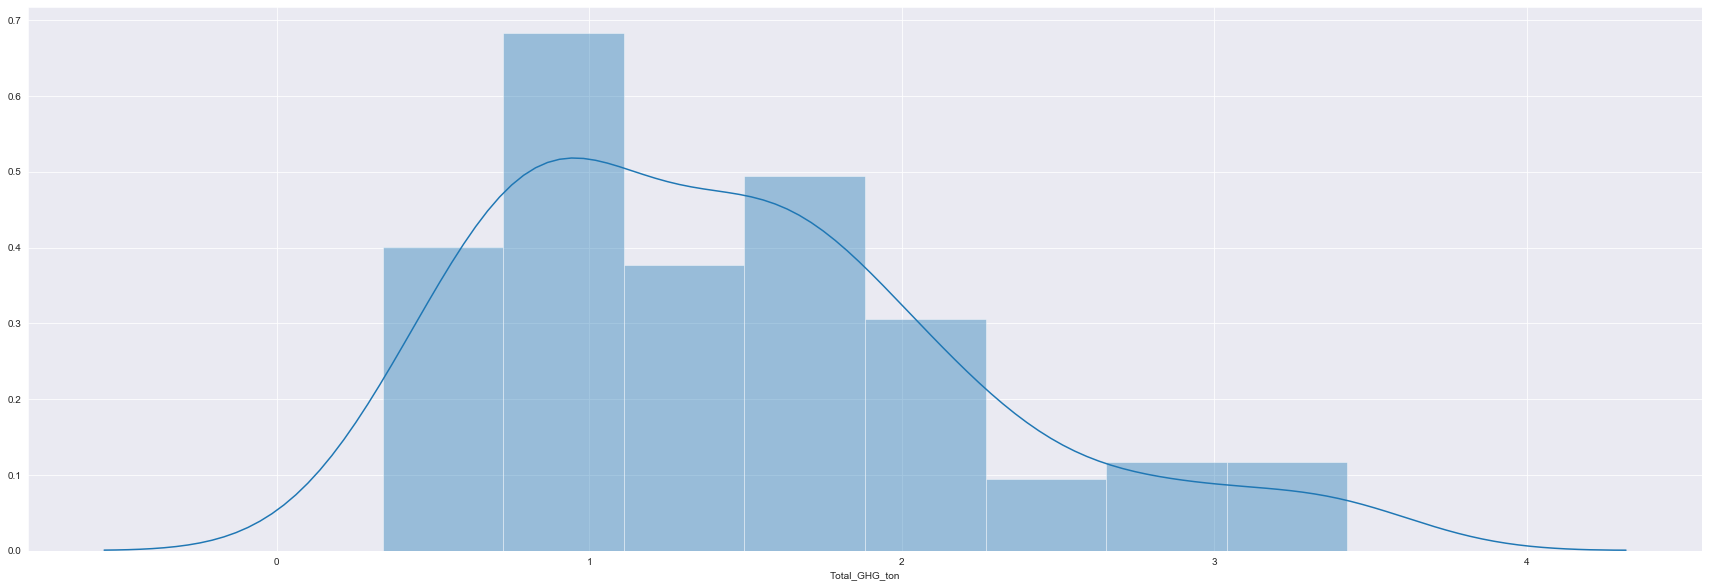

In [240]:
f, ax = plt.subplots(figsize=(30,10))

sns.set_style('darkgrid')
sns.distplot(dfC['Total_GHG_ton'])

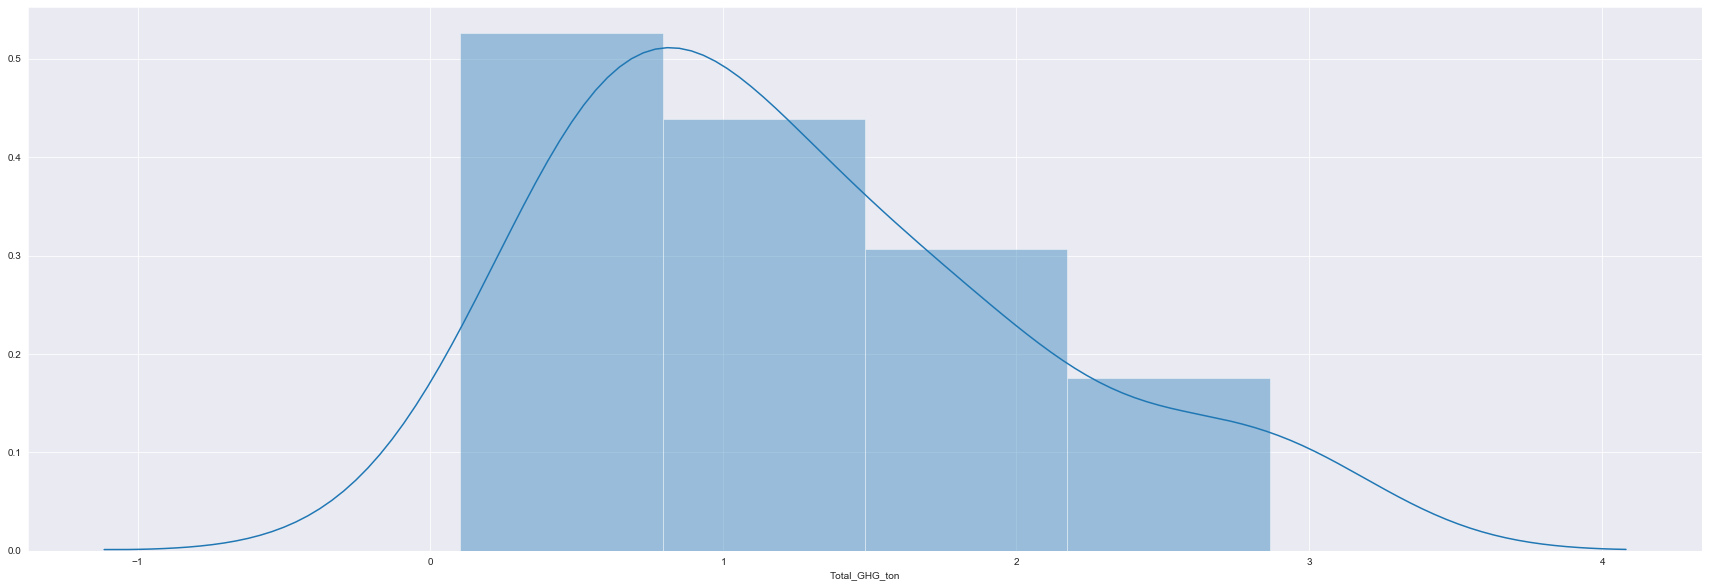

In [241]:
f, ax = plt.subplots(figsize=(30,10))

sns.set_style('darkgrid')
sns.distplot(dfD['Total_GHG_ton'])

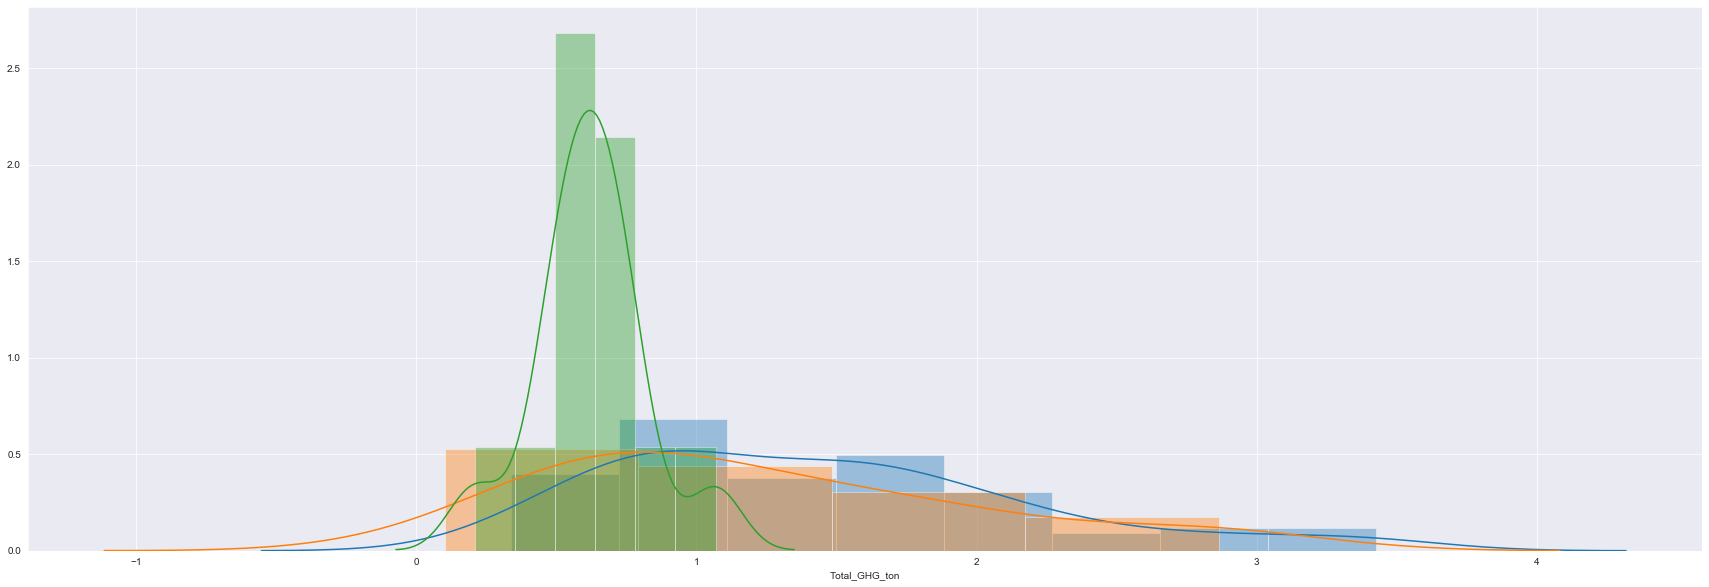

In [242]:
f, ax = plt.subplots(figsize=(30, 10))

sns.distplot(dfC['Total_GHG_ton'])
sns.distplot(dfD['Total_GHG_ton'])
sns.distplot(dfB['Total_GHG_ton'])
# plt.legend()

In [243]:
# normality test
stat, p = shapiro(dfC['Total_GHG_ton'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.937, p=0.000
Sample does not look Gaussian (reject H0)


In [244]:
# normality test
stat, p = shapiro(dfD['Total_GHG_ton'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.914, p=0.013
Sample does not look Gaussian (reject H0)


In [245]:
stat, p = kruskal(dfC['Total_GHG_ton'], dfD['Total_GHG_ton'], dfB['Total_GHG_ton'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation
alpha = 0.05

if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=19.808, p=0.000
Different distribution (reject H0)


# IMPACT to CLIMATE CHANGE

In [246]:
dfA['Total_GHG_ton'].describe()

count    143.000000
mean       1.397994
std        0.754343
min        0.101616
25%        0.828298
50%        1.279500
75%        1.793245
max        3.426546
Name: Total_GHG_ton, dtype: float64

In [247]:
dfB['Total_GHG_ton'].describe()

count    13.000000
mean      0.622181
std       0.202045
min       0.208440
25%       0.514650
50%       0.619880
75%       0.713777
max       1.068513
Name: Total_GHG_ton, dtype: float64

In [249]:
dfA['Total_GHG_ton'].mean() / dfB['Total_GHG_ton'].mean()

2.246925781217687